# 2020 Traffic Surge and Evolution of SpeedTest Internet Experience Indicators in Colombia

- Author: Juan David Rodriguez
- Date: December 2020
- Linkedin: www.linkedin.com/in/juandavidrodriguez
- License of this work: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Introduction
I recently completed the **Imperial Business Analytics Programme** by the **Imperial College Business School**. I decided to make my final project **Internet user experience and data networks**, a topic that has gained increased relevance due to lockdowns related to the pandemic. COVID-19 has created unprecedent challenges for data networks: Just as in many other countries, the Colombian government imposed a strict lockdown as a response to COVID-19 emergency. In a very short time, and without preparation, Colombian society had to adapt so that a significant part of the economy could function without leaving home. This adaptation was required an accelerated adoption of digital tools:

Many companies have been forced to adapt so that their employees can work from home. Schools have been forced to close and offer remote learning There was an unprecedent surge in streaming and internet-based entertainment services Adoption of digital and remote tools have resulted in an unprecedent increase in data traffic that was not foreseen. Networks became more critical than ever so that society could function at least to some degree.

Network operators have been forced to cope with such traffic spike without proper preparation. Capacity expansion processes normally had yearly cycles using previous 12-month window traffic as an input to predict near-term needs. Many people believe that operators enjoyed a boost in revenue and profits because of the increase in traffic, as experienced by Internet based companies such as Amazon or Zoom. However, operators’ public results have shown the opposite: Their revenue and cash-in has been reduced because of an increase in lack of payment, overdues, and cancellations. Financial deterioration further constrained operators’ capacities to expand their networks to match traffic increase.

My project performed an analysis in Colombia (my home country) to understand if such traffic increase has resulted in deterioration of user experience and identify municipalities that have suffered the most so that public policy can be adapted to support investments in network infrastructure for such municipalities.


# Objective
My project performed an assessment on how unexpected **traffic surge** due to COVID-19 has impacted internet experience KPIs (average downlink speed, average uplink speed, latency) in all municipalities in Colombia compared to pre-COVID-19 scenario. The assessment analyzed the time series of aggregated traffic in Colombia to confirm the historical raise of traffic, assessed the impact of such surge possibly because of network saturation, classified municipalities based on how severe the impact on user experience was, and forecasted possible traffic trends after the economy re-opened. Results could be used by public policy makers to better define where incentives for network infrastructure investments should be prioritized, and which technologies should be incentivized.

# Tools

The Imperial Analytics Programme provides an overview of some of the statistical and machine learning tools that can be used to solve problems and take decisions. Most of the programming of the course is done in Phyton using Anaconda. I tried to run the necessary transformations to the dataset using Anaconda and my local machine. After several memory crashes I realized that I would require a cloud platform. I had previously experienced with **IBM Watson Cloud** when I pursued my IBM Data Science Certification: IBM Cloud is a practical, intuitive platform that is easy to use even for beginners. The free account version allows to setup a free account with an environment that allows up to 50 monthly capacity units per hour, a 4vCPU + 16GB RAM environment utilizes 2 capacity units per hour. However, I estimated that I would require something higher than 16GB of RAM to run my code, therefore I decided to experience with a different platform that I have been using in my current job: I decided to try **Google Cloud Platform**. GCP allows any user to setup and account and start a 90-day trial and a 300 USD trial. It is very simple to setup a standard instance with 4vCPU and 32GB of RAM, which was sufficient computing power for my project.

Additionally, I had the opportunity to experience with various Phyton libraries including:
**Geopandas** library, which is a powerful tool to perform joins and transformations on geo-referenced data, **Mapclassify** library to plot georeferenced data in chronopleth maps, **Seaborn and Matplotlib** data visualization tools and several of the classifier and clustering tools from **Sklearn** library.


# Sources of Data
I was amazed by the vast amount of public data that was available for my project. I was surprised to see that **Ookla speedtest** has made available to the public the dataset containing aggregated and anonymized geo-referenced data on downlink speed, uplink speed and latency. I was also happy to see that Colombian's government initiative to consolidate a repository of public data **"datos.gov.co"** has advanced and now includes many datasets from the Ministry of Telecommunications. I identified that these sources of data, which are completely public and available to anyone, would be sufficient to perform my analysis as originally envisioned. I specifically included the following sources of data:
- Ookla speedtest open source data (http://ookla-open-data.s3.amazonaws.com/). Including 6 datasets in SHP format:
    - Fixed data for Q1, Q2 and Q3 2020
    - Mobile data for Q1, Q2 and Q3 2020
- Colombia's municipality geographic limits from Colombia's National Statistics Administrative Department (DANE - https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/)
- Colombia's Minitic telecommunications dataset (https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/)
    - Colombia Daily Aggregated Internet Traffic per operator
    - Colombia Fixed Internet Accesses by municipality and type of technology
    - Fixed internet access penetration by municipality


# Conclusions
As supported by the analysis below, I indeed found reached some interesting conclusions:
- **Traffic Surge**: As expected, Colombia indeed experienced a data surge due to the pandemic and the following lockdown, traffic jumped **from a daily average of 52 to 57 Petabytes** in January and February, **to a daily average of 72 to 90 Petabytes** in March to December which represents a **60% increase in aggregated traffic**. Another interesting remark from the traffic time series is the trend after the economy reopened:  Charts show that the traffic has not decreased once the lockdown was terminated. On the contrary, the traffic seems to continue growing. This might be explained by the fact that schools are still closed, and many companies continue to work remotely. However, this might also imply that society has started a digital transformation that might stay in place even after the pandemic emergency is over. In that case network infrastructure will have to adapt for this new reality. 
- **Countrywide Internet User Experience KPIs:** I was surprised to see that on aggregated level, the impact on downlink speed, uplink speed and latency was small or none. Many cities even experienced an improvement in their KPIs. This might be explained by the resiliency to traffic increase from broadband technologies (such as fiber, cable and 4G LTE), and network expansions performed by operators to cope with the traffic increase
- **Unequal Impact in Internet User Experience KPIs:** Even though the results show small or no deterioration of KPIs on a countrywide level, the distribution was quite unequal. In general, **big cities** with the highest **GDP per capita**, **population density**, **largest fixed penetration** and **largest 4G LTE penetration** had no impact. While small municipalities with low broadband penetration experienced a dramatic deterioration in their KPIs.


# Coding

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gpl
import mapclassify as mpclas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import svm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

## 1. Import Datasets sources
### Ookla Speedtest Dataset

In [2]:
# Speed test fixed Q1 dataset:
st_fixed_q1 = gpd.read_file('gs://imperial_analytics_project/sources/1_speed_test_titles/fixed_q1_20/gps_fixed_tiles.shp')
print("Speed test fixed Q1 data loaded Shape:", st_fixed_q1.shape)
display(st_fixed_q1.head())
# Speed test fixed Q2 dataset:
st_fixed_q2 = gpd.read_file('gs://imperial_analytics_project/sources/1_speed_test_titles/fixed_q2_20/gps_fixed_tiles.shp')
print("Speed test fixed Q2 data loaded Shape:", st_fixed_q2.shape)
display(st_fixed_q2.head())
# Speed test fixed Q3 dataset:
st_fixed_q3 = gpd.read_file('gs://imperial_analytics_project/sources/1_speed_test_titles/fixed_q3_20/gps_fixed_tiles.shp')
print("Speed test fixed Q3 data loaded Shape:", st_fixed_q3.shape)
display(st_fixed_q3.head())

Speed test fixed Q1 data loaded Shape: (6688699, 7)


quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  3100121113233332       16599       13312          70     37       27   
1  3112231300122103       42461       13516          19    171       53   
2  0331102110022021       25765       15185          16    228      100   
3  1202020213110310       79703       15579          18    199       32   
4  1231210133132220       27032       24622          23    174       55   

                                            geometry  
0  POLYGON ((106.68823 -6.30984, 106.69373 -6.309...  
1  POLYGON ((145.04700 -37.82714, 145.05249 -37.8...  
2  POLYGON ((-9.13513 38.71123, -9.12964 38.71123...  
3  POLYGON ((1.35132 51.38550, 1.35681 51.38550, ...  
4  POLYGON ((75.84961 30.91165, 75.85510 30.91165...

Speed test fixed Q2 data loaded Shape: (6938763, 7)


quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  1321222233020202      144116      125751           3   7330     1324   
1  1230231303303002       89763       52939          42    726      137   
2  0313131210131030       62657       15479          19    271       40   
3  0213330110110321       98061       11842          19      2        1   
4  3100130032202231       15167        7287           8    674      122   

                                            geometry  
0  POLYGON ((113.55469 22.16197, 113.56018 22.161...  
1  POLYGON ((55.41504 25.27947, 55.42053 25.27947...  
2  POLYGON ((-1.79077 51.55658, -1.78528 51.55658...  
3  POLYGON ((-93.22449 45.06576, -93.21899 45.065...  
4  POLYGON ((107.59460 -6.91552, 107.60010 -6.915...

Speed test fixed Q3 data loaded Shape: (6870766, 7)


quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  1233013313200301       43426       44856           4    915      163   
1  0302231031021131       34684        1667         602      2        1   
2  0302322122312111       78753       33569          13      3        2   
3  0231121211030100      397666      290737           7     21        8   
4  2103213003001301       81641       42419           9     57       11   

                                            geometry  
0  POLYGON ((78.42590 17.45547, 78.43140 17.45547...  
1  POLYGON ((-80.42542 44.52001, -80.41992 44.520...  
2  POLYGON ((-77.04163 42.13082, -77.03613 42.130...  
3  POLYGON ((-97.27295 35.38905, -97.26746 35.389...  
4  POLYGON ((-58.63953 -34.61513, -58.63403 -34.6...

In [3]:
# Speed test mobile Q1 dataset:
st_mob_q1 = gpd.read_file('gs://imperial_analytics_project/sources/1_speed_test_titles/mobile_q1_20/gps_mobile_tiles.shp')
print("Speed test mobile Q1 data loaded Shape:", st_mob_q1.shape)
display(st_mob_q1.head())
# Speed test mobile Q2 dataset:
st_mob_q2 = gpd.read_file('gs://imperial_analytics_project/sources/1_speed_test_titles/mobile_q2_20/gps_mobile_tiles.shp')
print("Speed test mobile Q2 data loaded Shape:", st_mob_q2.shape)
display(st_mob_q2.head())
# Speed test mobile Q3 dataset:
st_mob_q3 = gpd.read_file('gs://imperial_analytics_project/sources/1_speed_test_titles/mobile_q3_20/gps_mobile_tiles.shp')
print("Speed test mobile Q3 data loaded Shape:", st_mob_q3.shape)
display(st_mob_q3.head())

Speed test mobile Q1 data loaded Shape: (3903132, 7)


quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  1231213033100333       14457        3022          30     82       44   
1  1233010212222232       10042        4567          48     69       38   
2  1231213033101212        8592        2566          40    117       63   
3  1322013333311132       23863       18425          26     31       15   
4  3100121113312313       15880        9819          27    546      269   

                                            geometry  
0  POLYGON ((77.20642 28.57970, 77.21191 28.57970...  
1  POLYGON ((73.83911 19.97851, 73.84460 19.97851...  
2  POLYGON ((77.22290 28.58935, 77.22839 28.58935...  
3  POLYGON ((101.23901 16.78876, 101.24451 16.788...  
4  POLYGON ((106.82556 -6.21155, 106.83105 -6.211...

Speed test mobile Q2 data loaded Shape: (4075861, 7)


quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  1203022122320032       28772        3165          34      8        1   
1  0313113213321131       20782       10180          54      2        2   
2  1221210331312333       22690       22416         449      6        2   
3  1200312211223323       54493        4635          21      2        2   
4  0302233220203221       90669        6576          21      1        1   

                                            geometry  
0  POLYGON ((24.09302 49.88402, 24.09851 49.88402...  
1  POLYGON ((-1.49963 52.95526, -1.49414 52.95526...  
2  POLYGON ((30.88806 29.92161, 30.89355 29.92161...  
3  POLYGON ((18.00110 59.35840, 18.00659 59.35840...  
4  POLYGON ((-81.51306 41.31908, -81.50757 41.319...

Speed test mobile Q3 data loaded Shape: (4340413, 7)


quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  1203101011003021       31204       15767          23    180       24   
1  1202301033011222       78512        7859          19      1        1   
2  1202302310211330       12586        6035          44     30        4   
3  0231321020321002       55903       22395          32     16       10   
4  1203101011223332       25298       14883          21     21       18   

                                            geometry  
0  POLYGON ((37.66663 55.74567, 37.67212 55.74567...  
1  POLYGON ((15.24902 48.19905, 15.25452 48.19905...  
2  POLYGON ((13.52417 45.92823, 13.52966 45.92823...  
3  POLYGON ((-98.21777 26.18995, -98.21228 26.189...  
4  POLYGON ((37.69409 55.58145, 37.69958 55.58145...

### Colombian DANE and MinTic Datasets

In [2]:
#Show all columns
pd.set_option('display.max_columns', None)

#Municipality SHP files
mun_shp = gpd.read_file('gs://imperial_analytics_project/sources/2_dane_shp_mun/MGN_MPIO_POLITICO.shp')
print("Municipalities geo-shape data loaded Shape:", mun_shp.shape)
display(mun_shp.head(2))

#Aggregated traffic per day per operator
agg_traf_op = pd.read_csv('gs://imperial_analytics_project/sources/3_mintic_agg_traff_day/agg_traf_apr_dec.csv')
agg_traf_base = pd.read_csv('gs://imperial_analytics_project/sources/3_mintic_agg_traff_day/agg_traf_base.csv')
print("Aggregated traffice per day per operator data loaded Shape:", agg_traf_op.shape)
display(agg_traf_op.head(2))
print("Aggregated traffice per day per operator base loaded Shape:", agg_traf_base.shape)
display(agg_traf_base.head(2))

#Fixed Access Penetration by municipality
fixed_acc_pen = pd.read_csv('gs://imperial_analytics_project/sources/4_mintic_fixed_mobile_by_mun/fixed_acc_by_mun_pen_v4.csv')
print("Fixed access penetration by municipality data loaded Shape:", fixed_acc_pen.shape)
display(fixed_acc_pen.head(2))

#Fixed Access Numer of Access Type by municipality
fixed_acc_type = pd.read_csv('gs://imperial_analytics_project/sources/4_mintic_fixed_mobile_by_mun/fixed_acc_by_mun_type_v4.csv')
print("Fixed Access Numer of Access Type by municipality data loaded Shape:", fixed_acc_type.shape)
display(fixed_acc_type.head(2))

#Mobile Access Coverage by Technology by municipality
mobile_cov_tech = pd.read_csv('gs://imperial_analytics_project/sources/4_mintic_fixed_mobile_by_mun/mobile_cov_per_tech_by_mun_v4.csv')
print("Mobile Access Coverage by Technology by municipality data loaded Shape:", mobile_cov_tech.shape)
display(mobile_cov_tech.head(2))

#DANE GDP by municipality
gdp_mun = pd.read_csv('gs://imperial_analytics_project/sources/5_dane_gdp/dane_gdp_per_mun.csv')
print("GDP by municipality data loaded Shape:", gdp_mun.shape)
display(gdp_mun.head(2))


Municipalities geo-shape data loaded Shape: (1181, 12)


DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR                         MPIO_CRSLC  \
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   
1         52        110    BUESACO                               1899   

   MPIO_NAREA MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  \
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   
1  635.960833      52110       2020     NARIÑO    0.051533   1.229231   

   ORIG_FID                                           geometry  
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...  
1         1  POLYGON ((-77.23516 1.45240, -77.23481 1.45233...

Aggregated traffice per day per operator data loaded Shape: (2717, 9)


NIT Proveedor                        Proveedor  Fecha del día de tráfico  \
0      830016046  AVANTEL S.A.S EN REORGANIZACION                30/03/2020   
1      830016046  AVANTEL S.A.S EN REORGANIZACION                31/03/2020   

  Hora Pico  Tráfico Datos  Internacional (GB)  \
0     22:00                               7737   
1     23:00                               7136   

   Tráfico Datos   NAPs - Colombia (GB)  \
0                                  69.0   
1                                  28.0   

   Tráfico Datos  Acuerdos de tránsito o peering directo (GB)  \
0                                               4481            
1                                               4313            

   Tráfico Datos  Local (GB)  Tráfico Datos  Total Día (GB)  
0                         94                         200289  
1                         14                         198947

Aggregated traffice per day per operator base loaded Shape: (1001, 4)


NIT Proveedor                        Proveedor      DATE AVG_BASE_TRAFFIC
0      830016046  AVANTEL S.A.S EN REORGANIZACION  1/1/2020          177,947
1      830016046  AVANTEL S.A.S EN REORGANIZACION  2/1/2020          177,947

Fixed access penetration by municipality data loaded Shape: (13464, 8)


AÑO  TRIMESTRE DEPARTAMENTO MUNICIPIO  No. ACCESOS FIJOS A INTERNET  \
0  2019          4        CHOCO    BOJAYA                            40   
1  2020          1       VAUPES    CARURU                            11   

   POBLACIÓN DANE  INDICE DPTO_MPIO  
0           12212  0,0033    27_099  
1            3201  0,0034       NaN

Fixed Access Numer of Access Type by municipality data loaded Shape: (578944, 11)


AÑO  TRIMESTRE                                PROVEEDOR  DEPARTAMENTO  \
0  2018          3  DOBLECLICK SOFTWARE E INGENIERIA S.A.S.         CAUCA   
1  2018          3     AZTECA COMUNICACIONES COLOMBIA S.A.S  CUNDINAMARCA   

  MUNICIPIO     SEGMENTO                     TECNOLOGIA  VELOCIDAD_BAJADA  \
0   BOLIVAR  CORPORATIVO                          WIMAX                10   
1  ARBELAEZ  CORPORATIVO  OTRAS TECNOLOG�AS INAL�MBRICA                10   

   VELOCIDAD_SUBIDA  No DE ACCESOS DPTO_MPIO  
0                 5              1    19_100  
1                 5              2    25_053

Mobile Access Coverage by Technology by municipality data loaded Shape: (161095, 12)


AÑO  TRIMESTRE      PROVEEDOR DEPARTAMENTO    MUNICIPIO  \
0  2018          2  AVANTEL S.A.S     AMAZONAS   EL ENCANTO   
1  2018          2  AVANTEL S.A.S     AMAZONAS  LA CHORRERA   

  CABECERA MUNICIPAL CENTRO POBLADO COBERTURA 2G COBERTURA 3G  \
0                 SI    NO DEFINIDO            N            N   
1                 SI    NO DEFINIDO            N            N   

  COBERTURA HSPA+, HSPA+DC COBERTUTA LTE DPTO_MPIO  
0                        N             N       NaN  
1                        N             N       NaN

GDP by municipality data loaded Shape: (1122, 5)


DPTO_MPIO  MUNICIPIO  CODIGO_DEPARTAMENTO DEPARTAMENTO       GDP
0    05_001   Medellín                    5    Antioquia   54,968 
1    05_002  Abejorral                    5    Antioquia      229

## 2. Data preparation
The analysis requires all datasets to be joined to have a common, geo-referenced dataset that can be used to compare different municipalities and quarters. To do so I followed these steps to prepare the data:
- **2.1.** Sjoin between municipalities SHP file and Speed Test Datasets
- **2.2.** Generate a dataframe per quarter per fixed/mobile dataset grouped by municipality
- **2.3.** Generate one dataframe for fixed measurements and one for mobile measurements by joining quarterly data
- **2.4.** Add additional information to the dataframe:
    - Fixed: Add fixed penetration and types of access per municipality
    - Mobile: Add mobile coverage per technology per municipality
- **2.5.** Calculate the difference between quarters for each municipality for fixed and mobile traffic
- **2.6** Prepare aggregated traffic data set

As a result of the dataset transformation, two geo-located dataframes (SHP files) are generated:
- **Fixed Dataset:** Indexed by the municipality code, it included the geometry of the municipality, average downlink speed, average uplink speed, average latency, number of tests performed, number of devices that performed tests, standard deviation for downlink speed, standard deviation for uplink speed, standard deviation for latency, type of fixed access available in each municipality, internet penetration per municipality, and municipality population.
- **Mobile Dataset:** Indexed by the municipality code, it included the geometry of the municipality, average downlink speed, average uplink speed, average latency, number of tests performed, number of devices that performed tests, standard deviation for downlink speed, standard deviation for uplink speed, standard deviation for latency, type of mobile access available in each municipality, and municipality population.


### 2.1 Sjoin Between Municipalities SHP files and Speed Test Datasets
I used geopandas sjoin function to assign speed test measurements to Colombian municipalities. Geopanda's sjoin is a powerful function, it could effectively join the tables and assign around 30k tiles out more than 6 million to the corresponding municipality in Colombia. The drawback from this function is that it is rather **slow**, as it is not the most efficient way to compute large geo-referenced datasets. If you are interested in how to optimize geo-referenced processing you can check this blog by dask.org (https://blog.dask.org/2017/09/21/accelerating-geopandas-1). It took a while, but geopandas managed to do the work and generate 6 dataframes with municipality SHP geometry (one dataframe per quarter for mobile and fixed data).

In [5]:
# Fixed Q1 sjoin
sjoin_fix_q1 = gpd.sjoin(mun_shp, st_fixed_q1, how='inner', op='intersects', lsuffix='left', rsuffix='right')
print("Speed test fixed Q1 sjoin with municipality SHP files data loaded Shape:", sjoin_fix_q1.shape)
display(sjoin_fix_q1.head(2))

Speed test fixed Q1 sjoin with municipality SHP files data loaded Shape: (27908, 19)


DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR                         MPIO_CRSLC  \
0          52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   
15         52        378    LA CRUZ               Decreto 1067 de 1907   

    MPIO_NAREA MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  \
0    41.845406      52083       2020     NARIÑO    0.003392   0.373284   
15  238.846319      52378       2020     NARIÑO    0.019363   0.667056   

    ORIG_FID                                           geometry  index_right  \
0          0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      4705696   
15        15  POLYGON ((-76.89024 1.65830, -76.89037 1.65768...      4705696   

             quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  
0   0322322122311102        6974        2739          14      6        2  
15  0322322122311102        6974        2739          14      6        2

In [6]:
# Fixed Q2 sjoin
sjoin_fix_q2 = gpd.sjoin(mun_shp, st_fixed_q2, how='inner', op='intersects', lsuffix='left', rsuffix='right')
print("Speed test fixed Q2 sjoin with municipality SHP files data loaded Shape:", sjoin_fix_q2.shape)
display(sjoin_fix_q2.head(2))

Speed test fixed Q2 sjoin with municipality SHP files data loaded Shape: (32517, 19)


DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR                         MPIO_CRSLC  \
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   

   MPIO_NAREA MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  \
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   

   ORIG_FID                                           geometry  index_right  \
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      3216935   
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      6565000   

            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  
0  0322322122133213        5586        5505          32    193       17  
0  0322322122311102        6107        3179           6      3        1

In [7]:
# Fixed Q3 sjoin
sjoin_fix_q3 = gpd.sjoin(mun_shp, st_fixed_q3, how='inner', op='intersects', lsuffix='left', rsuffix='right')
print("Speed test fixed Q3 sjoin with municipality SHP files data loaded Shape:", sjoin_fix_q3.shape)
display(sjoin_fix_q3.head(2))

Speed test fixed Q3 sjoin with municipality SHP files data loaded Shape: (35354, 19)


DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR                         MPIO_CRSLC  \
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   
2         52        203      COLÓN               Ordenanza 37 de 1921   

   MPIO_NAREA MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  \
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   
2   61.750529      52203       2020     NARIÑO    0.005005   0.459287   

   ORIG_FID                                           geometry  index_right  \
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      6272689   
2         2  POLYGON ((-77.04473 1.67173, -77.04462 1.67156...      6272689   

            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  
0  0322322122132010        1009         622          51      2        2  
2  0322322122132010        1009         622          51      2        2

In [8]:
# Mobile Q1 sjoin
sjoin_mob_q1 = gpd.sjoin(mun_shp, st_mob_q1, how='inner', op='intersects', lsuffix='left', rsuffix='right')
print("Speed test mobile Q1 sjoin with municipality SHP files data loaded Shape:", sjoin_mob_q1.shape)
display(sjoin_mob_q1.head(2))

Speed test mobile Q1 sjoin with municipality SHP files data loaded Shape: (13601, 19)


DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR                         MPIO_CRSLC  \
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   

   MPIO_NAREA MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  \
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   

   ORIG_FID                                           geometry  index_right  \
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      3724759   
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      1637104   

            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  
0  0322322122133221        1867         841          64      1        1  
0  0322322122133213        5745        1465          65      4        3

In [9]:
# Mobile Q2 sjoin
sjoin_mob_q2 = gpd.sjoin(mun_shp, st_mob_q2, how='inner', op='intersects', lsuffix='left', rsuffix='right')
print("Speed test mobile Q2 sjoin with municipality SHP files data loaded Shape:", sjoin_mob_q2.shape)
display(sjoin_mob_q2.head(2))

Speed test mobile Q2 sjoin with municipality SHP files data loaded Shape: (14582, 19)


DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR                         MPIO_CRSLC  \
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   
0         52        083      BELÉN  Ordenanza 53 Noviembre 29 de 1985   

   MPIO_NAREA MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  \
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   
0   41.845406      52083       2020     NARIÑO    0.003392   0.373284   

   ORIG_FID                                           geometry  index_right  \
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      3098062   
0         0  POLYGON ((-77.07227 1.63422, -77.07214 1.63422...      3457164   

            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  
0  0322322122133213       41683        6854          61      1        1  
0  0322322122133212       14239         963          79      2        2

In [10]:
# Mobile Q3 sjoin
sjoin_mob_q3 = gpd.sjoin(mun_shp, st_mob_q3, how='inner', op='intersects', lsuffix='left', rsuffix='right')
print("Speed test mobile Q3 sjoin with municipality SHP files data loaded Shape:", sjoin_mob_q3.shape)
display(sjoin_mob_q3.head(2))

Speed test mobile Q3 sjoin with municipality SHP files data loaded Shape: (16711, 19)


DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
1         52        110    BUESACO       1899  635.960833      52110   
1         52        110    BUESACO       1899  635.960833      52110   

   MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  ORIG_FID  \
1       2020     NARIÑO    0.051533   1.229231         1   
1       2020     NARIÑO    0.051533   1.229231         1   

                                            geometry  index_right  \
1  POLYGON ((-77.23516 1.45240, -77.23481 1.45233...      4112628   
1  POLYGON ((-77.23516 1.45240, -77.23481 1.45233...      1585281   

            quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  
1  0322322300100201        7479         843          63      1        1  
1  0322322300101101        2420         922          70      2        1

### 2.2 Generate a dataframe per quarter per fixed/mobile dataset grouped by municipality
I first replicate the original dataframe distribution by repeating reach test measurement for each quarter dataset. I then perform a groupby using the concatenation of the department code and the municipality code as groupby key.

#### Fixed Q1

In [11]:
sjoin_fix_q1['DPTO_MPIO'] = sjoin_fix_q1['DPTO_CCDGO'] + "_" + sjoin_fix_q1['MPIO_CCDGO'] 
sjoin_fix_q1r = sjoin_fix_q1.sort_values(by = 'quadkey').reset_index(drop=True)
sjoin_fix_q1r = sjoin_fix_q1r.loc[sjoin_fix_q1r.index.repeat(sjoin_fix_q1r.tests)]
# Create unique key for groupby
print("Fixed Q1 sjoin repeat by municipality generated Shape:", sjoin_fix_q1r.shape)
display(sjoin_fix_q1r.head(2))
sjoin_fix_q1r_avg = sjoin_fix_q1r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(['DPTO_MPIO']).mean().rename(columns={'avg_d_kbps': 'avg_d_kbps_q1', 'avg_u_kbps': 'avg_u_kbps_q1', 'avg_lat_ms': 'avg_lat_ms_q1'})
sjoin_fix_q1r_std = sjoin_fix_q1r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(by = ['DPTO_MPIO']).std().rename(columns={'avg_d_kbps': 'std_d_kbps_q1', 'avg_u_kbps': 'std_u_kbps_q1', 'avg_lat_ms': 'std_lat_ms_q1'})
sjoin_fix_q1_sum = sjoin_fix_q1[['DPTO_MPIO','tests', 'devices']].groupby(['DPTO_MPIO']).sum().rename(columns={'tests': 'tests_q1', 'devices': 'devices_q1'})
sjoin_fix_q1r_group = sjoin_fix_q1r_avg.join(sjoin_fix_q1r_std)
sjoin_fix_q1r_group = sjoin_fix_q1r_group.join(sjoin_fix_q1_sum)
print("Fixed Q1 groupby by municipality generated Shape:", sjoin_fix_q1r_group.shape)
display(sjoin_fix_q1r_group.head(2))

Fixed Q1 sjoin repeat by municipality generated Shape: (2274025, 20)


DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR  \
0         88        001  SAN ANDRÉS   
0         88        001  SAN ANDRÉS   

                                         MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   

   MPIO_NANO                                         DPTO_CNMBR  SHAPE_AREA  \
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   

   SHAPE_LEN  ORIG_FID                                           geometry  \
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   

   index_right           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  \
0       514213  0322032133322031        2573        2308         142    107   
0       514213  0322032133322031        2573        2308         142    107   

   devices DPTO_MPIO  
0        9    88_001  
0        9    88_001

Fixed Q1 groupby by municipality generated Shape: (992, 8)


avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  \
DPTO_MPIO                                                               
05_001      27366.971500    6392.569013      23.226306    5755.474174   
05_002       7466.516129    3816.580645     169.806452    8098.952792   

           std_u_kbps_q1  std_lat_ms_q1  tests_q1  devices_q1  
DPTO_MPIO                                                      
05_001       3046.553467      11.352968    163650       39609  
05_002       9658.545953     307.429712        31          20

#### Fixed Q2

In [12]:
sjoin_fix_q2['DPTO_MPIO'] = sjoin_fix_q2['DPTO_CCDGO'] + "_" + sjoin_fix_q2['MPIO_CCDGO'] 
sjoin_fix_q2r = sjoin_fix_q2.sort_values(by = 'quadkey').reset_index(drop=True)
sjoin_fix_q2r = sjoin_fix_q2r.loc[sjoin_fix_q2r.index.repeat(sjoin_fix_q2r.tests)]
# Create unique key for groupby
print("Fixed Q2 sjoin repeat by municipality generated Shape:", sjoin_fix_q2r.shape)
display(sjoin_fix_q2r.head(2))
sjoin_fix_q2r_avg = sjoin_fix_q2r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(['DPTO_MPIO']).mean().rename(columns={'avg_d_kbps': 'avg_d_kbps_q2', 'avg_u_kbps': 'avg_u_kbps_q2', 'avg_lat_ms': 'avg_lat_ms_q2'})
sjoin_fix_q2r_std = sjoin_fix_q2r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(by = ['DPTO_MPIO']).std().rename(columns={'avg_d_kbps': 'std_d_kbps_q2', 'avg_u_kbps': 'std_u_kbps_q2', 'avg_lat_ms': 'std_lat_ms_q2'})
sjoin_fix_q2_sum = sjoin_fix_q2[['DPTO_MPIO','tests', 'devices']].groupby(['DPTO_MPIO']).sum().rename(columns={'tests': 'tests_q2', 'devices': 'devices_q2'})
sjoin_fix_q2r_group = sjoin_fix_q2r_avg.join(sjoin_fix_q2r_std)
sjoin_fix_q2r_group = sjoin_fix_q2r_group.join(sjoin_fix_q2_sum)
print("Fixed Q2 groupby by municipality generated Shape:", sjoin_fix_q2r_group.shape)
display(sjoin_fix_q2r_group.head(2))

Fixed Q2 sjoin repeat by municipality generated Shape: (3179865, 20)


DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR  \
0         88        001  SAN ANDRÉS   
0         88        001  SAN ANDRÉS   

                                         MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   

   MPIO_NANO                                         DPTO_CNMBR  SHAPE_AREA  \
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   

   SHAPE_LEN  ORIG_FID                                           geometry  \
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   

   index_right           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  \
0       885591  0322032133322031        1550        1599         112     87   
0       885591  0322032133322031        1550        1599         112     87   

   devices DPTO_MPIO  
0        6    88_001  
0        6    88_001

Fixed Q2 groupby by municipality generated Shape: (1051, 8)


avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  std_d_kbps_q2  \
DPTO_MPIO                                                               
05_001      31241.572078    6058.845494      22.732657    7067.175954   
05_002       6288.040816    5210.102041      45.551020    5306.922499   

           std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  
DPTO_MPIO                                                      
05_001       2447.382468      13.781428    205979       40229  
05_002       7603.788536      95.712038        49          17

#### Fixed Q3

In [13]:
sjoin_fix_q3['DPTO_MPIO'] = sjoin_fix_q3['DPTO_CCDGO'] + "_" + sjoin_fix_q3['MPIO_CCDGO'] 
sjoin_fix_q3r = sjoin_fix_q3.sort_values(by = 'quadkey').reset_index(drop=True)
sjoin_fix_q3r = sjoin_fix_q3r.loc[sjoin_fix_q3r.index.repeat(sjoin_fix_q3r.tests)]
# Create unique key for groupby
print("Fixed Q3 sjoin repeat by municipality generated Shape:", sjoin_fix_q3r.shape)
display(sjoin_fix_q3r.head(2))
sjoin_fix_q3r_avg = sjoin_fix_q3r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(['DPTO_MPIO']).mean().rename(columns={'avg_d_kbps': 'avg_d_kbps_q3', 'avg_u_kbps': 'avg_u_kbps_q3', 'avg_lat_ms': 'avg_lat_ms_q3'})
sjoin_fix_q3r_std = sjoin_fix_q3r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(by = ['DPTO_MPIO']).std().rename(columns={'avg_d_kbps': 'std_d_kbps_q3', 'avg_u_kbps': 'std_u_kbps_q3', 'avg_lat_ms': 'std_lat_ms_q3'})
sjoin_fix_q3_sum = sjoin_fix_q3[['DPTO_MPIO','tests', 'devices']].groupby(['DPTO_MPIO']).sum().rename(columns={'tests': 'tests_q3', 'devices': 'devices_q3'})
sjoin_fix_q3r_group = sjoin_fix_q3r_avg.join(sjoin_fix_q3r_std)
sjoin_fix_q3r_group = sjoin_fix_q3r_group.join(sjoin_fix_q3_sum)
print("Fixed Q3 groupby by municipality generated Shape:", sjoin_fix_q3r_group.shape)
display(sjoin_fix_q3r_group.head(2))

Fixed Q3 sjoin repeat by municipality generated Shape: (2799385, 20)


DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR  \
0         88        001  SAN ANDRÉS   
0         88        001  SAN ANDRÉS   

                                         MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   

   MPIO_NANO                                         DPTO_CNMBR  SHAPE_AREA  \
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   

   SHAPE_LEN  ORIG_FID                                           geometry  \
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   

   index_right           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  \
0       612251  0322032133322031        2583        2054          91    143   
0       612251  0322032133322031        2583        2054          91    143   

   devices DPTO_MPIO  
0        9    88_001  
0        9    88_001

Fixed Q3 groupby by municipality generated Shape: (1040, 8)


avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  \
DPTO_MPIO                                                               
05_001      33464.136025    6810.795259      18.992538    8372.543638   
05_002       7177.055556    2026.402778     191.527778    5762.580425   

           std_u_kbps_q3  std_lat_ms_q3  tests_q3  devices_q3  
DPTO_MPIO                                                      
05_001       3370.721331       6.593583    180526       38905  
05_002       3151.386521     273.174658        72          18

#### Mobile Q1

In [14]:
sjoin_mob_q1['DPTO_MPIO'] = sjoin_mob_q1['DPTO_CCDGO'] + "_" + sjoin_mob_q1['MPIO_CCDGO'] 
sjoin_mob_q1r = sjoin_mob_q1.sort_values(by = 'quadkey').reset_index(drop=True)
sjoin_mob_q1r = sjoin_mob_q1r.loc[sjoin_mob_q1r.index.repeat(sjoin_mob_q1r.tests)]
# Create unique key for groupby
print("Mobile Q1 sjoin repeat by municipality generated Shape:", sjoin_mob_q1r.shape)
display(sjoin_mob_q1r.head(2))
sjoin_mob_q1r_avg = sjoin_mob_q1r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(['DPTO_MPIO']).mean().rename(columns={'avg_d_kbps': 'avg_d_kbps_q1', 'avg_u_kbps': 'avg_u_kbps_q1', 'avg_lat_ms': 'avg_lat_ms_q1'})
sjoin_mob_q1r_std = sjoin_mob_q1r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(by = ['DPTO_MPIO']).std().rename(columns={'avg_d_kbps': 'std_d_kbps_q1', 'avg_u_kbps': 'std_u_kbps_q1', 'avg_lat_ms': 'std_lat_ms_q1'})
sjoin_mob_q1_sum = sjoin_mob_q1[['DPTO_MPIO','tests', 'devices']].groupby(['DPTO_MPIO']).sum().rename(columns={'tests': 'tests_q1', 'devices': 'devices_q1'})
sjoin_mob_q1r_group = sjoin_mob_q1r_avg.join(sjoin_mob_q1r_std)
sjoin_mob_q1r_group = sjoin_mob_q1r_group.join(sjoin_mob_q1_sum)
print("Mobile Q1 groupby by municipality generated Shape:", sjoin_mob_q1r_group.shape)
display(sjoin_mob_q1r_group.head(2))

Mobile Q1 sjoin repeat by municipality generated Shape: (144333, 20)


DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR  \
0         88        001  SAN ANDRÉS   
1         88        001  SAN ANDRÉS   

                                         MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   
1  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   

   MPIO_NANO                                         DPTO_CNMBR  SHAPE_AREA  \
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   
1       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   

   SHAPE_LEN  ORIG_FID                                           geometry  \
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   
1   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   

   index_right           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  \
0        94370  0322032133322102        7472         490         137      1   
1      3773406  0322032133322103        6846         861          69      1   

   devices DPTO_MPIO  
0        1    88_001  
1        1    88_001

Mobile Q1 groupby by municipality generated Shape: (988, 8)


avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  \
DPTO_MPIO                                                               
05_001      18925.263158   11907.988506      41.853358    6996.414538   
05_002       7612.000000   11583.000000      62.333333    3793.422834   

           std_u_kbps_q1  std_lat_ms_q1  tests_q1  devices_q1  
DPTO_MPIO                                                      
05_001       4042.425224       9.854608      8265        4446  
05_002      11245.464188       4.033196         6           4

#### Mobile Q2

In [15]:
sjoin_mob_q2['DPTO_MPIO'] = sjoin_mob_q2['DPTO_CCDGO'] + "_" + sjoin_mob_q2['MPIO_CCDGO'] 
sjoin_mob_q2r = sjoin_mob_q2.sort_values(by = 'quadkey').reset_index(drop=True)
sjoin_mob_q2r = sjoin_mob_q2r.loc[sjoin_mob_q2r.index.repeat(sjoin_mob_q2r.tests)]
# Create unique key for groupby
print("Mobile Q2 sjoin repeat by municipality generated Shape:", sjoin_mob_q2r.shape)
display(sjoin_mob_q2r.head(2))
sjoin_mob_q2r_avg = sjoin_mob_q2r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(['DPTO_MPIO']).mean().rename(columns={'avg_d_kbps': 'avg_d_kbps_q2', 'avg_u_kbps': 'avg_u_kbps_q2', 'avg_lat_ms': 'avg_lat_ms_q2'})
sjoin_mob_q2r_std = sjoin_mob_q2r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(by = ['DPTO_MPIO']).std().rename(columns={'avg_d_kbps': 'std_d_kbps_q2', 'avg_u_kbps': 'std_u_kbps_q2', 'avg_lat_ms': 'std_lat_ms_q2'})
sjoin_mob_q2_sum = sjoin_mob_q2[['DPTO_MPIO','tests', 'devices']].groupby(['DPTO_MPIO']).sum().rename(columns={'tests': 'tests_q2', 'devices': 'devices_q2'})
sjoin_mob_q2r_group = sjoin_mob_q2r_avg.join(sjoin_mob_q2r_std)
sjoin_mob_q2r_group = sjoin_mob_q2r_group.join(sjoin_mob_q2_sum)
print("Mobile Q2 groupby by municipality generated Shape:", sjoin_mob_q2r_group.shape)
display(sjoin_mob_q2r_group.head(2))

Mobile Q2 sjoin repeat by municipality generated Shape: (201123, 20)


DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR  \
0         88        001  SAN ANDRÉS   
1         88        001  SAN ANDRÉS   

                                         MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   
1  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   

   MPIO_NANO                                         DPTO_CNMBR  SHAPE_AREA  \
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   
1       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   

   SHAPE_LEN  ORIG_FID                                           geometry  \
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   
1   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   

   index_right           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  \
0      3571992  0322032133322033         241        3893          94      1   
1      1481859  0322032133322101         128       15844          95      1   

   devices DPTO_MPIO  
0        1    88_001  
1        1    88_001

Mobile Q2 groupby by municipality generated Shape: (985, 8)


avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  std_d_kbps_q2  \
DPTO_MPIO                                                               
05_001      22532.977340   11665.852601      40.929711    7880.161894   
05_002       6229.428571   10503.714286      70.428571    6535.689146   

           std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  
DPTO_MPIO                                                      
05_001       4350.276010      11.957120      9091        4059  
05_002      12490.381162      23.172233         7           3

#### Mobile Q3

In [16]:
sjoin_mob_q3['DPTO_MPIO'] = sjoin_mob_q3['DPTO_CCDGO'] + "_" + sjoin_mob_q3['MPIO_CCDGO'] 
sjoin_mob_q3r = sjoin_mob_q3.sort_values(by = 'quadkey').reset_index(drop=True)
sjoin_mob_q3r = sjoin_mob_q3r.loc[sjoin_mob_q3r.index.repeat(sjoin_mob_q3r.tests)]
# Create unique key for groupby
print("Mobile Q3 sjoin repeat by municipality generated Shape:", sjoin_mob_q3r.shape)
display(sjoin_mob_q3r.head(2))
sjoin_mob_q3r_avg = sjoin_mob_q3r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(['DPTO_MPIO']).mean().rename(columns={'avg_d_kbps': 'avg_d_kbps_q3', 'avg_u_kbps': 'avg_u_kbps_q3', 'avg_lat_ms': 'avg_lat_ms_q3'})
sjoin_mob_q3r_std = sjoin_mob_q3r[['DPTO_MPIO', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].groupby(by = ['DPTO_MPIO']).std().rename(columns={'avg_d_kbps': 'std_d_kbps_q3', 'avg_u_kbps': 'std_u_kbps_q3', 'avg_lat_ms': 'std_lat_ms_q3'})
sjoin_mob_q3_sum = sjoin_mob_q3[['DPTO_MPIO','tests', 'devices']].groupby(['DPTO_MPIO']).sum().rename(columns={'tests': 'tests_q3', 'devices': 'devices_q3'})
sjoin_mob_q3r_group = sjoin_mob_q3r_avg.join(sjoin_mob_q3r_std)
sjoin_mob_q3r_group = sjoin_mob_q3r_group.join(sjoin_mob_q3_sum)
print("Mobile Q3 groupby by municipality generated Shape:", sjoin_mob_q3r_group.shape)
display(sjoin_mob_q3r_group.head(2))


Mobile Q3 sjoin repeat by municipality generated Shape: (220240, 20)


DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR  \
0         88        001  SAN ANDRÉS   
1         88        001  SAN ANDRÉS   

                                         MPIO_CRSLC  MPIO_NAREA MPIO_CCNCT  \
0  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   
1  Const. política. Art. 309 del 4 de Julio de 1991   27.139793      88001   

   MPIO_NANO                                         DPTO_CNMBR  SHAPE_AREA  \
0       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   
1       2020  ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...    0.002219   

   SHAPE_LEN  ORIG_FID                                           geometry  \
0   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   
1   0.386967       698  POLYGON ((-81.70420 12.59481, -81.70419 12.594...   

   index_right           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  \
0      3546492  0322032133322031        2456         389          96      1   
1      1462301  0322032133322101        8283       23690          62      2   

   devices DPTO_MPIO  
0        1    88_001  
1        1    88_001

Mobile Q3 groupby by municipality generated Shape: (1017, 8)


avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  \
DPTO_MPIO                                                               
05_001      22247.250795   11106.472447      37.006362    7593.550656   
05_002       3909.166667    2379.583333      67.666667    3098.628020   

           std_u_kbps_q3  std_lat_ms_q3  tests_q3  devices_q3  
DPTO_MPIO                                                      
05_001       3921.154562      10.488321      9745        4371  
05_002       3105.939046      14.587251        12           9

### 2.3 Generate one dataframe for fixed measurements and one for mobile measurements by joining quartery data

#### Join all quarters

In [9]:
# Fixed
fixed_consolidated = sjoin_fix_q1r_group.join(sjoin_fix_q2r_group, how =  "left")
fixed_consolidated = fixed_consolidated.join(sjoin_fix_q3r_group, how =  "inner")
print("Fixed consolidated generated Shape:", fixed_consolidated.shape)
display(fixed_consolidated.head())
display(fixed_consolidated.describe())

#Mobile
mobile_consolidated = sjoin_mob_q1r_group.join(sjoin_mob_q2r_group, how =  "left")
mobile_consolidated = mobile_consolidated.join(sjoin_mob_q3r_group, how =  "inner")
print("Mobile consolidated generated Shape:", mobile_consolidated.shape)
display(mobile_consolidated.head())
display(mobile_consolidated.describe())

Fixed consolidated generated Shape: (967, 24)


avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  \
DPTO_MPIO                                                               
05_001      27366.971500    6392.569013      23.226306    5755.474174   
05_002       7466.516129    3816.580645     169.806452    8098.952792   
05_004       4891.000000     561.000000      25.000000       0.000000   
05_021       7732.195652    9050.717391      13.260870    1801.870036   
05_030       6262.288817    3969.153094      83.748100    4011.015594   

           std_u_kbps_q1  std_lat_ms_q1  tests_q1  devices_q1  avg_d_kbps_q2  \
DPTO_MPIO                                                                      
05_001       3046.553467      11.352968    163650       39609   31241.572078   
05_002       9658.545953     307.429712        31          20    6288.040816   
05_004          0.000000       0.000000         9           2   19859.000000   
05_021       2372.553174       0.574835        46           8    8692.133333   
05_030       3058.803399     118.085542       921         141    7104.344017   

           avg_u_kbps_q2  avg_lat_ms_q2  std_d_kbps_q2  std_u_kbps_q2  \
DPTO_MPIO                                                               
05_001       6058.845494      22.732657    7067.175954    2447.382468   
05_002       5210.102041      45.551020    5306.922499    7603.788536   
05_004      15940.500000      32.500000   13193.540965   16629.404568   
05_021       8174.866667      10.133333    6489.168986    5151.530284   
05_030       5150.173789      58.675926    3265.690821    3548.701628   

           std_lat_ms_q2  tests_q2  devices_q2  avg_d_kbps_q3  avg_u_kbps_q3  \
DPTO_MPIO                                                                      
05_001         13.781428  205979.0     40229.0   33464.136025    6810.795259   
05_002         95.712038      49.0        17.0    7177.055556    2026.402778   
05_004         21.361180       6.0         2.0   36752.000000   37092.000000   
05_021          1.884776      15.0         5.0    8378.446602   10437.776699   
05_030        131.573203    1404.0       179.0    7893.216097    4584.905182   

           avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  std_lat_ms_q3  \
DPTO_MPIO                                                               
05_001         18.992538    8372.543638    3370.721331       6.593583   
05_002        191.527778    5762.580425    3151.386521     273.174658   
05_004         11.000000            NaN            NaN            NaN   
05_021         13.669903    5700.230931    5952.589931       5.868474   
05_030         59.660419    5630.430800    4015.909119      51.021610   

           tests_q3  devices_q3  
DPTO_MPIO                        
05_001       180526       38905  
05_002           72          18  
05_004            1           1  
05_021          103          19  
05_030          907         178

avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  \
count     967.000000     967.000000     967.000000     932.000000   
mean     8256.112111    4913.305269     103.715648    4437.161504   
std      6704.777207    4996.740091     180.780465    4846.464924   
min        16.000000      45.000000       5.000000       0.000000   
25%      4356.678421    2106.145022      39.367654    1700.097808   
50%      6049.000000    3674.111111      56.688596    3269.170175   
75%      9742.481541    5711.543397      89.453355    5620.850047   
max     52649.503268   65331.000000    3140.000000   71668.370055   

       std_u_kbps_q1  std_lat_ms_q1       tests_q1     devices_q1  \
count     932.000000     932.000000     967.000000     967.000000   
mean     3422.486946      87.724220    2351.442606     558.211996   
std      4679.663854     149.249962   25132.825469    5925.022650   
min         0.000000       0.000000       1.000000       1.000000   
25%       948.574048      16.410760      22.000000       7.000000   
50%      2089.989857      39.842452      96.000000      21.000000   
75%      4078.506839      99.385093     359.500000      79.000000   
max     72951.264258    2028.819780  734217.000000  172528.000000   

       avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  std_d_kbps_q2  \
count     959.000000     959.000000     959.000000     951.000000   
mean    10283.528759    6845.150058      97.714392    5661.719665   
std      9640.595627    8230.359962     126.022548    5605.394557   
min       249.000000     322.000000       8.000000       0.000000   
25%      5104.068062    2879.702519      43.608879    2421.225389   
50%      7105.026066    4574.741935      61.601778    4039.292628   
75%     11788.900000    7565.060897      95.785007    7176.547387   
max    127842.000000  130288.000000    1224.000000   62626.252253   

       std_u_kbps_q2  std_lat_ms_q2      tests_q2     devices_q2  \
count     951.000000     951.000000  9.590000e+02     959.000000   
mean     4554.410474      89.245514  3.314858e+03     615.050052   
std      5484.199324     106.274537  3.742110e+04    6614.378838   
min         0.000000       0.000000  1.000000e+00       1.000000   
25%      1397.649426      22.526041  4.100000e+01      11.000000   
50%      2929.903673      47.773293  1.610000e+02      30.000000   
75%      5824.904934     110.176711  5.845000e+02     108.500000   
max     72472.416700     825.351718  1.108859e+06  193907.000000   

       avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  \
count     967.000000     967.000000     967.000000     955.000000   
mean     9960.393238    6194.376712      88.220651    5150.125244   
std      9852.164166    5496.682933     122.176042    4574.239761   
min       525.250000     346.000000       8.200000       0.000000   
25%      4991.402122    3011.556313      40.370871    2147.097568   
50%      6956.156250    4636.962963      57.481481    3886.323314   
75%     11086.889993    7138.121315      81.134615    6674.767499   
max    147165.000000   57426.000000    1314.600000   37943.800739   

       std_u_kbps_q3  std_lat_ms_q3       tests_q3     devices_q3  
count     955.000000     955.000000     967.000000     967.000000  
mean     4198.682548      80.940687    2893.711479     608.890383  
std      4177.990760     100.628080   31024.000706    6335.742837  
min         0.000000       0.000000       1.000000       1.000000  
25%      1431.635954      20.340649      40.000000      12.000000  
50%      2842.246301      46.184327     161.000000      34.000000  
75%      5387.587337     102.087351     550.000000     113.500000  
max     36935.926682    1302.733204  920278.000000  186504.000000

Mobile consolidated generated Shape: (948, 24)


avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  \
DPTO_MPIO                                                               
05_001      18925.263158   11907.988506      41.853358    6996.414538   
05_002       7612.000000   11583.000000      62.333333    3793.422834   
05_004       4802.000000    1638.000000      75.000000            NaN   
05_021       1997.000000    1153.000000      63.000000            NaN   
05_030       8352.047059    5657.623529      74.976471    4032.743498   

           std_u_kbps_q1  std_lat_ms_q1  tests_q1  devices_q1  avg_d_kbps_q2  \
DPTO_MPIO                                                                      
05_001       4042.425224       9.854608      8265        4446   22532.977340   
05_002      11245.464188       4.033196         6           4    6229.428571   
05_004               NaN            NaN         1           1            NaN   
05_021               NaN            NaN         1           1      68.000000   
05_030       3660.754297      37.262255        85          21    5536.615385   

           avg_u_kbps_q2  avg_lat_ms_q2  std_d_kbps_q2  std_u_kbps_q2  \
DPTO_MPIO                                                               
05_001      11665.852601      40.929711    7880.161894    4350.276010   
05_002      10503.714286      70.428571    6535.689146   12490.381162   
05_004               NaN            NaN            NaN            NaN   
05_021         22.000000      61.000000            NaN            NaN   
05_030       1500.153846      79.717949    2961.030666    2076.642921   

           std_lat_ms_q2  tests_q2  devices_q2  avg_d_kbps_q3  avg_u_kbps_q3  \
DPTO_MPIO                                                                      
05_001         11.957120    9091.0      4059.0   22247.250795   11106.472447   
05_002         23.172233       7.0         3.0    3909.166667    2379.583333   
05_004               NaN       NaN         NaN    4720.000000    1065.000000   
05_021               NaN       1.0         1.0    4398.000000    1121.400000   
05_030         28.961191      78.0        14.0    8383.700730    3606.313869   

           avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  std_lat_ms_q3  \
DPTO_MPIO                                                               
05_001         37.006362    7593.550656    3921.154562      10.488321   
05_002         67.666667    3098.628020    3105.939046      14.587251   
05_004         66.000000            NaN            NaN            NaN   
05_021        102.200000     663.243545     192.633850      38.199476   
05_030         58.817518    4070.031484    3089.392642      15.645061   

           tests_q3  devices_q3  
DPTO_MPIO                        
05_001         9745        4371  
05_002           12           9  
05_004            1           1  
05_021            5           4  
05_030          137          36

avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  \
count     948.000000     948.000000     948.000000     873.000000   
mean    15009.978572    7508.279860      66.038493    8693.482074   
std     13305.490259    5661.411966      33.713941    7632.414172   
min        31.000000      42.000000      18.000000       0.000000   
25%      6102.500000    2913.571420      49.332676    3161.663556   
50%     12258.067014    6843.520238      58.683333    7471.649164   
75%     19185.543860   10831.845272      72.208617   11771.793129   
max     89354.000000   33910.000000     388.545455   62195.698260   

       std_u_kbps_q1  std_lat_ms_q1      tests_q1    devices_q1  \
count     873.000000     873.000000    948.000000    948.000000   
mean     5032.711184      23.364736    152.127637     78.264768   
std      4042.270505      37.526023   1694.422180    889.847666   
min         0.000000       0.000000      1.000000      1.000000   
25%      1760.992688       7.810250      5.000000      3.000000   
50%      4675.840771      13.818078     13.000000      7.000000   
75%      7021.962888      24.588034     44.250000     20.250000   
max     28421.449963     554.256258  50143.000000  26328.000000   

       avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  std_d_kbps_q2  \
count     903.000000     903.000000     903.000000     859.000000   
mean    14313.625453    6564.496907      60.842927    8344.275997   
std     10124.373405    4465.933659      26.960006    6441.599407   
min        68.000000      22.000000      19.000000       0.000000   
25%      6774.402574    3081.525000      47.529523    3772.303166   
50%     12736.000000    6219.730769      56.781250    7462.872881   
75%     18986.446607    9192.115196      68.200000   11463.568461   
max     67758.000000   34386.000000     599.833333   46838.695289   

       std_u_kbps_q2  std_lat_ms_q2      tests_q2    devices_q2  \
count     859.000000     859.000000    903.000000    903.000000   
mean     4289.729728      20.219427    222.348837     90.727575   
std      3110.064161      30.742394   2344.944611   1015.429110   
min         0.000000       0.000000      1.000000      1.000000   
25%      1971.461107       7.764973      8.000000      4.000000   
50%      4143.406217      12.597556     23.000000      9.000000   
75%      5935.133215      19.908072     74.000000     24.000000   
max     19929.553942     274.253112  68029.000000  29546.000000   

       avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  \
count     948.000000     948.000000     948.000000     907.000000   
mean    14169.856061    6262.879263      58.638405    8128.405833   
std     10201.294459    4189.257843      25.191446    6258.664412   
min       309.000000      84.000000      20.500000       0.000000   
25%      6548.052508    2934.328571      45.744784    3562.477728   
50%     12729.247435    5855.708333      53.845390    7383.863148   
75%     19175.854990    8929.378479      65.903666   11311.694638   
max     86420.000000   28869.000000     343.375000   49434.542180   

       std_u_kbps_q3  std_lat_ms_q3      tests_q3    devices_q3  
count     907.000000     907.000000    948.000000    948.000000  
mean     3966.212409      21.308579    231.834388     96.155063  
std      2849.453509      41.541335   2272.921165   1009.802512  
min         0.000000       0.000000      1.000000      1.000000  
25%      1989.475248       7.612398      8.000000      4.000000  
50%      3921.154562      12.579272     25.000000     11.000000  
75%      5424.545481      20.552736     84.000000     31.000000  
max     24471.500206     777.457842  67166.000000  29929.000000

#### Municipalities and geometry join

In [4]:
#Join key for municipalities dataset
mun_shp_join = mun_shp.drop_duplicates()
mun_shp_join['DPTO_MPIO'] = mun_shp_join['DPTO_CCDGO'] + "_" + mun_shp_join['MPIO_CCDGO']
mun_shp_join = mun_shp_join.set_index('DPTO_MPIO')
mun_shp_join['MPIO_CCDGO'] = mun_shp_join['MPIO_CCDGO'].astype('int64')

mun_shp_fix = mun_shp_join[mun_shp_join.index.isin(fixed_consolidated.index)]
fixed_consolidated_geo = mun_shp_fix.join(fixed_consolidated, how = 'inner')
fixed_consolidated_geo.reset_index(inplace = True)
print("Fixed geo & consolidated generated Shape:", fixed_consolidated_geo.shape)
display(fixed_consolidated_geo.head(2))

mun_shp_mob = mun_shp_join[mun_shp_join.index.isin(mobile_consolidated.index)]
mobile_consolidated_geo = mun_shp_mob.join(mobile_consolidated, how = 'inner')
mobile_consolidated_geo.reset_index(inplace = True)
print("Mobile geo & consolidated generated Shape:", mobile_consolidated_geo.shape)
display(mobile_consolidated_geo.head(2))

Fixed geo & consolidated generated Shape: (1027, 37)


DPTO_MPIO DPTO_CCDGO  MPIO_CCDGO MPIO_CNMBR MPIO_CRSLC  MPIO_NAREA  \
0    05_001         05           1   MEDELLÍN       1965  374.830625   
1    05_002         05           2  ABEJORRAL       1814  507.134114   

  MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  ORIG_FID  \
0      05001       2020  ANTIOQUIA    0.030607   1.032922        83   
1      05002       2020  ANTIOQUIA    0.041383   1.158405       106   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...   27366.971500   
1  POLYGON ((-75.46938 5.94575, -75.46897 5.94571...    7466.516129   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0    6392.569013      23.226306    5755.474174    3046.553467      11.352968   
1    3816.580645     169.806452    8098.952792    9658.545953     307.429712   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0    163650       39609   31241.572078    6058.845494      22.732657   
1        31          20    6288.040816    5210.102041      45.551020   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7067.175954    2447.382468      13.781428  205979.0     40229.0   
1    5306.922499    7603.788536      95.712038      49.0        17.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   33464.136025    6810.795259      18.992538    8372.543638    3370.721331   
1    7177.055556    2026.402778     191.527778    5762.580425    3151.386521   

   std_lat_ms_q3  tests_q3  devices_q3  
0       6.593583    180526       38905  
1     273.174658        72          18

Mobile geo & consolidated generated Shape: (1007, 37)


DPTO_MPIO DPTO_CCDGO  MPIO_CCDGO MPIO_CNMBR MPIO_CRSLC  MPIO_NAREA  \
0    05_001         05           1   MEDELLÍN       1965  374.830625   
1    05_002         05           2  ABEJORRAL       1814  507.134114   

  MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  ORIG_FID  \
0      05001       2020  ANTIOQUIA    0.030607   1.032922        83   
1      05002       2020  ANTIOQUIA    0.041383   1.158405       106   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...   18925.263158   
1  POLYGON ((-75.46938 5.94575, -75.46897 5.94571...    7612.000000   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0   11907.988506      41.853358    6996.414538    4042.425224       9.854608   
1   11583.000000      62.333333    3793.422834   11245.464188       4.033196   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0      8265        4446   22532.977340   11665.852601      40.929711   
1         6           4    6229.428571   10503.714286      70.428571   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7880.161894    4350.276010      11.957120    9091.0      4059.0   
1    6535.689146   12490.381162      23.172233       7.0         3.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   22247.250795   11106.472447      37.006362    7593.550656    3921.154562   
1    3909.166667    2379.583333      67.666667    3098.628020    3105.939046   

   std_lat_ms_q3  tests_q3  devices_q3  
0      10.488321      9745        4371  
1      14.587251        12           9

### 2.4 Add additional information to the dataframe:

#### Prepare Datasets with additional information

In [5]:
# Prepare data
#Prepare GDP data
gdp_mun['GDP'] = gdp_mun['GDP'].str.replace(',','').astype('float')
print("GDP per municipality table:")
display(gdp_mun.head(2))

# Fixed access penetration and population
fixed_acc_pen.rename(columns = {'No. ACCESOS FIJOS A INTERNET': 'NUM_INTERNET_ACCESS', 'POBLACIÓN DANE' : 'POPULATION', 'INDICE':'FIX_INT_PENETRATION'}, inplace = True)
fixed_acc_pen['FIX_INT_PENETRATION'] = fixed_acc_pen['FIX_INT_PENETRATION'].str.replace(',','.').astype('float')
fix_acc_pen_q1 = fixed_acc_pen.loc[((fixed_acc_pen['AÑO'] == 2020) & (fixed_acc_pen['TRIMESTRE'] == 1))][['NUM_INTERNET_ACCESS', 'POPULATION', 'FIX_INT_PENETRATION', 'DPTO_MPIO']].sort_values(by=['DPTO_MPIO'])
fix_acc_pen_q3 = fixed_acc_pen.loc[((fixed_acc_pen['AÑO'] == 2020) & (fixed_acc_pen['TRIMESTRE'] == 2))][['NUM_INTERNET_ACCESS', 'POPULATION', 'FIX_INT_PENETRATION', 'DPTO_MPIO']].sort_values(by=['DPTO_MPIO'])

print("Fixed Penetration table Q1 and Q3:")
display(fix_acc_pen_q1.head(1))
display(fix_acc_pen_q3.head(1))

#Fixed access type
fixed_acc_type.rename(columns = {'TECNOLOGIA' : 'TECHNOLOGY', 'VELOCIDAD_BAJADA': 'AVG_OFFER_DL_FIX_ACC', 'VELOCIDAD_SUBIDA' : 'AVG_OFFER_UL_FIX_ACC', 'No DE ACCESOS':'NBR_TECH_ACCESS'} , inplace = True)
#One hot type of technology
onehot_fix_tech = pd.get_dummies(fixed_acc_type[['TECHNOLOGY']], prefix = "", prefix_sep="").mul(fixed_acc_type['NBR_TECH_ACCESS'],0)
onehot_fix_group= pd.DataFrame()
onehot_fix_group['FIX_TECH_FTTH'] = onehot_fix_tech['FIBER TO THE HOME (FTTH)']
onehot_fix_group['FIX_TECH_FTTX'] = onehot_fix_tech['FIBER TO THE X (FTTX)'] + onehot_fix_tech['FIBER TO THE CABINET (FTTC)'] + onehot_fix_tech['FIBER TO THE BUILDING O FIBER'] + onehot_fix_tech['FIBER TO THE PREMISES']+ onehot_fix_tech['FIBER TO THE NODE (FTTN)']
onehot_fix_group['FIX_TECH_CABLE'] = onehot_fix_tech['CABLE'] + onehot_fix_tech['HYBRID FIBER COAXIAL (HFC)'] 
onehot_fix_group['FIX_TECH_COPPER'] = onehot_fix_tech['XDSL'] + onehot_fix_tech['OTRAS TECNOLOG�AS FIJAS'] 
onehot_fix_group['FIX_TECH_FWA'] = onehot_fix_tech['OTRAS TECNOLOG�AS INAL�MBRICA'] + onehot_fix_tech['WIFI'] + onehot_fix_tech['SATELITAL'] + onehot_fix_tech['WIMAX'] + onehot_fix_tech['FIBER TO THE ANTENNA (FTTA)']
fixed_acc_type_o = fixed_acc_type.join(onehot_fix_group)

#Onehot provider
onehot_fix_prov = pd.get_dummies(fixed_acc_type[['PROVEEDOR']], prefix = "", prefix_sep="").mul(fixed_acc_type['NBR_TECH_ACCESS'],0)
onehot_fix_prov_group= pd.DataFrame()
onehot_fix_prov_group['CLARO'] = onehot_fix_prov['COMUNICACION CELULAR S A COMCEL S A']
onehot_fix_prov_group['TIGO'] = onehot_fix_prov['UNE EPM TELECOMUNICACIONES S.A.']
onehot_fix_prov_group['MOVISTAR'] = onehot_fix_prov['COLOMBIA TELECOMUNICACIONES S.A. E.S.P.']
onehot_fix_prov_group['ETB'] = onehot_fix_prov['EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP']
onehot_fix_prov_group['EMCALI'] = onehot_fix_prov['EMPRESAS MUNICIPALES DE CALI EICE E.S.P']
onehot_fix_prov_group['DIRECTV'] = onehot_fix_prov['DIRECTV COLOMBIA LTDA']
onehot_fix_prov_group['EDATEL'] = onehot_fix_prov['EDATEL S.A.']
onehot_fix_prov_group['HV_MULT'] = onehot_fix_prov['H V TELEVISION S.A.S.']
onehot_fix_prov_group['TELEBMGA'] = onehot_fix_prov['EMPRESA DE TELECOMUNICACIONES DE BUCARAMANGA S.A. E.S.P.']
onehot_fix_prov_group['METROTEL'] = onehot_fix_prov['METROTEL S.A']
onehot_fix_prov_group['HUGHES'] = onehot_fix_prov['HUGHES DE COLOMBIA S.A.S.']
onehot_fix_prov_group['AZTECA'] = onehot_fix_prov['AZTECA COMUNICACIONES COLOMBIA S.A.S']

fixed_acc_type_o = fixed_acc_type_o.join(onehot_fix_prov_group)

fixed_acc_type_o['AVG_OFFER_DL_FIX_ACC'] = np.where(fixed_acc_type_o['AVG_OFFER_DL_FIX_ACC'] >100 , #Identifies the case to apply to
                        100,      #This is the value that is inserted
                        fixed_acc_type_o['AVG_OFFER_DL_FIX_ACC'])
fixed_acc_type_o['AVG_OFFER_UL_FIX_ACC'] = np.where(fixed_acc_type_o['AVG_OFFER_UL_FIX_ACC'] >100 , #Identifies the case to apply to
                        100,      #This is the value that is inserted
                        fixed_acc_type_o['AVG_OFFER_UL_FIX_ACC'])

fix_acc_type_q1 = fixed_acc_type_o.loc[((fixed_acc_type_o['AÑO'] == 2020) & (fixed_acc_type_o['TRIMESTRE'] == 1))].drop(['AÑO', 'TRIMESTRE','PROVEEDOR', 'DEPARTAMENTO', 'MUNICIPIO', 'SEGMENTO', 'TECHNOLOGY'], axis= 1)
fix_acc_type_q1_sum = fix_acc_type_q1[['DPTO_MPIO','NBR_TECH_ACCESS', 'CLARO', 'TIGO', 'MOVISTAR', 'ETB', 'EMCALI','DIRECTV','EDATEL','HV_MULT','TELEBMGA', 'METROTEL', 'HUGHES','AZTECA','FIX_TECH_FTTH', 'FIX_TECH_FTTX', 'FIX_TECH_CABLE', 'FIX_TECH_COPPER', 'FIX_TECH_FWA']].groupby(by = ['DPTO_MPIO']).sum()
fix_acc_type_q1_avg = fix_acc_type_q1[['DPTO_MPIO', 'AVG_OFFER_DL_FIX_ACC', 'AVG_OFFER_UL_FIX_ACC']].groupby(by = ['DPTO_MPIO']).mean()
fix_acc_type_q1_group = fix_acc_type_q1_sum.join(fix_acc_type_q1_avg).reset_index()

fix_acc_type_q1_group['%_FTTH'] = round((fix_acc_type_q1_group['FIX_TECH_FTTH'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_FTTX'] = round((fix_acc_type_q1_group['FIX_TECH_FTTX'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_CABLE'] = round((fix_acc_type_q1_group['FIX_TECH_CABLE'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_FWA'] = round((fix_acc_type_q1_group['FIX_TECH_FWA'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_COPPER'] = round((fix_acc_type_q1_group['FIX_TECH_COPPER'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)

fix_acc_type_q1_group['%_CLARO'] = round((fix_acc_type_q1_group['CLARO'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_TIGO'] = round((fix_acc_type_q1_group['TIGO'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_MOVISTAR'] = round((fix_acc_type_q1_group['MOVISTAR'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_ETB'] = round((fix_acc_type_q1_group['ETB'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_EMCALI'] = round((fix_acc_type_q1_group['EMCALI'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_DIRECTV'] = round((fix_acc_type_q1_group['DIRECTV'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_EDATEL'] = round((fix_acc_type_q1_group['EDATEL'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_HV_MULT'] = round((fix_acc_type_q1_group['HV_MULT'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_TELEBMGA'] = round((fix_acc_type_q1_group['TELEBMGA'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_METROTEL'] = round((fix_acc_type_q1_group['METROTEL'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_HUGHES'] = round((fix_acc_type_q1_group['HUGHES'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_AZTECA'] = round((fix_acc_type_q1_group['AZTECA'])/fix_acc_type_q1_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q1_group['%_OTHERS'] = round(1 - (fix_acc_type_q1_group[['%_CLARO', '%_TIGO', '%_MOVISTAR', '%_ETB', '%_EMCALI','%_DIRECTV','%_EDATEL','%_HV_MULT','%_TELEBMGA', '%_METROTEL', '%_HUGHES','%_AZTECA']].sum(axis = 1)),2)


fix_acc_type_q3 = fixed_acc_type_o.loc[((fixed_acc_type_o['AÑO'] == 2020) & (fixed_acc_type_o['TRIMESTRE'] == 2))].drop(['AÑO', 'TRIMESTRE','PROVEEDOR', 'DEPARTAMENTO', 'MUNICIPIO', 'SEGMENTO', 'TECHNOLOGY'], axis= 1)
fix_acc_type_q3_sum = fix_acc_type_q3[['DPTO_MPIO','NBR_TECH_ACCESS',  'CLARO', 'TIGO', 'MOVISTAR', 'ETB', 'EMCALI','DIRECTV','EDATEL','HV_MULT','TELEBMGA', 'METROTEL', 'HUGHES','AZTECA','FIX_TECH_FTTH', 'FIX_TECH_FTTX', 'FIX_TECH_CABLE', 'FIX_TECH_COPPER', 'FIX_TECH_FWA']].groupby(by = ['DPTO_MPIO']).sum()
fix_acc_type_q3_avg = fix_acc_type_q3[['DPTO_MPIO', 'AVG_OFFER_DL_FIX_ACC', 'AVG_OFFER_UL_FIX_ACC']].groupby(by = ['DPTO_MPIO']).mean()
fix_acc_type_q3_group = fix_acc_type_q3_sum.join(fix_acc_type_q3_avg).reset_index()

fix_acc_type_q3_group['%_FTTH'] = round((fix_acc_type_q3_group['FIX_TECH_FTTH'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_FTTX'] = round((fix_acc_type_q3_group['FIX_TECH_FTTX'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_CABLE'] = round((fix_acc_type_q3_group['FIX_TECH_CABLE'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_FWA'] = round((fix_acc_type_q3_group['FIX_TECH_FWA'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_COPPER'] = round((fix_acc_type_q3_group['FIX_TECH_COPPER'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)

fix_acc_type_q3_group['%_CLARO'] = round((fix_acc_type_q3_group['CLARO'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_TIGO'] = round((fix_acc_type_q3_group['TIGO'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_MOVISTAR'] = round((fix_acc_type_q3_group['MOVISTAR'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_ETB'] = round((fix_acc_type_q3_group['ETB'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_EMCALI'] = round((fix_acc_type_q3_group['EMCALI'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_DIRECTV'] = round((fix_acc_type_q3_group['DIRECTV'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_EDATEL'] = round((fix_acc_type_q3_group['EDATEL'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_HV_MULT'] = round((fix_acc_type_q3_group['HV_MULT'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_TELEBMGA'] = round((fix_acc_type_q3_group['TELEBMGA'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_METROTEL'] = round((fix_acc_type_q3_group['METROTEL'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_HUGHES'] = round((fix_acc_type_q3_group['HUGHES'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_AZTECA'] = round((fix_acc_type_q3_group['AZTECA'])/fix_acc_type_q3_group['NBR_TECH_ACCESS'],2)
fix_acc_type_q3_group['%_OTHERS'] = round(1 - (fix_acc_type_q3_group[['%_CLARO', '%_TIGO', '%_MOVISTAR', '%_ETB', '%_EMCALI','%_DIRECTV','%_EDATEL','%_HV_MULT','%_TELEBMGA', '%_METROTEL', '%_HUGHES','%_AZTECA']].sum(axis = 1)),2)

print("Fixed access type table Q1 and Q3:")
display(fix_acc_type_q1_group.head(1))
display(fix_acc_type_q3_group.head(1))

#Mobile Coverage Type
mobile_cov_tech_o = mobile_cov_tech[['AÑO','TRIMESTRE','COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE','DPTO_MPIO']].replace({'S': 1, 'N': 0})
onehot_mov_prov = pd.get_dummies(mobile_cov_tech[['PROVEEDOR']], prefix = "", prefix_sep="")
onehot_mov_prov.rename(columns={"AVANTEL S.A.S" : 'AVANTEL', "COLOMBIA MOVIL  S.A ESP" : 'TIGO', "COLOMBIA TELECOMUNICACIONES S.A. E.S.P.": "MOVISTAR", "COMUNICACION CELULAR S A COMCEL S A" : "CLARO", "EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP": "ETB"}, inplace = True)
mobile_cov_tech_o = mobile_cov_tech_o.join(onehot_mov_prov)

mobile_cov_tech_o['M_AVANTEL'] = mobile_cov_tech_o['AVANTEL'] * mobile_cov_tech_o[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)
mobile_cov_tech_o['M_TIGO'] = mobile_cov_tech_o['TIGO'] * mobile_cov_tech_o[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)
mobile_cov_tech_o['M_MOVISTAR'] = mobile_cov_tech_o['MOVISTAR'] * mobile_cov_tech_o[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)
mobile_cov_tech_o['M_CLARO'] = mobile_cov_tech_o['CLARO'] * mobile_cov_tech_o[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)
mobile_cov_tech_o['M_ETB'] = mobile_cov_tech_o['ETB'] * mobile_cov_tech_o[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)

mobile_cov_tech_q1 = mobile_cov_tech_o.loc[((mobile_cov_tech_o['AÑO'] == 2020) & (mobile_cov_tech_o['TRIMESTRE'] == 1))]
mobile_cov_tech_q1_group = mobile_cov_tech_q1[['M_AVANTEL','M_TIGO','M_MOVISTAR','M_CLARO', 'M_ETB','COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE','DPTO_MPIO']].groupby(by = ['DPTO_MPIO']).sum()
mobile_cov_tech_q1_group['%_LTE'] = round(mobile_cov_tech_q1_group['COBERTUTA LTE']/(mobile_cov_tech_q1_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q1_group['%_M_AVANTEL'] = round(mobile_cov_tech_q1_group['M_AVANTEL']/(mobile_cov_tech_q1_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q1_group['%_M_TIGO'] = round(mobile_cov_tech_q1_group['M_TIGO']/(mobile_cov_tech_q1_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q1_group['%_M_MOVISTAR'] = round(mobile_cov_tech_q1_group['M_MOVISTAR']/(mobile_cov_tech_q1_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q1_group['%_M_CLARO'] = round(mobile_cov_tech_q1_group['M_CLARO']/(mobile_cov_tech_q1_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q1_group['%_M_ETB'] = round(mobile_cov_tech_q1_group['M_ETB']/(mobile_cov_tech_q1_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)


mobile_cov_tech_q1_group = mobile_cov_tech_q1_group.reset_index()

mobile_cov_tech_q3 = mobile_cov_tech_o.loc[((mobile_cov_tech_o['AÑO'] == 2020) & (mobile_cov_tech_o['TRIMESTRE'] == 2))]
mobile_cov_tech_q3_group = mobile_cov_tech_q3[['M_AVANTEL','M_TIGO','M_MOVISTAR','M_CLARO', 'M_ETB','COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE','DPTO_MPIO']].groupby(by = ['DPTO_MPIO']).sum()
mobile_cov_tech_q3_group['%_LTE'] = round(mobile_cov_tech_q3_group['COBERTUTA LTE']/(mobile_cov_tech_q3_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q3_group['%_M_AVANTEL'] = round(mobile_cov_tech_q3_group['M_AVANTEL']/(mobile_cov_tech_q3_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q3_group['%_M_TIGO'] = round(mobile_cov_tech_q3_group['M_TIGO']/(mobile_cov_tech_q3_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q3_group['%_M_MOVISTAR'] = round(mobile_cov_tech_q3_group['M_MOVISTAR']/(mobile_cov_tech_q3_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q3_group['%_M_CLARO'] = round(mobile_cov_tech_q3_group['M_CLARO']/(mobile_cov_tech_q3_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)
mobile_cov_tech_q3_group['%_M_ETB'] = round(mobile_cov_tech_q3_group['M_ETB']/(mobile_cov_tech_q3_group[['COBERTURA 2G','COBERTURA 3G','COBERTURA HSPA+, HSPA+DC','COBERTUTA LTE']].max(axis = 1)),2)


mobile_cov_tech_q3_group = mobile_cov_tech_q3_group.reset_index()

print("Mobile coverage table Q1 and Q3:")
display(mobile_cov_tech_q1_group.head(1))
display(mobile_cov_tech_q3_group.head(1))


GDP per municipality table:


DPTO_MPIO  MUNICIPIO  CODIGO_DEPARTAMENTO DEPARTAMENTO      GDP
0    05_001   Medellín                    5    Antioquia  54968.0
1    05_002  Abejorral                    5    Antioquia    229.0

Fixed Penetration table Q1 and Q3:


NUM_INTERNET_ACCESS  POPULATION  FIX_INT_PENETRATION DPTO_MPIO
8771               631918     2533424               0.2494    05_001

NUM_INTERNET_ACCESS  POPULATION  FIX_INT_PENETRATION DPTO_MPIO
10844               654343     2533424               0.2583    05_001

Fixed access type table Q1 and Q3:


DPTO_MPIO  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  EMCALI  DIRECTV  \
0    05_001           631918  178167  440800         1  160       0     4777   

   EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  FIX_TECH_FTTH  \
0      23      943         0         0     190       3           5045   

   FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  FIX_TECH_FWA  \
0          20288          553861            41338         11386   

   AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  %_CABLE  %_FWA  \
0              32.68444             17.088139    0.01    0.03     0.88   0.02   

   %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  %_DIRECTV  \
0      0.07     0.28     0.7         0.0    0.0       0.0       0.01   

   %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  %_OTHERS  
0       0.0        0.0         0.0         0.0       0.0       0.0      0.01

DPTO_MPIO  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  EMCALI  DIRECTV  \
0    05_001           654343  182779  458218         1  149       0     4643   

   EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  FIX_TECH_FTTH  \
0      22     1015         0         0     220       3           5142   

   FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  FIX_TECH_FWA  \
0          21039          580920            35561         11681   

   AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  %_CABLE  %_FWA  \
0             34.505297              17.29661    0.01    0.03     0.89   0.02   

   %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  %_DIRECTV  \
0      0.05     0.28     0.7         0.0    0.0       0.0       0.01   

   %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  %_OTHERS  
0       0.0        0.0         0.0         0.0       0.0       0.0      0.01

Mobile coverage table Q1 and Q3:


DPTO_MPIO  M_AVANTEL  M_TIGO  M_MOVISTAR  M_CLARO  M_ETB  COBERTURA 2G  \
0    05_001          1       3           6       35      2            42   

   COBERTURA 3G  COBERTURA HSPA+, HSPA+DC  COBERTUTA LTE  %_LTE  %_M_AVANTEL  \
0            39                        35             33   0.79         0.02   

   %_M_TIGO  %_M_MOVISTAR  %_M_CLARO  %_M_ETB  
0      0.07          0.14       0.83     0.05

DPTO_MPIO  M_AVANTEL  M_TIGO  M_MOVISTAR  M_CLARO  M_ETB  COBERTURA 2G  \
0    05_001          1       3           6       20      2            28   

   COBERTURA 3G  COBERTURA HSPA+, HSPA+DC  COBERTUTA LTE  %_LTE  %_M_AVANTEL  \
0            24                        20             23   0.82         0.04   

   %_M_TIGO  %_M_MOVISTAR  %_M_CLARO  %_M_ETB  
0      0.11          0.21       0.71     0.07

In [6]:
# Copy fixed consolidated
fixed_analysis = fixed_consolidated_geo.copy()
# Join fixed penetration and population
fixed_facc_pen_join_q1 = fix_acc_pen_q1[fix_acc_pen_q1['DPTO_MPIO'].isin(fixed_consolidated_geo['DPTO_MPIO'])]
fixed_analysis = fixed_analysis.merge(fixed_facc_pen_join_q1, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q1"))
fixed_facc_pen_join_q3 = fix_acc_pen_q3[fix_acc_pen_q3['DPTO_MPIO'].isin(fixed_consolidated_geo['DPTO_MPIO'])]
fixed_analysis = fixed_analysis.merge(fixed_facc_pen_join_q3, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q3"))

# Join fixed access type
fixed_facc_type_join_q1 = fix_acc_type_q1_group[fix_acc_type_q1_group['DPTO_MPIO'].isin(fixed_consolidated_geo['DPTO_MPIO'])]
fixed_analysis = fixed_analysis.merge(fixed_facc_type_join_q1, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q1"))
fixed_facc_type_join_q3 = fix_acc_type_q3_group[fix_acc_type_q3_group['DPTO_MPIO'].isin(fixed_consolidated_geo['DPTO_MPIO'])]
fixed_analysis = fixed_analysis.merge(fixed_facc_type_join_q3, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q3"))

fixed_analysis = fixed_analysis.merge(gdp_mun[['DPTO_MPIO','GDP']], how = 'left', on = 'DPTO_MPIO')

fixed_analysis.drop(['DPTO_CCDGO', 'MPIO_CRSLC', 'MPIO_CCNCT','MPIO_NANO', 'SHAPE_AREA','SHAPE_LEN','ORIG_FID'], axis= 1, inplace = True)

print(fixed_consolidated_geo.shape)
print("Fixed consolidated with additional information generated Shape:", fixed_analysis.shape)
display(fixed_analysis.head(2))
#display(fixed_analysis.loc[(fixed_analysis.MPIO_CCDGO == 1)].sort_values(by=['POPULATION'], ascending = False).head(2))

(1027, 37)
Fixed consolidated with additional information generated Shape: (1027, 113)


DPTO_MPIO  MPIO_CCDGO MPIO_CNMBR  MPIO_NAREA DPTO_CNMBR  \
0    05_001           1   MEDELLÍN  374.830625  ANTIOQUIA   
1    05_002           2  ABEJORRAL  507.134114  ANTIOQUIA   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...   27366.971500   
1  POLYGON ((-75.46938 5.94575, -75.46897 5.94571...    7466.516129   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0    6392.569013      23.226306    5755.474174    3046.553467      11.352968   
1    3816.580645     169.806452    8098.952792    9658.545953     307.429712   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0    163650       39609   31241.572078    6058.845494      22.732657   
1        31          20    6288.040816    5210.102041      45.551020   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7067.175954    2447.382468      13.781428  205979.0     40229.0   
1    5306.922499    7603.788536      95.712038      49.0        17.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   33464.136025    6810.795259      18.992538    8372.543638    3370.721331   
1    7177.055556    2026.402778     191.527778    5762.580425    3151.386521   

   std_lat_ms_q3  tests_q3  devices_q3  NUM_INTERNET_ACCESS  POPULATION  \
0       6.593583    180526       38905               631918     2533424   
1     273.174658        72          18                 1075       20287   

   FIX_INT_PENETRATION  NUM_INTERNET_ACCESS_Q3  POPULATION_Q3  \
0               0.2494                  654343        2533424   
1               0.0530                   16148          20287   

   FIX_INT_PENETRATION_Q3  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  \
0                  0.2583           631918  178167  440800         1  160   
1                  0.7960             1075       0       3         0    0   

   EMCALI  DIRECTV  EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  \
0       0     4777      23      943         0         0     190       3   
1       0        0    1034        0         0         0      26       7   

   FIX_TECH_FTTH  FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  \
0           5045          20288          553861            41338   
1              7              7               1              958   

   FIX_TECH_FWA  AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  \
0         11386             32.684440             17.088139    0.01    0.03   
1           102             11.383333              5.066667    0.01    0.01   

   %_CABLE  %_FWA  %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  \
0     0.88   0.02      0.07     0.28     0.7         0.0    0.0       0.0   
1     0.00   0.09      0.89     0.00     0.0         0.0    0.0       0.0   

   %_DIRECTV  %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  \
0       0.01      0.00        0.0         0.0         0.0      0.00      0.00   
1       0.00      0.96        0.0         0.0         0.0      0.02      0.01   

   %_OTHERS  NBR_TECH_ACCESS_Q3  CLARO_Q3  TIGO_Q3  MOVISTAR_Q3  ETB_Q3  \
0      0.01              654343    182779   458218            1     149   
1      0.01               16148         0        3            0       0   

   EMCALI_Q3  DIRECTV_Q3  EDATEL_Q3  HV_MULT_Q3  TELEBMGA_Q3  METROTEL_Q3  \
0          0        4643         22        1015            0            0   
1          0           0       1102           0            0            0   

   HUGHES_Q3  AZTECA_Q3  FIX_TECH_FTTH_Q3  FIX_TECH_FTTX_Q3  \
0        220          3              5142             21039   
1         37          6                 7                 7   

   FIX_TECH_CABLE_Q3  FIX_TECH_COPPER_Q3  FIX_TECH_FWA_Q3  \
0             580920               35561            11681   
1                199                1029            14906   

   AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  %_FT

In [7]:
# Copy mobile consolidated
mobile_analysis = mobile_consolidated_geo.copy()
# Join fixed penetration and population
mobile_facc_pen_join_q1 = fix_acc_pen_q1[fix_acc_pen_q1['DPTO_MPIO'].isin(mobile_consolidated_geo['DPTO_MPIO'])]
mobile_analysis = mobile_analysis.merge(mobile_facc_pen_join_q1, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q1"))
mobile_facc_pen_join_q3 = fix_acc_pen_q3[fix_acc_pen_q3['DPTO_MPIO'].isin(mobile_consolidated_geo['DPTO_MPIO'])]
mobile_analysis = mobile_analysis.merge(mobile_facc_pen_join_q3, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q3"))

# Join fixed access type
mobile_facc_type_join_q1 = fix_acc_type_q1_group[fix_acc_type_q1_group['DPTO_MPIO'].isin(mobile_consolidated_geo['DPTO_MPIO'])]
mobile_analysis = mobile_analysis.merge(mobile_facc_type_join_q1, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q1"))
mobile_facc_type_join_q3 = fix_acc_type_q3_group[fix_acc_type_q3_group['DPTO_MPIO'].isin(mobile_consolidated_geo['DPTO_MPIO'])]
mobile_analysis = mobile_analysis.merge(mobile_facc_type_join_q3, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q3"))

#Join mobile coverage type
mobile_cov_type_join_q1 = mobile_cov_tech_q1_group[mobile_cov_tech_q1_group['DPTO_MPIO'].isin(mobile_consolidated_geo['DPTO_MPIO'])]
mobile_analysis = mobile_analysis.merge(mobile_cov_type_join_q1, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q1"))
mobile_cov_type_join_q3 = mobile_cov_tech_q3_group[mobile_cov_tech_q3_group['DPTO_MPIO'].isin(mobile_consolidated_geo['DPTO_MPIO'])]
mobile_analysis = mobile_analysis.merge(mobile_cov_type_join_q3, how = 'left', on = 'DPTO_MPIO', suffixes = (None, "_Q3"))

mobile_analysis = mobile_analysis.merge(gdp_mun[['DPTO_MPIO','GDP']], how = 'left', on = 'DPTO_MPIO')

mobile_analysis.drop(['DPTO_CCDGO', 'MPIO_CRSLC', 'MPIO_CCNCT','MPIO_NANO', 'SHAPE_AREA','SHAPE_LEN','ORIG_FID'], axis= 1, inplace = True)

print("Mobile consolidated with additional information generated Shape:", mobile_analysis.shape)
display(mobile_analysis.head(2))

Mobile consolidated with additional information generated Shape: (1007, 143)


DPTO_MPIO  MPIO_CCDGO MPIO_CNMBR  MPIO_NAREA DPTO_CNMBR  \
0    05_001           1   MEDELLÍN  374.830625  ANTIOQUIA   
1    05_002           2  ABEJORRAL  507.134114  ANTIOQUIA   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...   18925.263158   
1  POLYGON ((-75.46938 5.94575, -75.46897 5.94571...    7612.000000   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0   11907.988506      41.853358    6996.414538    4042.425224       9.854608   
1   11583.000000      62.333333    3793.422834   11245.464188       4.033196   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0      8265        4446   22532.977340   11665.852601      40.929711   
1         6           4    6229.428571   10503.714286      70.428571   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7880.161894    4350.276010      11.957120    9091.0      4059.0   
1    6535.689146   12490.381162      23.172233       7.0         3.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   22247.250795   11106.472447      37.006362    7593.550656    3921.154562   
1    3909.166667    2379.583333      67.666667    3098.628020    3105.939046   

   std_lat_ms_q3  tests_q3  devices_q3  NUM_INTERNET_ACCESS  POPULATION  \
0      10.488321      9745        4371               631918     2533424   
1      14.587251        12           9                 1075       20287   

   FIX_INT_PENETRATION  NUM_INTERNET_ACCESS_Q3  POPULATION_Q3  \
0               0.2494                  654343        2533424   
1               0.0530                   16148          20287   

   FIX_INT_PENETRATION_Q3  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  \
0                  0.2583           631918  178167  440800         1  160   
1                  0.7960             1075       0       3         0    0   

   EMCALI  DIRECTV  EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  \
0       0     4777      23      943         0         0     190       3   
1       0        0    1034        0         0         0      26       7   

   FIX_TECH_FTTH  FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  \
0           5045          20288          553861            41338   
1              7              7               1              958   

   FIX_TECH_FWA  AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  \
0         11386             32.684440             17.088139    0.01    0.03   
1           102             11.383333              5.066667    0.01    0.01   

   %_CABLE  %_FWA  %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  \
0     0.88   0.02      0.07     0.28     0.7         0.0    0.0       0.0   
1     0.00   0.09      0.89     0.00     0.0         0.0    0.0       0.0   

   %_DIRECTV  %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  \
0       0.01      0.00        0.0         0.0         0.0      0.00      0.00   
1       0.00      0.96        0.0         0.0         0.0      0.02      0.01   

   %_OTHERS  NBR_TECH_ACCESS_Q3  CLARO_Q3  TIGO_Q3  MOVISTAR_Q3  ETB_Q3  \
0      0.01              654343    182779   458218            1     149   
1      0.01               16148         0        3            0       0   

   EMCALI_Q3  DIRECTV_Q3  EDATEL_Q3  HV_MULT_Q3  TELEBMGA_Q3  METROTEL_Q3  \
0          0        4643         22        1015            0            0   
1          0           0       1102           0            0            0   

   HUGHES_Q3  AZTECA_Q3  FIX_TECH_FTTH_Q3  FIX_TECH_FTTX_Q3  \
0        220          3              5142             21039   
1         37          6                 7                 7   

   FIX_TECH_CABLE_Q3  FIX_TECH_COPPER_Q3  FIX_TECH_FWA_Q3  \
0             580920               35561            11681   
1                199                1029            14906   

   AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  %_FT

### 2.5 Calculate difference in KPIs and Technology Penetration between Q1 and Q3 for Fixed and Mobile networks

In [8]:
# Fixed analysis
fixed_analysis['dif_avg_d_kbps_q3_q1'] =  fixed_analysis['avg_d_kbps_q3']-fixed_analysis['avg_d_kbps_q1']
fixed_analysis['%_dif_avg_d_q3_q1'] =  fixed_analysis['dif_avg_d_kbps_q3_q1'] / fixed_analysis['avg_d_kbps_q1']
fixed_analysis['dif_avg_u_kbps_q3_q1'] =  fixed_analysis['avg_u_kbps_q3']-fixed_analysis['avg_u_kbps_q1']
fixed_analysis['%_dif_avg_u_q3_q1'] =  fixed_analysis['dif_avg_u_kbps_q3_q1'] / fixed_analysis['avg_u_kbps_q1']
fixed_analysis['dif_avg_lat_ms_q3_q1'] =  fixed_analysis['avg_lat_ms_q3']-fixed_analysis['avg_lat_ms_q1']
fixed_analysis['%_dif_avg_lat_q3_q1'] =  fixed_analysis['dif_avg_lat_ms_q3_q1'] / fixed_analysis['avg_lat_ms_q1']
fixed_analysis['%_devices_q3_q1'] =  fixed_analysis['devices_q3']/fixed_analysis['devices_q1']

fixed_analysis['POP_DENSITY'] =  fixed_analysis['POPULATION_Q3']/fixed_analysis['MPIO_NAREA']
fixed_analysis['GDP_CAPITA'] =  fixed_analysis['GDP']/fixed_analysis['POPULATION_Q3']
fixed_analysis['tests_q1_per_100k_pop'] = round(fixed_analysis['tests_q1'] / fixed_analysis['POPULATION'] * 100000,0)
fixed_analysis['tests_q3_per_100k_pop'] = round(fixed_analysis['tests_q3'] / fixed_analysis['POPULATION_Q3'] * 100000,0)
fixed_analysis['dif_q3_q1_fix_access'] = fixed_analysis['NBR_TECH_ACCESS_Q3'] - fixed_analysis['NBR_TECH_ACCESS']
fixed_analysis['dif_q3_q1_FTTH'] = fixed_analysis['FIX_TECH_FTTH_Q3'] - fixed_analysis['FIX_TECH_FTTH']
fixed_analysis['dif_q3_q1_FTTX'] = fixed_analysis['FIX_TECH_FTTX_Q3'] - fixed_analysis['FIX_TECH_FTTX']
fixed_analysis['dif_q3_q1_CABLE'] = fixed_analysis['FIX_TECH_CABLE_Q3'] - fixed_analysis['FIX_TECH_CABLE']
fixed_analysis['dif_q3_q1_COPPER'] = fixed_analysis['FIX_TECH_COPPER_Q3'] - fixed_analysis['FIX_TECH_COPPER']
fixed_analysis['dif_q3_q1_FWA'] = fixed_analysis['FIX_TECH_FWA_Q3'] - fixed_analysis['FIX_TECH_FWA']

print("Fixed calculated with difference in KPIs Shape:", fixed_analysis.shape)
display(fixed_analysis.head(2))


Fixed calculated with difference in KPIs Shape: (1027, 130)


DPTO_MPIO  MPIO_CCDGO MPIO_CNMBR  MPIO_NAREA DPTO_CNMBR  \
0    05_001           1   MEDELLÍN  374.830625  ANTIOQUIA   
1    05_002           2  ABEJORRAL  507.134114  ANTIOQUIA   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...   27366.971500   
1  POLYGON ((-75.46938 5.94575, -75.46897 5.94571...    7466.516129   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0    6392.569013      23.226306    5755.474174    3046.553467      11.352968   
1    3816.580645     169.806452    8098.952792    9658.545953     307.429712   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0    163650       39609   31241.572078    6058.845494      22.732657   
1        31          20    6288.040816    5210.102041      45.551020   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7067.175954    2447.382468      13.781428  205979.0     40229.0   
1    5306.922499    7603.788536      95.712038      49.0        17.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   33464.136025    6810.795259      18.992538    8372.543638    3370.721331   
1    7177.055556    2026.402778     191.527778    5762.580425    3151.386521   

   std_lat_ms_q3  tests_q3  devices_q3  NUM_INTERNET_ACCESS  POPULATION  \
0       6.593583    180526       38905               631918     2533424   
1     273.174658        72          18                 1075       20287   

   FIX_INT_PENETRATION  NUM_INTERNET_ACCESS_Q3  POPULATION_Q3  \
0               0.2494                  654343        2533424   
1               0.0530                   16148          20287   

   FIX_INT_PENETRATION_Q3  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  \
0                  0.2583           631918  178167  440800         1  160   
1                  0.7960             1075       0       3         0    0   

   EMCALI  DIRECTV  EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  \
0       0     4777      23      943         0         0     190       3   
1       0        0    1034        0         0         0      26       7   

   FIX_TECH_FTTH  FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  \
0           5045          20288          553861            41338   
1              7              7               1              958   

   FIX_TECH_FWA  AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  \
0         11386             32.684440             17.088139    0.01    0.03   
1           102             11.383333              5.066667    0.01    0.01   

   %_CABLE  %_FWA  %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  \
0     0.88   0.02      0.07     0.28     0.7         0.0    0.0       0.0   
1     0.00   0.09      0.89     0.00     0.0         0.0    0.0       0.0   

   %_DIRECTV  %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  \
0       0.01      0.00        0.0         0.0         0.0      0.00      0.00   
1       0.00      0.96        0.0         0.0         0.0      0.02      0.01   

   %_OTHERS  NBR_TECH_ACCESS_Q3  CLARO_Q3  TIGO_Q3  MOVISTAR_Q3  ETB_Q3  \
0      0.01              654343    182779   458218            1     149   
1      0.01               16148         0        3            0       0   

   EMCALI_Q3  DIRECTV_Q3  EDATEL_Q3  HV_MULT_Q3  TELEBMGA_Q3  METROTEL_Q3  \
0          0        4643         22        1015            0            0   
1          0           0       1102           0            0            0   

   HUGHES_Q3  AZTECA_Q3  FIX_TECH_FTTH_Q3  FIX_TECH_FTTX_Q3  \
0        220          3              5142             21039   
1         37          6                 7                 7   

   FIX_TECH_CABLE_Q3  FIX_TECH_COPPER_Q3  FIX_TECH_FWA_Q3  \
0             580920               35561            11681   
1                199                1029            14906   

   AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  %_FT

In [9]:
# Mobile analysis
mobile_analysis['dif_avg_d_kbps_q3_q1'] =  mobile_analysis['avg_d_kbps_q3']-mobile_analysis['avg_d_kbps_q1']
mobile_analysis['%_dif_avg_d_q3_q1'] =  mobile_analysis['dif_avg_d_kbps_q3_q1'] / mobile_analysis['avg_d_kbps_q1']
mobile_analysis['dif_avg_u_kbps_q3_q1'] =  mobile_analysis['avg_u_kbps_q3']-mobile_analysis['avg_u_kbps_q1']
mobile_analysis['%_dif_avg_u_q3_q1'] =  mobile_analysis['dif_avg_u_kbps_q3_q1'] / mobile_analysis['avg_u_kbps_q1']
mobile_analysis['dif_avg_lat_ms_q3_q1'] =  mobile_analysis['avg_lat_ms_q3']-mobile_analysis['avg_lat_ms_q1']
mobile_analysis['%_dif_avg_lat_q3_q1'] =  mobile_analysis['dif_avg_lat_ms_q3_q1'] / mobile_analysis['avg_lat_ms_q1']
mobile_analysis['%_devices_q3_q1'] =  mobile_analysis['devices_q3']/mobile_analysis['devices_q1']

mobile_analysis['POP_DENSITY'] =  mobile_analysis['POPULATION_Q3']/mobile_analysis['MPIO_NAREA']
mobile_analysis['GDP_CAPITA'] =  mobile_analysis['GDP']/mobile_analysis['POPULATION_Q3']
mobile_analysis['tests_q1_per_100k_pop'] = round(mobile_analysis['tests_q1'] / mobile_analysis['POPULATION'] * 100000,0)
mobile_analysis['tests_q3_per_100k_pop'] = round(mobile_analysis['tests_q3'] / mobile_analysis['POPULATION_Q3'] * 100000,0)
mobile_analysis['dif_q3_q1_COBERTURA 2G'] = mobile_analysis['COBERTURA 2G_Q3'] - mobile_analysis['COBERTURA 2G']
mobile_analysis['dif_q3_q1_COBERTURA 3G'] = mobile_analysis['COBERTURA 3G_Q3'] - mobile_analysis['COBERTURA 3G']
mobile_analysis['dif_q3_q1_COBERTURA LTE'] = mobile_analysis['COBERTUTA LTE_Q3'] - mobile_analysis['COBERTUTA LTE']
mobile_analysis['dif_q3_q1_%_LTE'] = mobile_analysis['%_LTE_Q3'] - mobile_analysis['%_LTE']


print("Mobile calculated with difference in KPIs Shape:", mobile_analysis.shape)
display(mobile_analysis.head(2))


Mobile calculated with difference in KPIs Shape: (1007, 158)


DPTO_MPIO  MPIO_CCDGO MPIO_CNMBR  MPIO_NAREA DPTO_CNMBR  \
0    05_001           1   MEDELLÍN  374.830625  ANTIOQUIA   
1    05_002           2  ABEJORRAL  507.134114  ANTIOQUIA   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...   18925.263158   
1  POLYGON ((-75.46938 5.94575, -75.46897 5.94571...    7612.000000   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0   11907.988506      41.853358    6996.414538    4042.425224       9.854608   
1   11583.000000      62.333333    3793.422834   11245.464188       4.033196   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0      8265        4446   22532.977340   11665.852601      40.929711   
1         6           4    6229.428571   10503.714286      70.428571   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7880.161894    4350.276010      11.957120    9091.0      4059.0   
1    6535.689146   12490.381162      23.172233       7.0         3.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   22247.250795   11106.472447      37.006362    7593.550656    3921.154562   
1    3909.166667    2379.583333      67.666667    3098.628020    3105.939046   

   std_lat_ms_q3  tests_q3  devices_q3  NUM_INTERNET_ACCESS  POPULATION  \
0      10.488321      9745        4371               631918     2533424   
1      14.587251        12           9                 1075       20287   

   FIX_INT_PENETRATION  NUM_INTERNET_ACCESS_Q3  POPULATION_Q3  \
0               0.2494                  654343        2533424   
1               0.0530                   16148          20287   

   FIX_INT_PENETRATION_Q3  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  \
0                  0.2583           631918  178167  440800         1  160   
1                  0.7960             1075       0       3         0    0   

   EMCALI  DIRECTV  EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  \
0       0     4777      23      943         0         0     190       3   
1       0        0    1034        0         0         0      26       7   

   FIX_TECH_FTTH  FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  \
0           5045          20288          553861            41338   
1              7              7               1              958   

   FIX_TECH_FWA  AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  \
0         11386             32.684440             17.088139    0.01    0.03   
1           102             11.383333              5.066667    0.01    0.01   

   %_CABLE  %_FWA  %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  \
0     0.88   0.02      0.07     0.28     0.7         0.0    0.0       0.0   
1     0.00   0.09      0.89     0.00     0.0         0.0    0.0       0.0   

   %_DIRECTV  %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  \
0       0.01      0.00        0.0         0.0         0.0      0.00      0.00   
1       0.00      0.96        0.0         0.0         0.0      0.02      0.01   

   %_OTHERS  NBR_TECH_ACCESS_Q3  CLARO_Q3  TIGO_Q3  MOVISTAR_Q3  ETB_Q3  \
0      0.01              654343    182779   458218            1     149   
1      0.01               16148         0        3            0       0   

   EMCALI_Q3  DIRECTV_Q3  EDATEL_Q3  HV_MULT_Q3  TELEBMGA_Q3  METROTEL_Q3  \
0          0        4643         22        1015            0            0   
1          0           0       1102           0            0            0   

   HUGHES_Q3  AZTECA_Q3  FIX_TECH_FTTH_Q3  FIX_TECH_FTTX_Q3  \
0        220          3              5142             21039   
1         37          6                 7                 7   

   FIX_TECH_CABLE_Q3  FIX_TECH_COPPER_Q3  FIX_TECH_FWA_Q3  \
0             580920               35561            11681   
1                199                1029            14906   

   AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  %_FT

### 2.6 Create DataFrame with one row per unique municipality ID without georeferenced geometry

In [10]:
fixed_analysis_no_geo = fixed_analysis.drop(['geometry'], axis = 1)
fixed_analysis_no_geo = fixed_analysis_no_geo.drop_duplicates()
print("Fixed without geometry created Shape:", fixed_analysis_no_geo.shape)
print(fixed_facc_pen_join_q1.shape)

mobile_analysis_no_geo = mobile_analysis.drop(['geometry'], axis = 1)
mobile_analysis_no_geo = mobile_analysis_no_geo.drop_duplicates()
print("Mobile without geometry created Shape:", mobile_analysis_no_geo.shape)
print(mobile_facc_pen_join_q1.shape)

Fixed without geometry created Shape: (967, 129)
(967, 4)
Mobile without geometry created Shape: (948, 157)
(948, 4)


In [11]:
fixed_analysis_no_geo.to_csv("gs://imperial_analytics_project/backup/fixed_analysis_no_geo.csv")
mobile_analysis_no_geo.to_csv("gs://imperial_analytics_project/backup/mobile_analysis_no_geo.csv")

### 2.7 Prepare aggregated data volume dataset 

In [11]:
agg_traf_day = agg_traf_op.copy() 
agg_traf_base_day = agg_traf_base.copy()
agg_traf_day.rename(columns={" Fecha del día de tráfico" : 'DATE', "Tráfico Datos  Total Día (GB)" : 'DAILY_TRAFFIC'}, inplace = True)
agg_traf_day.drop(['NIT Proveedor', 'Hora Pico', 'Tráfico Datos  Internacional (GB)', 'Tráfico Datos   NAPs - Colombia (GB)', 'Tráfico Datos  Acuerdos de tránsito o peering directo (GB)', 'Tráfico Datos  Local (GB)'] , axis = 1, inplace = True)
agg_traf_day['DATE'] = pd.to_datetime(agg_traf_day['DATE'], format = '%d/%m/%Y')
agg_traf_day.dtypes
agg_traf_day_group = agg_traf_day[['DATE','DAILY_TRAFFIC']].groupby(by = ['DATE']).sum().reset_index()
agg_traf_day_group['MONTH'] = pd.DatetimeIndex(agg_traf_day_group['DATE']).month
agg_traf_day_group['MONTHLY_AVG'] = agg_traf_day_group['DAILY_TRAFFIC']
agg_traf_day['TYPE'] = "daily traffic"

r = range(3, 12)
for i in r:
    agg_traf_day_group['MONTHLY_AVG'] = np.where((agg_traf_day_group['MONTH'] == i), agg_traf_day_group.loc[agg_traf_day_group['MONTH'] == i]['DAILY_TRAFFIC'].mean(), agg_traf_day_group['MONTHLY_AVG'])
agg_traf_day_group = agg_traf_day_group.drop(['MONTH'], axis = 1)
agg_traf_day_group['TYPE'] = "daily traffic"

agg_traf_base_day['AVG_BASE_TRAFFIC'] = agg_traf_base_day['AVG_BASE_TRAFFIC'].str.replace(',','').astype('float')
agg_traf_base_day['DATE'] = pd.to_datetime(agg_traf_base_day['DATE'], format = '%d/%m/%Y')
agg_traf_base_day = agg_traf_base_day.drop(['NIT Proveedor'], axis = 1).rename(columns={"AVG_BASE_TRAFFIC" : 'DAILY_TRAFFIC'})
agg_traf_base_day['TYPE'] = "monthly average base"
agg_traf_base_group = agg_traf_base_day[['DATE','DAILY_TRAFFIC']].groupby(by = ['DATE']).sum().reset_index()
agg_traf_base_group['TYPE'] = "monthly average base"

#Concat DataFrames
agg_traf_total_concat = pd.concat([agg_traf_day, agg_traf_base_day])
agg_traf_group_concat = pd.concat([agg_traf_day_group, agg_traf_base_group])

display(agg_traf_group_concat.tail(2))
print(agg_traf_group_concat.shape)

display(agg_traf_total_concat.head(2))
print(agg_traf_total_concat.shape)

DATE  DAILY_TRAFFIC  MONTHLY_AVG                  TYPE
89 2020-03-30     71735751.0          NaN  monthly average base
90 2020-03-31     71735751.0          NaN  monthly average base

(338, 4)


Proveedor       DATE  DAILY_TRAFFIC           TYPE
0  AVANTEL S.A.S EN REORGANIZACION 2020-03-30       200289.0  daily traffic
1  AVANTEL S.A.S EN REORGANIZACION 2020-03-31       198947.0  daily traffic

(3718, 4)


## 3. Descriptive Analysis
The data preparation process has resulted in three datasets that I will be used for the analysis
1. **Traffic aggregation datasets**: Traffic Aggregation datasets will allow me to confirm if there was a surge of traffic at an aggregated level in Colombia starting in March, when the lockdown was imposed by the government
2. **Fixed network data**: One consolidated geo-DataFrame with one row per municipality geometry including all the information, and one DataFrame with one row per unique municipality without the geo-referenced geometry for the fixed network data.
3. **Mobile network data**: One consolidated geo-DataFrame with one row per municipality geometry including all the information, and one DataFrame with one row per unique municipality without the geo-referenced geometry for the mobile network data.
    - **3.1** Plot aggregated traffic base and aggregated traffic series to confirm that traffic has surged compared to January/February levels and analyze timeseries trends
    - **3.2** Plot the evolution in Q3 and Q1 of the in number of new technologies for both fixed and mobile networks
    - **3.3** Map KPIs by municipality to infer possible affectation per location
    - **3.4** Plot Countrywide KPI Evolution
    - **3.5** Plot distribution of the difference of Q3 and Q1 KPIs per municipality
    - **3.6** 3.5 Analyze Number of Tests per Municipality
    - **3.7** Define threshold for significant deterioration and Municipalities with significant Deterioration
    - **3.8** Select most relevant features, generate correlation matrices and pair plots

### 3.1 Plot aggregated traffic base and aggregated traffic series to confirm that traffic has surged compared to January/February levels and analyze timeseries trends

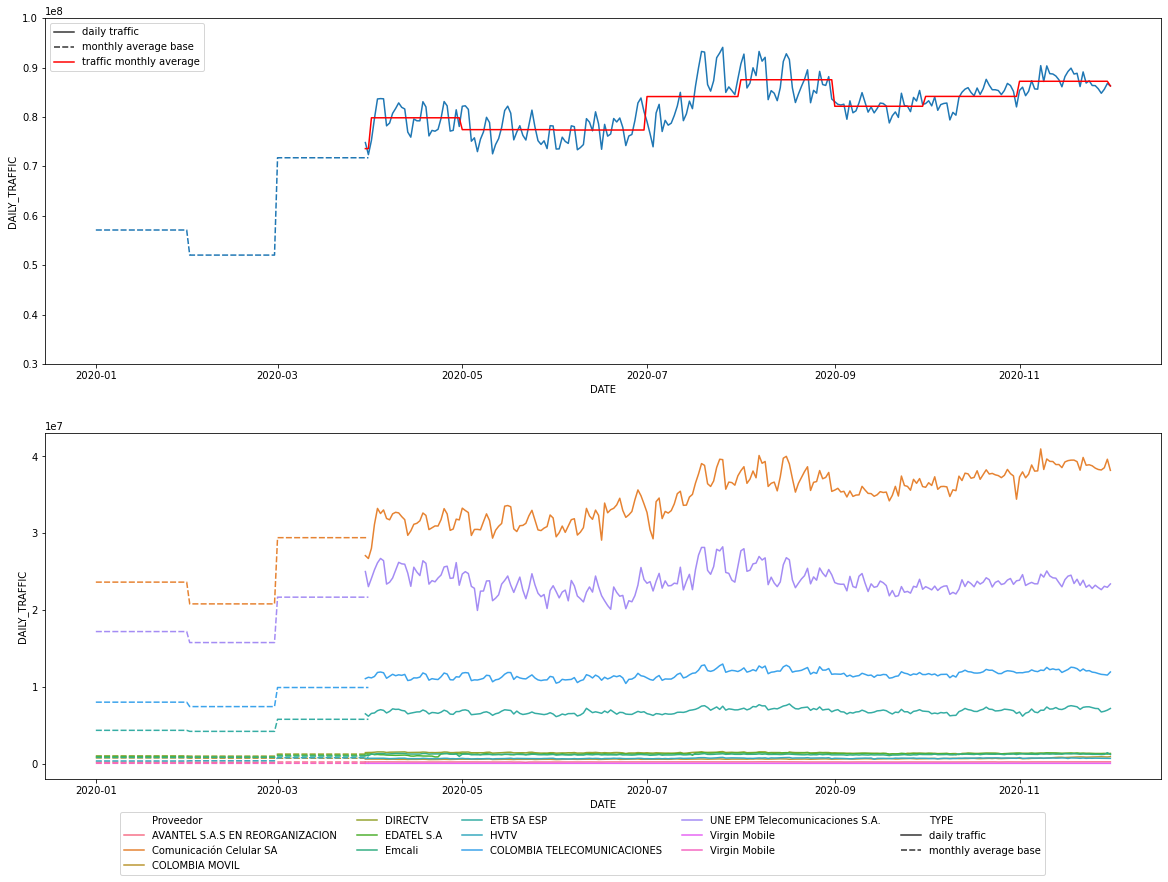

In [13]:
fig_dims = (20, 14)
fig, ax = plt.subplots(2,1, figsize=fig_dims)
ax[0].set(ylim=(3e7, 10e7))
sns.lineplot(data = agg_traf_group_concat, x = 'DATE', y = 'DAILY_TRAFFIC', style = 'TYPE', ax=ax[0], legend = "full")
sns.lineplot(data = agg_traf_day_group, x = 'DATE', y = 'MONTHLY_AVG', ax=ax[0], legend = "full", label = "traffic monthly average", color = "red")
g = sns.lineplot(data = agg_traf_total_concat, x = 'DATE', y = 'DAILY_TRAFFIC', style = "TYPE", hue = 'Proveedor', ax=ax[1], legend = "brief")
g.legend(ncol = 5, bbox_to_anchor=(0.9, -0.08))

**Remarks:** The graphs show an evident increase in the amount of traffic starting in march, jumping from a daily average of 52 to 57 PB in January and February, to a daily average of 72 to 90 PB in March to December. Colombia imposed the lockdown in March 22nd and started relaxing lockdown restrictions in May.  The general quarantine was terminated in August. Charts show that the traffic has not decreased after the economy re-opened. On the contrary, the traffic seems to continue growing. This might be explained by the fact that schools are still closed, and many companies continue to work remotely. However, this might also prove that society has implemented a digital transformation that might stay in place even after the pandemic emergency is over. In that case network infrastructure will have to adapt for this new reality.

### 3.2 Plot the evolution in Q3 and Q1 of the in number of new technologies for both fixed and mobile networks

<AxesSubplot:xlabel='TECHNOLOGY', ylabel='DIFFERENCE_Q3_Q1'>

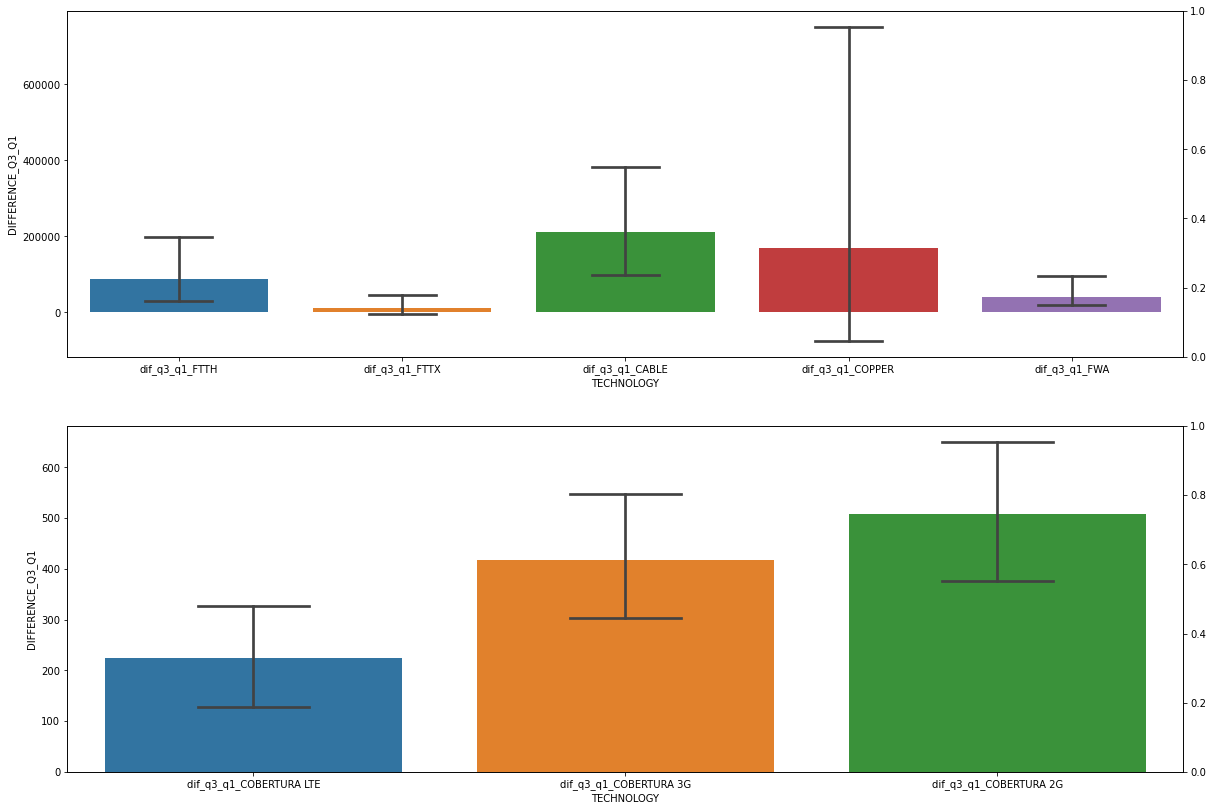

In [144]:
fig_dims = (20, 14)
fig, ax1 = plt.subplots(2,1, figsize=fig_dims)
ax2 = np.array([a.twinx() for a in ax1.ravel()])

fix_un_pivot_dif_acc = fixed_analysis_no_geo[['dif_q3_q1_FTTH','dif_q3_q1_FTTX', 'dif_q3_q1_CABLE', 'dif_q3_q1_COPPER', 'dif_q3_q1_FWA']].melt(var_name='TECHNOLOGY' , value_name = 'DIFFERENCE_Q3_Q1')
mob_un_pivot_dif_tech = mobile_analysis_no_geo[['dif_q3_q1_COBERTURA LTE', 'dif_q3_q1_COBERTURA 3G', 'dif_q3_q1_COBERTURA 2G']].melt(var_name='TECHNOLOGY' , value_name = 'DIFFERENCE_Q3_Q1')
sns.barplot(data = fix_un_pivot_dif_acc, x = "TECHNOLOGY", y= "DIFFERENCE_Q3_Q1", ax = ax1[0], capsize = 0.3, estimator = sum, ci = 99)
sns.barplot(data = mob_un_pivot_dif_tech, x = "TECHNOLOGY", y= "DIFFERENCE_Q3_Q1", ax = ax1[1], capsize = 0.3, estimator = sum, ci = 99)


### 3.3 Map KPIs by municipality to infer possible affectation per location

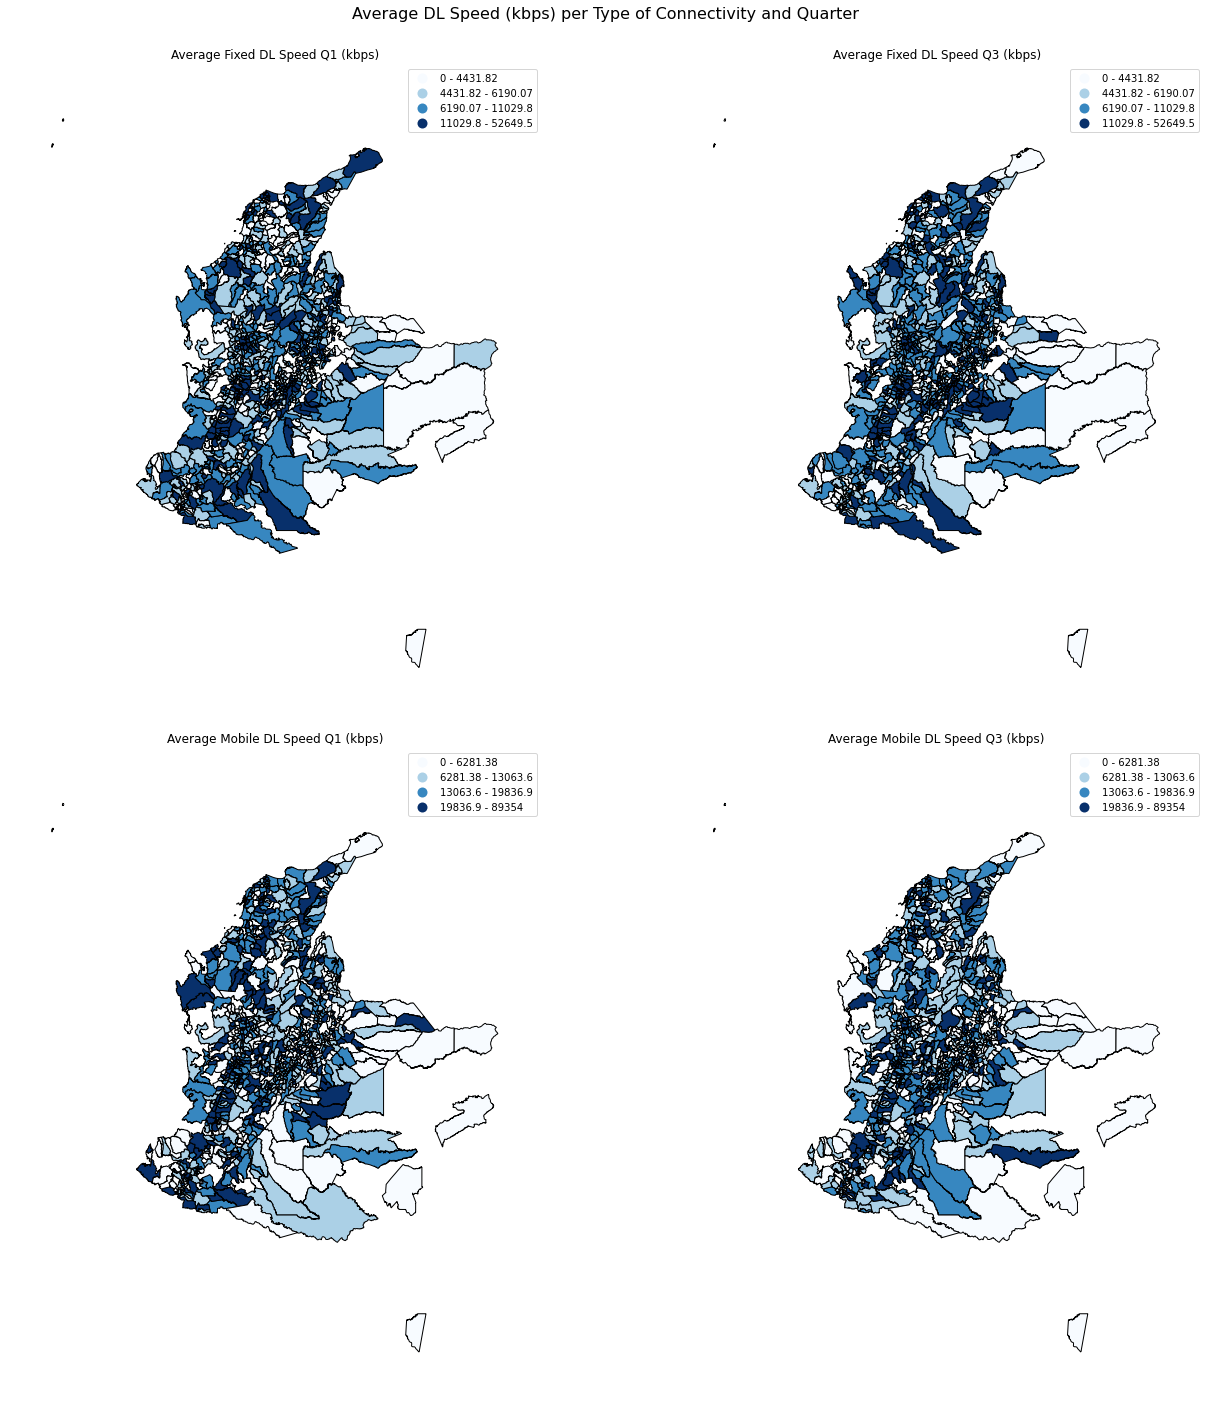

In [15]:
fig_dims = (20, 20)
fig, ax = plt.subplots(2,2, figsize=fig_dims)
df_plot1 = fixed_consolidated_geo.copy()
df_plot2 = mobile_consolidated_geo.copy()
variable1 = 'avg_d_kbps_q1'
variable2 = 'avg_d_kbps_q3'
scheme_1 = mpclas.Quantiles(df_plot1[variable1], k=4)
scheme_2 = mpclas.Quantiles(df_plot2[variable1], k=4)

gpl.choropleth(df_plot1, cmap="Blues", hue=df_plot1[variable1], scheme=scheme_1, legend = True, ax = ax[0,0])
gpl.choropleth(df_plot1, cmap="Blues", hue=df_plot1[variable2], scheme=scheme_1, legend = True, ax = ax[0,1])
gpl.choropleth(df_plot2, cmap="Blues", hue=df_plot2[variable1], scheme=scheme_2, legend = True, ax = ax[1,0])
gpl.choropleth(df_plot2, cmap="Blues", hue=df_plot2[variable2], scheme=scheme_2, legend = True, ax = ax[1,1])

fig.suptitle("Average DL Speed (kbps) per Type of Connectivity and Quarter", fontsize=16)
ax[0,0].set_title("Average Fixed DL Speed Q1 (kbps)")
ax[0,1].set_title("Average Fixed DL Speed Q3 (kbps)")
ax[1,0].set_title("Average Mobile DL Speed Q1 (kbps)")
ax[1,1].set_title("Average Mobile DL Speed Q3 (kbps)")
fig.tight_layout()
fig.subplots_adjust(top=0.94)

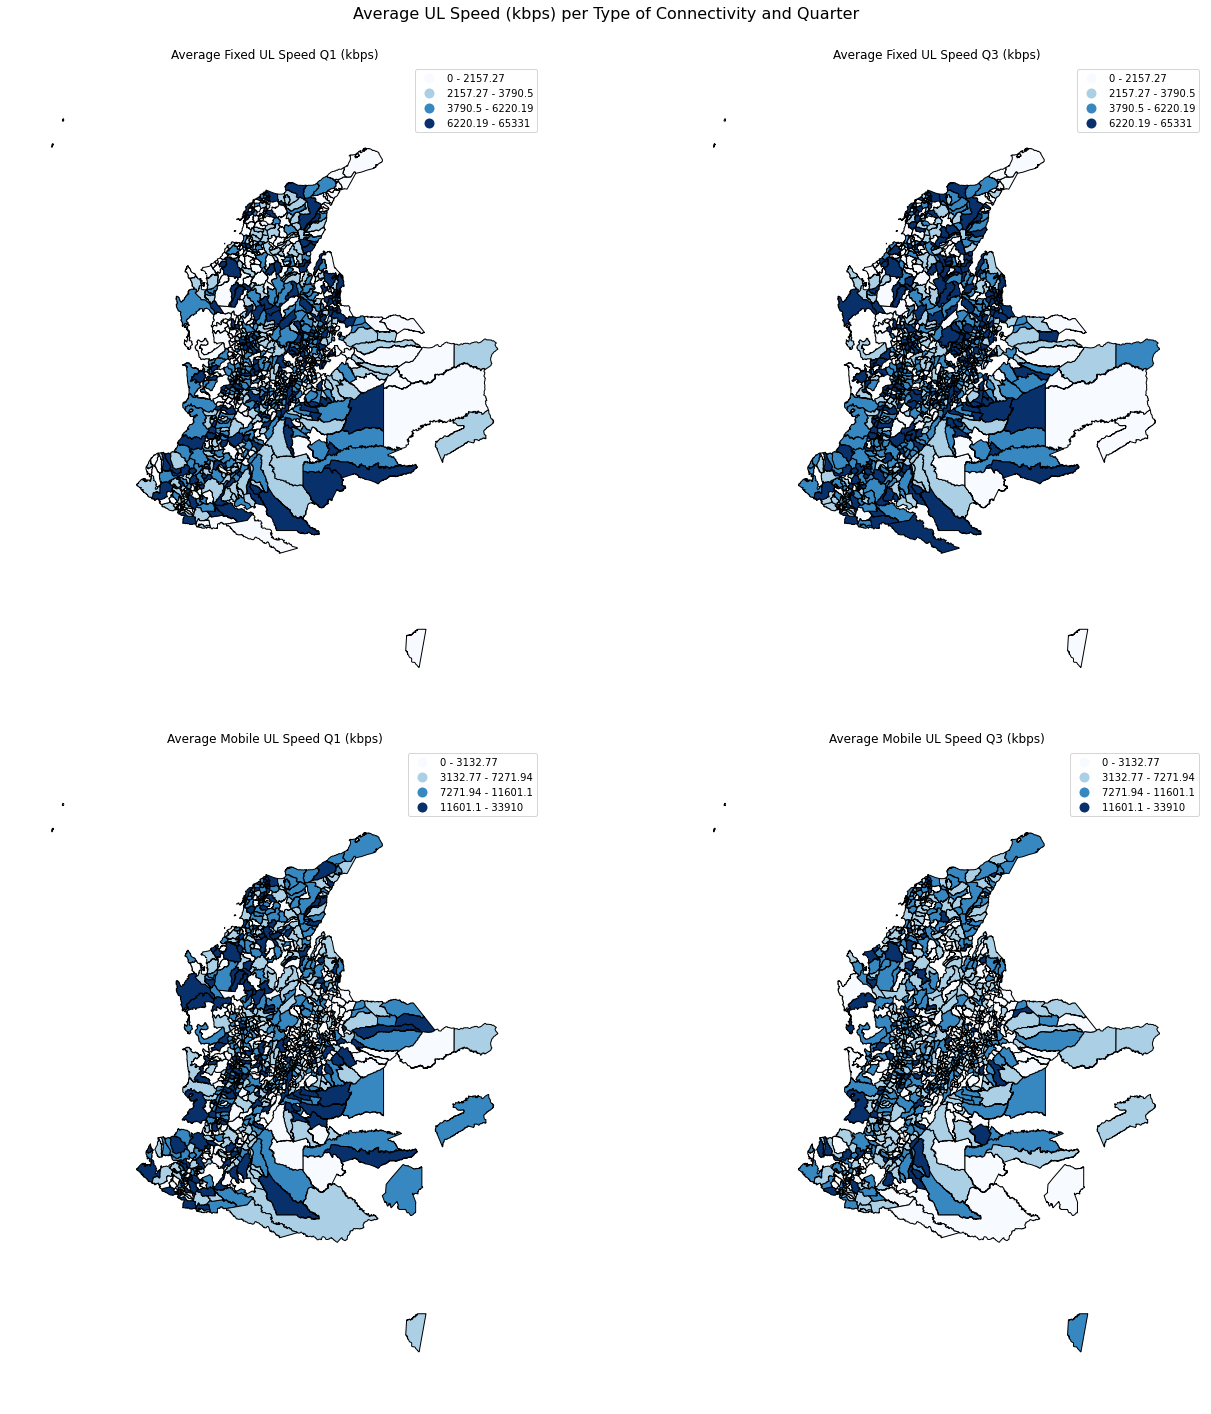

In [16]:
fig_dims = (20, 20)
fig, ax = plt.subplots(2,2, figsize=fig_dims)
df_plot1 = fixed_consolidated_geo.copy()
df_plot2 = mobile_consolidated_geo.copy()
variable1 = 'avg_u_kbps_q1'
variable2 = 'avg_u_kbps_q3'
scheme_1 = mpclas.Quantiles(df_plot1[variable1], k=4)
scheme_2 = mpclas.Quantiles(df_plot2[variable1], k=4)

gpl.choropleth(df_plot1, cmap="Blues", hue=df_plot1[variable1], scheme=scheme_1, legend = True, ax = ax[0,0])
gpl.choropleth(df_plot1, cmap="Blues", hue=df_plot1[variable2], scheme=scheme_1, legend = True, ax = ax[0,1])
gpl.choropleth(df_plot2, cmap="Blues", hue=df_plot2[variable1], scheme=scheme_2, legend = True, ax = ax[1,0])
gpl.choropleth(df_plot2, cmap="Blues", hue=df_plot2[variable2], scheme=scheme_2, legend = True, ax = ax[1,1])

fig.suptitle("Average UL Speed (kbps) per Type of Connectivity and Quarter", fontsize=16)
ax[0,0].set_title("Average Fixed UL Speed Q1 (kbps)")
ax[0,1].set_title("Average Fixed UL Speed Q3 (kbps)")
ax[1,0].set_title("Average Mobile UL Speed Q1 (kbps)")
ax[1,1].set_title("Average Mobile UL Speed Q3 (kbps)")
fig.tight_layout()
fig.subplots_adjust(top=0.94)

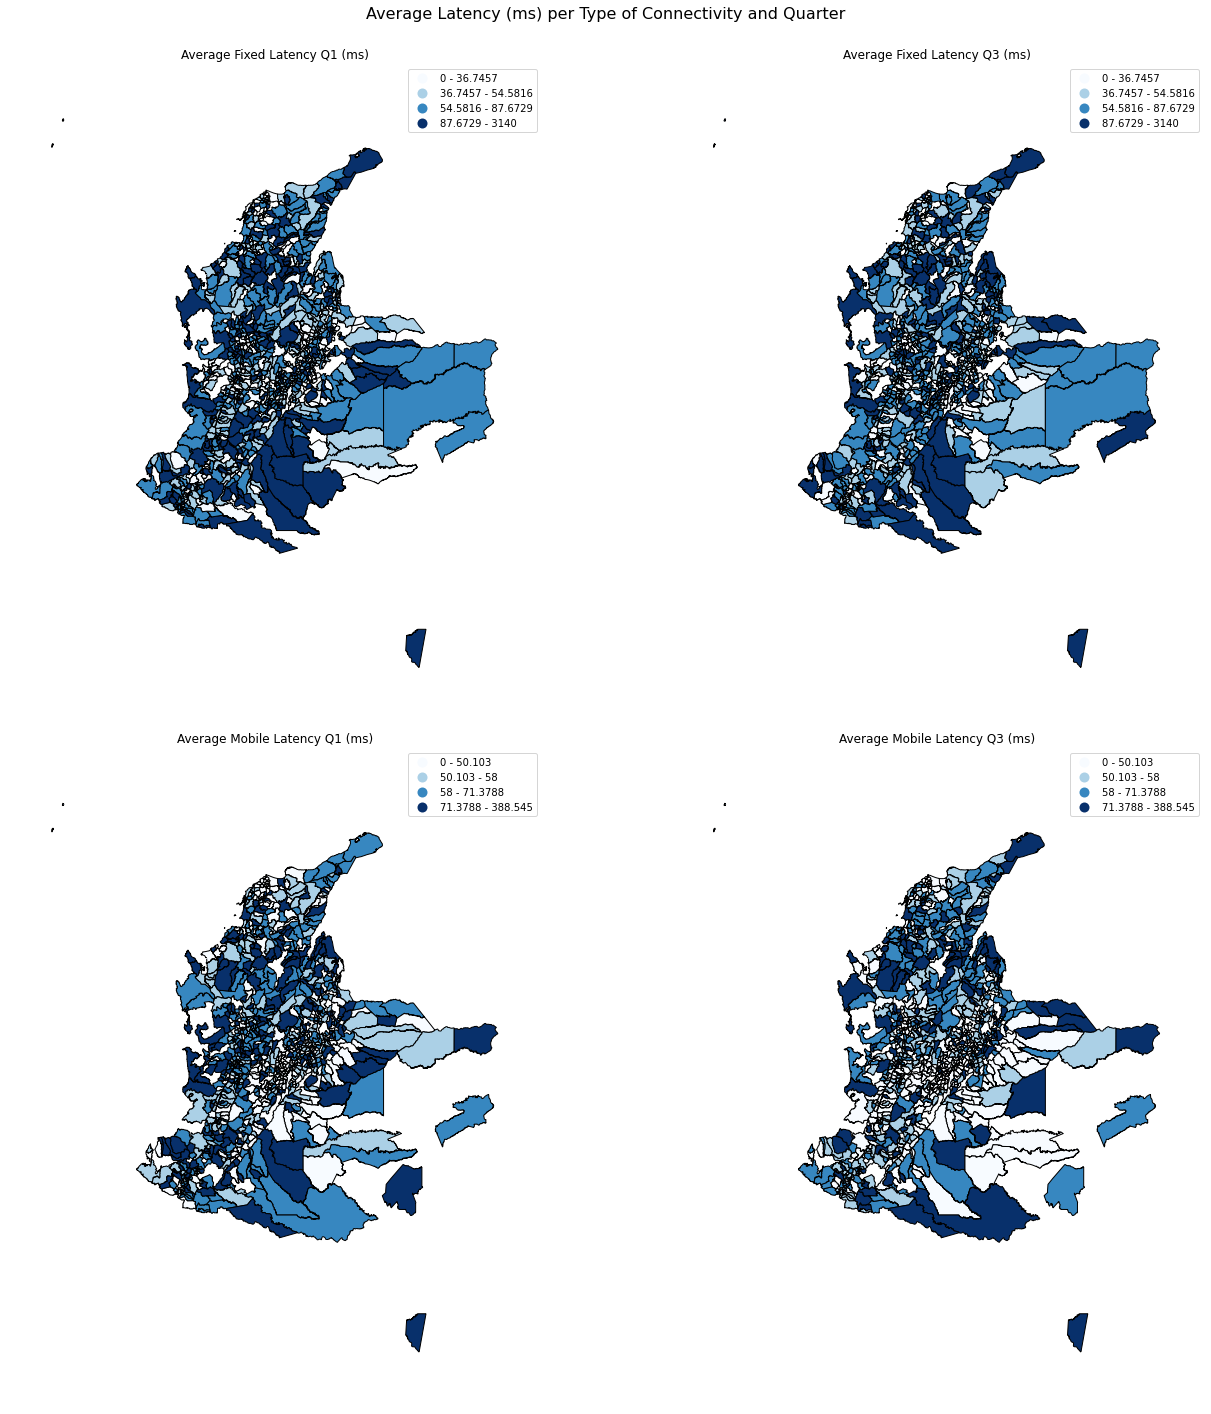

In [17]:
fig_dims = (20, 20)
fig, ax = plt.subplots(2,2, figsize=fig_dims)
df_plot1 = fixed_consolidated_geo.copy()
df_plot2 = mobile_consolidated_geo.copy()
variable1 = 'avg_lat_ms_q1'
variable2 = 'avg_lat_ms_q3'
scheme_1 = mpclas.Quantiles(df_plot1[variable1], k=4)
scheme_2 = mpclas.Quantiles(df_plot2[variable1], k=4)

gpl.choropleth(df_plot1, cmap="Blues", hue=df_plot1[variable1], scheme=scheme_1, legend = True, ax = ax[0,0])
gpl.choropleth(df_plot1, cmap="Blues", hue=df_plot1[variable2], scheme=scheme_1, legend = True, ax = ax[0,1])
gpl.choropleth(df_plot2, cmap="Blues", hue=df_plot2[variable1], scheme=scheme_2, legend = True, ax = ax[1,0])
gpl.choropleth(df_plot2, cmap="Blues", hue=df_plot2[variable2], scheme=scheme_2, legend = True, ax = ax[1,1])

fig.suptitle("Average Latency (ms) per Type of Connectivity and Quarter", fontsize=16)
ax[0,0].set_title("Average Fixed Latency Q1 (ms)")
ax[0,1].set_title("Average Fixed Latency Q3 (ms)")
ax[1,0].set_title("Average Mobile Latency Q1 (ms)")
ax[1,1].set_title("Average Mobile Latency Q3 (ms)")
fig.tight_layout()
fig.subplots_adjust(top=0.94)

### 3.4 Plot Countrywide KPI Evolution

In [18]:
# Understand kpi distribution using describe function
display(fixed_analysis_no_geo[['devices_q1', 'devices_q2', 'devices_q3', 'avg_d_kbps_q1', 'avg_d_kbps_q2','avg_d_kbps_q3', 'avg_u_kbps_q1', 'avg_u_kbps_q2' , 'avg_u_kbps_q3', 'avg_lat_ms_q1', 'avg_lat_ms_q2', 'avg_lat_ms_q3']].describe())
display(mobile_analysis_no_geo[['devices_q1', 'devices_q2', 'devices_q3', 'avg_d_kbps_q1', 'avg_d_kbps_q2','avg_d_kbps_q3', 'avg_u_kbps_q1', 'avg_u_kbps_q2' , 'avg_u_kbps_q3', 'avg_lat_ms_q1', 'avg_lat_ms_q2', 'avg_lat_ms_q3']].describe())

devices_q1     devices_q2     devices_q3  avg_d_kbps_q1  \
count     967.000000     959.000000     967.000000     967.000000   
mean      558.211996     615.050052     608.890383    8256.112111   
std      5925.022650    6614.378838    6335.742837    6704.777207   
min         1.000000       1.000000       1.000000      16.000000   
25%         7.000000      11.000000      12.000000    4356.678421   
50%        21.000000      30.000000      34.000000    6049.000000   
75%        79.000000     108.500000     113.500000    9742.481541   
max    172528.000000  193907.000000  186504.000000   52649.503268   

       avg_d_kbps_q2  avg_d_kbps_q3  avg_u_kbps_q1  avg_u_kbps_q2  \
count     959.000000     967.000000     967.000000     959.000000   
mean    10283.528759    9960.393238    4913.305269    6845.150058   
std      9640.595627    9852.164166    4996.740091    8230.359962   
min       249.000000     525.250000      45.000000     322.000000   
25%      5104.068062    4991.402122    2106.145022    2879.702519   
50%      7105.026066    6956.156250    3674.111111    4574.741935   
75%     11788.900000   11086.889993    5711.543397    7565.060897   
max    127842.000000  147165.000000   65331.000000  130288.000000   

       avg_u_kbps_q3  avg_lat_ms_q1  avg_lat_ms_q2  avg_lat_ms_q3  
count     967.000000     967.000000     959.000000     967.000000  
mean     6194.376712     103.715648      97.714392      88.220651  
std      5496.682933     180.780465     126.022548     122.176042  
min       346.000000       5.000000       8.000000       8.200000  
25%      3011.556313      39.367654      43.608879      40.370871  
50%      4636.962963      56.688596      61.601778      57.481481  
75%      7138.121315      89.453355      95.785007      81.134615  
max     57426.000000    3140.000000    1224.000000    1314.600000

devices_q1    devices_q2    devices_q3  avg_d_kbps_q1  avg_d_kbps_q2  \
count    948.000000    903.000000    948.000000     948.000000     903.000000   
mean      78.264768     90.727575     96.155063   15009.978572   14313.625453   
std      889.847666   1015.429110   1009.802512   13305.490259   10124.373405   
min        1.000000      1.000000      1.000000      31.000000      68.000000   
25%        3.000000      4.000000      4.000000    6102.500000    6774.402574   
50%        7.000000      9.000000     11.000000   12258.067014   12736.000000   
75%       20.250000     24.000000     31.000000   19185.543860   18986.446607   
max    26328.000000  29546.000000  29929.000000   89354.000000   67758.000000   

       avg_d_kbps_q3  avg_u_kbps_q1  avg_u_kbps_q2  avg_u_kbps_q3  \
count     948.000000     948.000000     903.000000     948.000000   
mean    14169.856061    7508.279860    6564.496907    6262.879263   
std     10201.294459    5661.411966    4465.933659    4189.257843   
min       309.000000      42.000000      22.000000      84.000000   
25%      6548.052508    2913.571420    3081.525000    2934.328571   
50%     12729.247435    6843.520238    6219.730769    5855.708333   
75%     19175.854990   10831.845272    9192.115196    8929.378479   
max     86420.000000   33910.000000   34386.000000   28869.000000   

       avg_lat_ms_q1  avg_lat_ms_q2  avg_lat_ms_q3  
count     948.000000     903.000000     948.000000  
mean       66.038493      60.842927      58.638405  
std        33.713941      26.960006      25.191446  
min        18.000000      19.000000      20.500000  
25%        49.332676      47.529523      45.744784  
50%        58.683333      56.781250      53.845390  
75%        72.208617      68.200000      65.903666  
max       388.545455     599.833333     343.375000

Text(0.5, 1.0, 'Fixed Average Latency KPI Evolution per Quarter')

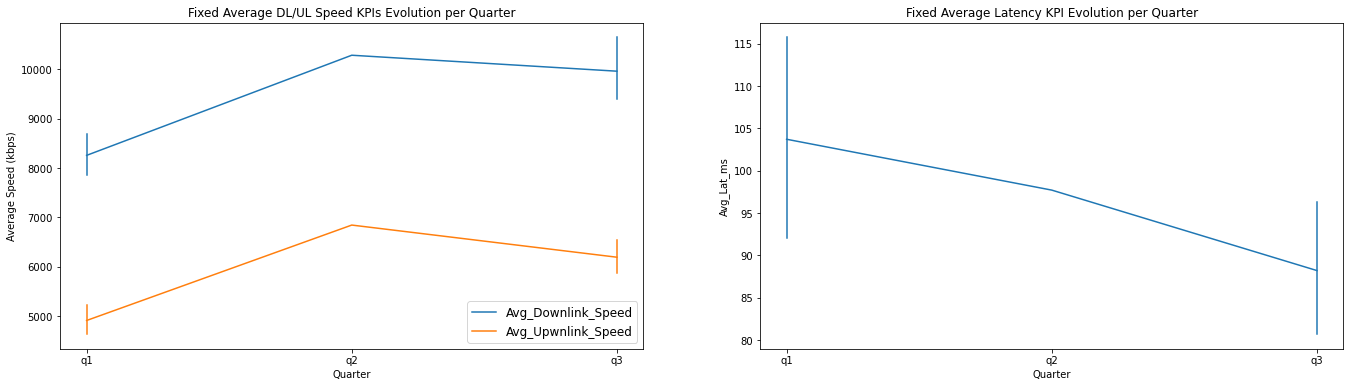

In [19]:
fix_un_pivot_kpi = fixed_analysis_no_geo[['avg_d_kbps_q1','avg_d_kbps_q2','avg_d_kbps_q3']].melt(var_name='Quarter_DL' , value_name = 'Avg_DL_kbps')
fix_un_pivot_kpi = fix_un_pivot_kpi.join(fixed_analysis_no_geo[['avg_u_kbps_q1','avg_u_kbps_q2','avg_u_kbps_q3']].melt(var_name='Quarter_UL' , value_name = 'Avg_UL_kbps'))
fix_un_pivot_kpi = fix_un_pivot_kpi.join(fixed_analysis_no_geo[['avg_lat_ms_q1','avg_lat_ms_q2','avg_lat_ms_q3']].melt(var_name='Quarter_Lat' , value_name = 'Avg_Lat_ms'))
fix_un_pivot_kpi = fix_un_pivot_kpi.join(fixed_analysis_no_geo[['devices_q1','devices_q2','devices_q3']].melt(var_name='Quarter_dev' , value_name = 'Number_unique_devices'))
fix_un_pivot_kpi['Quarter'] = fix_un_pivot_kpi['Quarter_DL'].str[-2:]
fix_un_pivot_kpi = fix_un_pivot_kpi.drop(['Quarter_DL', 'Quarter_UL', 'Quarter_Lat', 'Quarter_dev'], axis = 1)

fig, ax1 = plt.subplots(1,2, figsize=(23,6))

sns.lineplot(data=fix_un_pivot_kpi, x="Quarter", y="Avg_DL_kbps", label= "Avg_Downlink_Speed", ax = ax1[0], err_style = "bars" )
sns.lineplot(data=fix_un_pivot_kpi, x="Quarter", y="Avg_UL_kbps", label= "Avg_Upwnlink_Speed", ax = ax1[0], err_style = "bars")
sns.lineplot(data=fix_un_pivot_kpi, x="Quarter", y="Avg_Lat_ms", ax = ax1[1], err_style = "bars")
ax1[0].legend(loc='lower right', fontsize = 12)
ax1[0].set_title("Fixed Average DL/UL Speed KPIs Evolution per Quarter")
ax1[0].set_ylabel('Average Speed (kbps)')
ax1[1].set_title("Fixed Average Latency KPI Evolution per Quarter")

Text(0.5, 1.0, 'Mobile Average Latency KPI Evolution per Quarter')

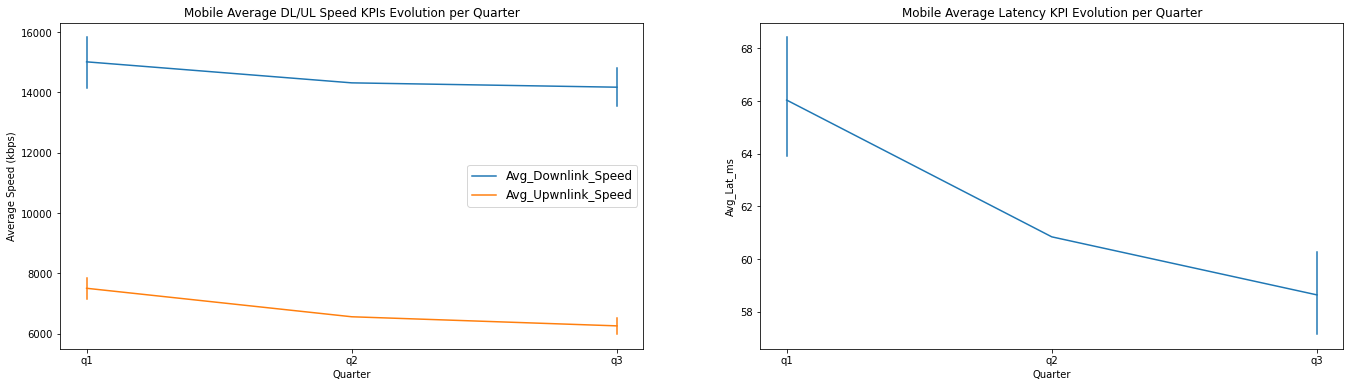

In [20]:
mob_un_pivot_kpi = mobile_analysis_no_geo[['avg_d_kbps_q1','avg_d_kbps_q2','avg_d_kbps_q3']].melt(var_name='Quarter_DL' , value_name = 'Avg_DL_kbps')
mob_un_pivot_kpi = mob_un_pivot_kpi.join(mobile_analysis_no_geo[['avg_u_kbps_q1','avg_u_kbps_q2','avg_u_kbps_q3']].melt(var_name='Quarter_UL' , value_name = 'Avg_UL_kbps'))
mob_un_pivot_kpi = mob_un_pivot_kpi.join(mobile_analysis_no_geo[['avg_lat_ms_q1','avg_lat_ms_q2','avg_lat_ms_q3']].melt(var_name='Quarter_Lat' , value_name = 'Avg_Lat_ms'))
mob_un_pivot_kpi = mob_un_pivot_kpi.join(mobile_analysis_no_geo[['devices_q1','devices_q2','devices_q3']].melt(var_name='Quarter_dev' , value_name = 'Number_unique_devices'))
mob_un_pivot_kpi['Quarter'] = mob_un_pivot_kpi['Quarter_DL'].str[-2:]
mob_un_pivot_kpi = mob_un_pivot_kpi.drop(['Quarter_DL', 'Quarter_UL', 'Quarter_Lat', 'Quarter_dev'], axis = 1)

fig, ax1 = plt.subplots(1,2, figsize=(23,6))

sns.lineplot(data=mob_un_pivot_kpi, x="Quarter", y="Avg_DL_kbps", label= "Avg_Downlink_Speed", ax = ax1[0], err_style = "bars" )
sns.lineplot(data=mob_un_pivot_kpi, x="Quarter", y="Avg_UL_kbps", label= "Avg_Upwnlink_Speed", ax = ax1[0], err_style = "bars")
sns.lineplot(data=mob_un_pivot_kpi, x="Quarter", y="Avg_Lat_ms", ax = ax1[1], err_style = "bars")
ax1[0].legend(loc='center right', fontsize = 12)
ax1[0].set_title("Mobile Average DL/UL Speed KPIs Evolution per Quarter")
ax1[0].set_ylabel('Average Speed (kbps)')
ax1[1].set_title("Mobile Average Latency KPI Evolution per Quarter")


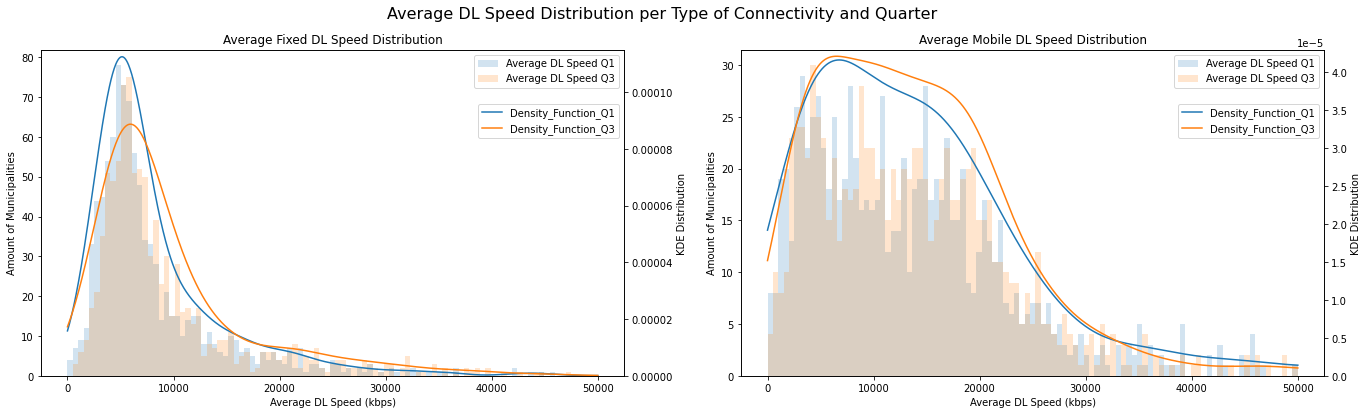

In [21]:
# Plot Average DL Distribution
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))
variable1 = 'avg_d_kbps_q1'
variable2 = 'avg_d_kbps_q3'
offset = 0
bins = np.linspace(0, 50000, 100)
xx = np.linspace(0, 50000, 1000)

fxq1 = fixed_analysis_no_geo[variable1]
fkdeq1 = stats.gaussian_kde(fxq1)
fxq3 = fixed_analysis_no_geo[variable2]
fkdeq3 = stats.gaussian_kde(fxq3)

mxq1 = mobile_analysis_no_geo[variable1]
mkdeq1 = stats.gaussian_kde(mxq1)
mxq3 = mobile_analysis_no_geo[variable2]
mkdeq3 = stats.gaussian_kde(mxq3)

ax2 = np.array([a.twinx() for a in ax1.ravel()])

ax1[0].hist(fxq1, bins= bins - offset, alpha=0.2, label='Average DL Speed Q1')
ax1[0].hist(fxq3, bins= bins- offset, alpha=0.2, label='Average DL Speed Q3')
ax2[0].plot(xx- offset, fkdeq1(xx), label = "Density_Function_Q1")
ax2[0].plot(xx - offset, fkdeq3(xx), label = "Density_Function_Q3")
ax1[0].set_xlabel('Average DL Speed (kbps)')
ax1[0].set_ylabel('Amount of Municipalities')
ax2[0].set_ylabel('KDE Distribution')
ax1[0].legend(loc='upper right')
ax2[0].legend(bbox_to_anchor=(1, 0.85))
ax2[0].set_ylim(0,0.000115)
ax1[0].set_title("Average Fixed DL Speed Distribution")

ax1[1].hist(mxq1, bins= bins - offset, alpha=0.2, label='Average DL Speed Q1')
ax1[1].hist(mxq3, bins= bins- offset, alpha=0.2, label='Average DL Speed Q3')
ax2[1].plot(xx - offset, mkdeq1(xx), label = "Density_Function_Q1")
ax2[1].plot(xx - offset, mkdeq3(xx), label = "Density_Function_Q3")
ax1[1].set_xlabel('Average DL Speed (kbps)')
ax1[1].set_ylabel('Amount of Municipalities')
ax2[1].set_ylabel('KDE Distribution')
ax1[1].legend(loc='upper right')
ax2[1].legend(bbox_to_anchor=(1, 0.85))
ax2[1].set_ylim(0,4.3e-5)
ax1[1].set_title("Average Mobile DL Speed Distribution")

fig.suptitle("Average DL Speed Distribution per Type of Connectivity and Quarter", fontsize=16)

plt.show()

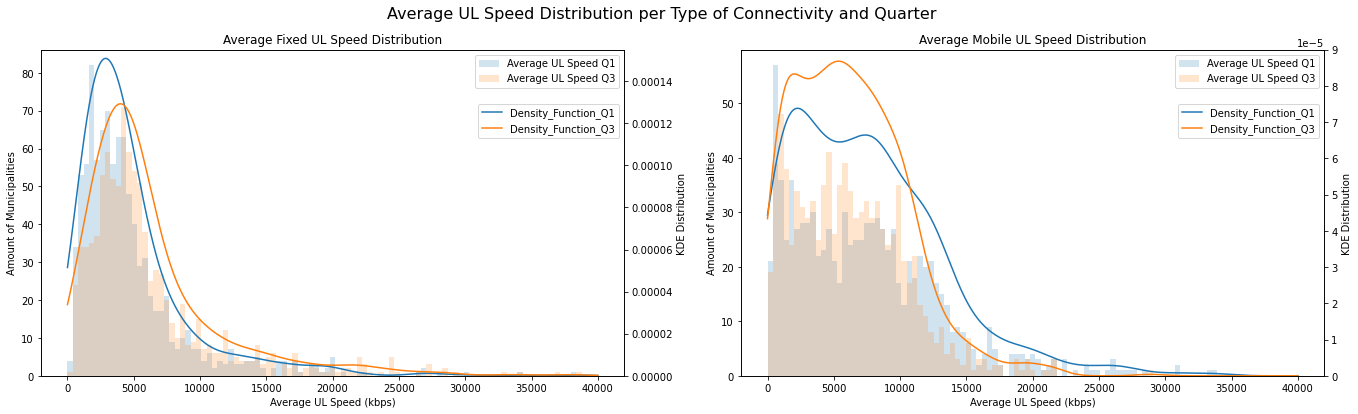

In [22]:
# Plot Average UL Distribution
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))
variable1 = 'avg_u_kbps_q1'
variable2 = 'avg_u_kbps_q3'
offset = 0
bins = np.linspace(0, 40000, 100)
xx = np.linspace(0, 40000, 1000)

fxq1 = fixed_analysis_no_geo[variable1]
fkdeq1 = stats.gaussian_kde(fxq1)
fxq3 = fixed_analysis_no_geo[variable2]
fkdeq3 = stats.gaussian_kde(fxq3)

mxq1 = mobile_analysis_no_geo[variable1]
mkdeq1 = stats.gaussian_kde(mxq1)
mxq3 = mobile_analysis_no_geo[variable2]
mkdeq3 = stats.gaussian_kde(mxq3)

ax2 = np.array([a.twinx() for a in ax1.ravel()])

ax1[0].hist(fxq1, bins= bins - offset, alpha=0.2, label='Average UL Speed Q1')
ax1[0].hist(fxq3, bins= bins- offset, alpha=0.2, label='Average UL Speed Q3')
ax2[0].plot(xx- offset, fkdeq1(xx), label = "Density_Function_Q1")
ax2[0].plot(xx - offset, fkdeq3(xx), label = "Density_Function_Q3")
ax1[0].set_xlabel('Average UL Speed (kbps)')
ax1[0].set_ylabel('Amount of Municipalities')
ax2[0].set_ylabel('KDE Distribution')
ax1[0].legend(loc='upper right')
ax2[0].legend(bbox_to_anchor=(1, 0.85))
ax2[0].set_ylim(0, 1.55e-4)
ax1[0].set_title("Average Fixed UL Speed Distribution")

ax1[1].hist(mxq1, bins= bins - offset, alpha=0.2, label='Average UL Speed Q1')
ax1[1].hist(mxq3, bins= bins- offset, alpha=0.2, label='Average UL Speed Q3')
ax2[1].plot(xx- offset, mkdeq1(xx), label = "Density_Function_Q1")
ax2[1].plot(xx - offset, mkdeq3(xx), label = "Density_Function_Q3")
ax1[1].set_xlabel('Average UL Speed (kbps)')
ax1[1].set_ylabel('Amount of Municipalities')
ax2[1].set_ylabel('KDE Distribution')
ax1[1].legend(loc='upper right')
ax2[1].legend(bbox_to_anchor=(1, 0.85))
ax2[1].set_ylim(0,0.9e-4)
ax1[1].set_title("Average Mobile UL Speed Distribution")

fig.suptitle("Average UL Speed Distribution per Type of Connectivity and Quarter", fontsize=16)

plt.show()

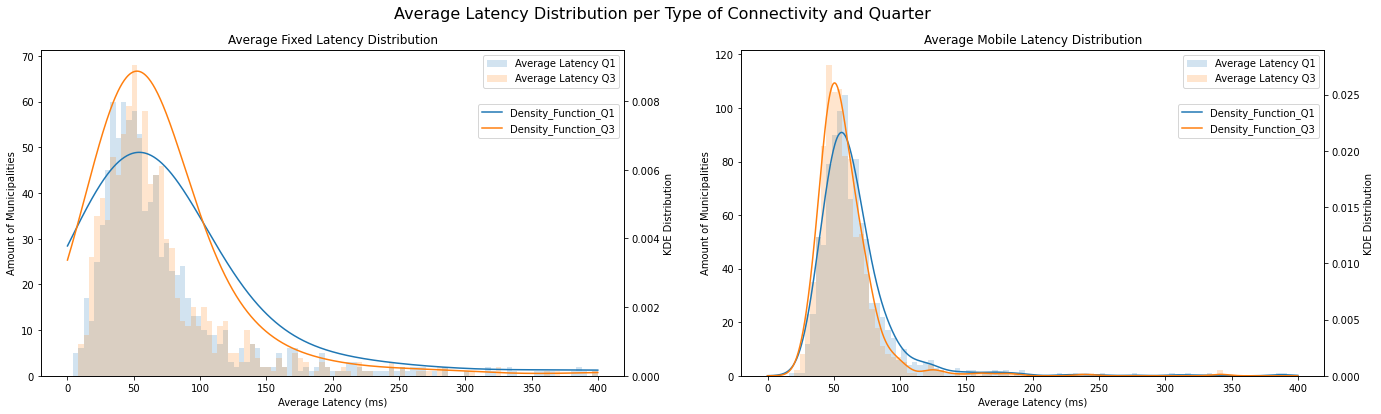

In [23]:
# Plot Average UL Distribution
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))
variable1 = 'avg_lat_ms_q1'
variable2 = 'avg_lat_ms_q3'
offset = 0
bins = np.linspace(0, 400, 100)
xx = np.linspace(0, 400, 1000)

fxq1 = fixed_analysis_no_geo[variable1]
fkdeq1 = stats.gaussian_kde(fxq1)
fxq3 = fixed_analysis_no_geo[variable2]
fkdeq3 = stats.gaussian_kde(fxq3)

mxq1 = mobile_analysis_no_geo[variable1]
mkdeq1 = stats.gaussian_kde(mxq1)
mxq3 = mobile_analysis_no_geo[variable2]
mkdeq3 = stats.gaussian_kde(mxq3)
ax2 = np.array([a.twinx() for a in ax1.ravel()])

ax1[0].hist(fxq1, bins= bins - offset, alpha=0.2, label='Average Latency Q1')
ax1[0].hist(fxq3, bins= bins- offset, alpha=0.2, label='Average Latency Q3')
ax2[0].plot(xx- offset, fkdeq1(xx), label = "Density_Function_Q1")
ax2[0].plot(xx - offset, fkdeq3(xx), label = "Density_Function_Q3")
ax1[0].set_xlabel('Average Latency (ms)')
ax1[0].set_ylabel('Amount of Municipalities')
ax2[0].set_ylabel('KDE Distribution')
ax1[0].legend(loc='upper right')
ax2[0].legend(bbox_to_anchor=(1, 0.85))
ax2[0].set_ylim(0, 0.0095)
ax1[0].set_title("Average Fixed Latency Distribution")

ax1[1].hist(mxq1, bins= bins - offset, alpha=0.2, label='Average Latency Q1')
ax1[1].hist(mxq3, bins= bins- offset, alpha=0.2, label='Average Latency Q3')
ax2[1].plot(xx- offset, mkdeq1(xx), label = "Density_Function_Q1")
ax2[1].plot(xx - offset, mkdeq3(xx), label = "Density_Function_Q3")
ax1[1].set_xlabel('Average Latency (ms)')
ax1[1].set_ylabel('Amount of Municipalities')
ax2[1].set_ylabel('KDE Distribution')
ax1[1].legend(loc='upper right')
ax2[1].legend(bbox_to_anchor=(1, 0.85))
ax2[1].set_ylim(0,0.029)
ax1[1].set_title("Average Mobile Latency Distribution")

fig.suptitle("Average Latency Distribution per Type of Connectivity and Quarter", fontsize=16)

plt.show()

### 3.5 Plot distribution of the difference of Q3 and Q1 KPIs per municipality

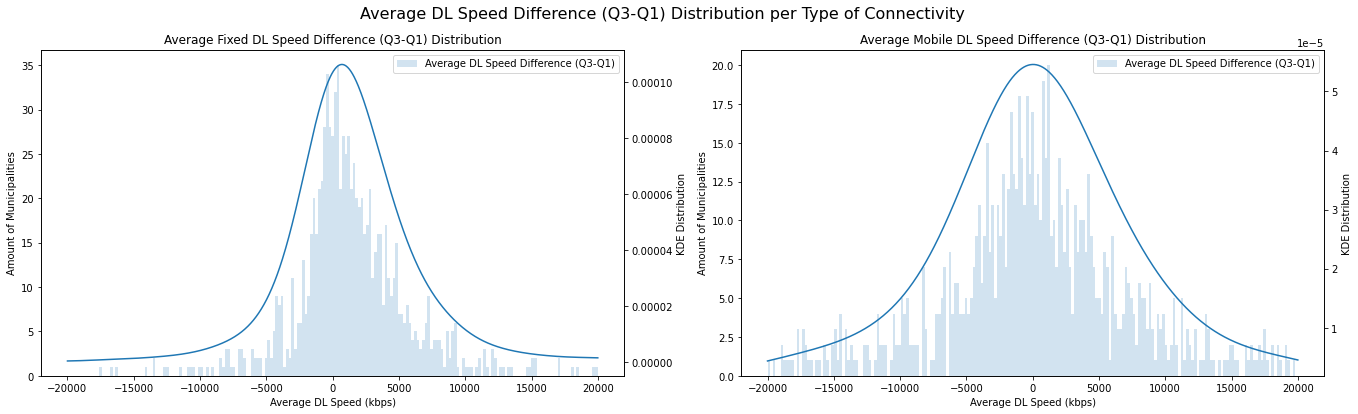

In [24]:
# Plot Average DL Distribution difference
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))
variable1 = 'dif_avg_d_kbps_q3_q1'

offset = 1
bins = np.linspace(-20000, 20000, 200)
xx = np.linspace(-20000, 20000, 1000)

fx = fixed_analysis_no_geo[variable1]
fkde = stats.gaussian_kde(fx)


mx = mobile_analysis_no_geo[variable1]
mkde = stats.gaussian_kde(mx)

ax2 = np.array([a.twinx() for a in ax1.ravel()])

ax1[0].hist(fx, bins= bins - offset, alpha=0.2, label='Average DL Speed Difference (Q3-Q1)')
ax2[0].plot(xx- offset, fkde(xx), label = "Density_Function")
ax1[0].set_xlabel('Average DL Speed (kbps)')
ax1[0].set_ylabel('Amount of Municipalities')
ax2[0].set_ylabel('KDE Distribution')
ax1[0].legend(loc='upper right')
#ax2[0].legend(bbox_to_anchor=(1, 0.85))
#ax2[0].set_ylim(0, 0.007)
ax1[0].set_title("Average Fixed DL Speed Difference (Q3-Q1) Distribution")

ax1[1].hist(mx, bins= bins - offset, alpha=0.2, label='Average DL Speed Difference (Q3-Q1)')
ax2[1].plot(xx- offset, mkde(xx), label = "Density_Function")
ax1[1].set_xlabel('Average DL Speed (kbps)')
ax1[1].set_ylabel('Amount of Municipalities')
ax2[1].set_ylabel('KDE Distribution')
ax1[1].legend(loc='upper right')
#ax2[1].legend(bbox_to_anchor=(1, 0.85))
#ax2[1].set_ylim(0,0.007)
ax1[1].set_title("Average Mobile DL Speed Difference (Q3-Q1) Distribution")

fig.suptitle("Average DL Speed Difference (Q3-Q1) Distribution per Type of Connectivity", fontsize=16)

plt.show()

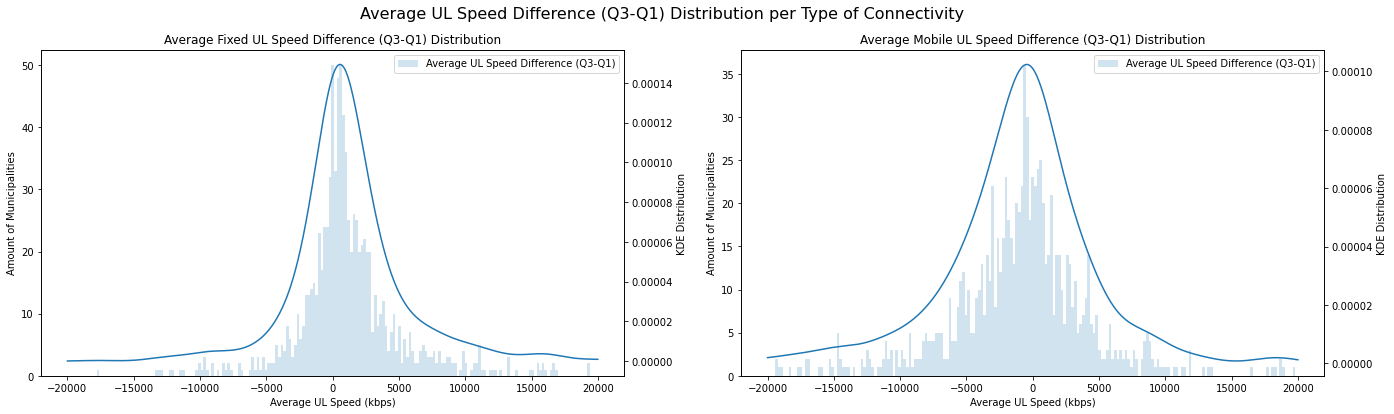

In [25]:
# Plot Average UL Distribution difference
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))
variable1 = 'dif_avg_u_kbps_q3_q1'

offset = 1
bins = np.linspace(-20000, 20000, 200)
xx = np.linspace(-20000, 20000, 1000)

fx = fixed_analysis_no_geo[variable1]
fkde = stats.gaussian_kde(fx)


mx = mobile_analysis_no_geo[variable1]
mkde = stats.gaussian_kde(mx)

ax2 = np.array([a.twinx() for a in ax1.ravel()])

ax1[0].hist(fx, bins= bins - offset, alpha=0.2, label='Average UL Speed Difference (Q3-Q1)')
ax2[0].plot(xx- offset, fkde(xx), label = "Density_Function")
ax1[0].set_xlabel('Average UL Speed (kbps)')
ax1[0].set_ylabel('Amount of Municipalities')
ax2[0].set_ylabel('KDE Distribution')
ax1[0].legend(loc='upper right')
#ax2[0].legend(bbox_to_anchor=(1, 0.85))
#ax2[0].set_ylim(0, 0.007)
ax1[0].set_title("Average Fixed UL Speed Difference (Q3-Q1) Distribution")

ax1[1].hist(mx, bins= bins - offset, alpha=0.2, label='Average UL Speed Difference (Q3-Q1)')
ax2[1].plot(xx- offset, mkde(xx), label = "Density_Function")
ax1[1].set_xlabel('Average UL Speed (kbps)')
ax1[1].set_ylabel('Amount of Municipalities')
ax2[1].set_ylabel('KDE Distribution')
ax1[1].legend(loc='upper right')
#ax2[1].legend(bbox_to_anchor=(1, 0.85))
#ax2[1].set_ylim(0,0.007)
ax1[1].set_title("Average Mobile UL Speed Difference (Q3-Q1) Distribution")

fig.suptitle("Average UL Speed Difference (Q3-Q1) Distribution per Type of Connectivity", fontsize=16)

plt.show()

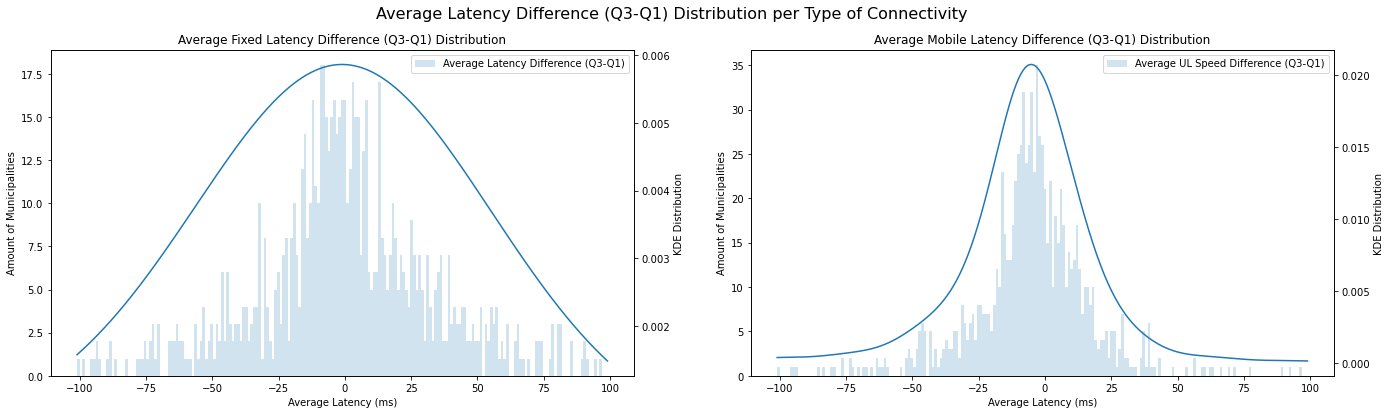

In [26]:
# Plot Average Latency Distribution difference
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))
variable1 = 'dif_avg_lat_ms_q3_q1'

offset = 1
bins = np.linspace(-100, 100, 200)
xx = np.linspace(-100, 100, 1000)

fx = fixed_analysis_no_geo[variable1]
fkde = stats.gaussian_kde(fx)


mx = mobile_analysis_no_geo[variable1]
mkde = stats.gaussian_kde(mx)

ax2 = np.array([a.twinx() for a in ax1.ravel()])

ax1[0].hist(fx, bins= bins - offset, alpha=0.2, label='Average Latency Difference (Q3-Q1)')
ax2[0].plot(xx- offset, fkde(xx), label = "Density_Function")
ax1[0].set_xlabel('Average Latency (ms)')
ax1[0].set_ylabel('Amount of Municipalities')
ax2[0].set_ylabel('KDE Distribution')
ax1[0].legend(loc='upper right')
#ax2[0].legend(bbox_to_anchor=(1, 0.85))
#ax2[0].set_ylim(0, 0.007)
ax1[0].set_title("Average Fixed Latency Difference (Q3-Q1) Distribution")

ax1[1].hist(mx, bins= bins - offset, alpha=0.2, label='Average UL Speed Difference (Q3-Q1)')
ax2[1].plot(xx- offset, mkde(xx), label = "Density_Function")
ax1[1].set_xlabel('Average Latency (ms)')
ax1[1].set_ylabel('Amount of Municipalities')
ax2[1].set_ylabel('KDE Distribution')
ax1[1].legend(loc='upper right')
#ax2[1].legend(bbox_to_anchor=(1, 0.85))
#ax2[1].set_ylim(0,0.007)
ax1[1].set_title("Average Mobile Latency Difference (Q3-Q1) Distribution")

fig.suptitle("Average Latency Difference (Q3-Q1) Distribution per Type of Connectivity", fontsize=16)

plt.show()

### 3.6 Analyze Number of Tests per Municipality
The distribution plots did not show an evident deterioration on the mean and the overall distribution when considering all the municipalities. However, distribution of the KPI difference between Q3 and Q1 charts also show that there is a severe deterioration for certain group of municipalities, specially for Uplink Speed and Latency KPIs. This section plots the distribution of the % deterioration for each KPI.

#### Sample Size
Although the datasets include information for 967 municipalities for fixed networks and 948 municipalities for mobile networks, many of the municipalities just included a couple of tests and 1 or 2 unique devices. A minimum amount tests per municipality shall be defined prior to any further analysis. The average population size for Colombian municipalities is only 43.816 inhabitants. Sampling design theory dictates that a random of sample of around 740 should be used to reach 90% confidence levels and 3% error. This ideal sample size is far from the volumes that Ookla dataset has, besides not being randomized at all. I decided then to define a minimum threshold based on the distribution of tests per 100.000 inhabitants in the dataset.

The graph shows that 122 municipalities had less than 50 tests per 100.000 inhabitants in Q1 or Q3 for fixed networks, and 340 municipalities had less than 50 tests per 100.000 inhabitants in Q1 or Q3 for mobile networks. Although 50 tests per 100.000 inhabitants is a sample size that is far from ideal, increasing the threshold would result in excluding of more than 50% of the base of municipalities.

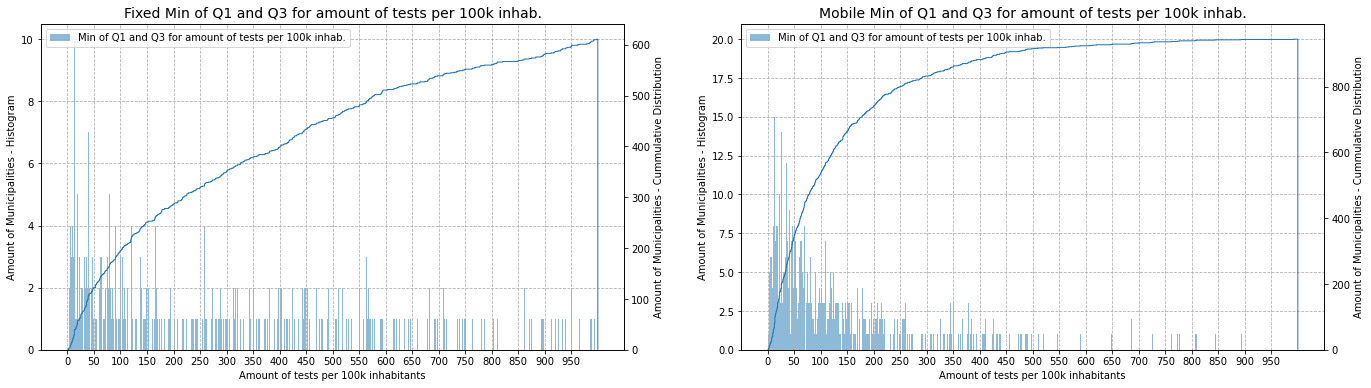

In [27]:
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))
bins = np.linspace(0, 1000, 1000)

fx = fixed_analysis_no_geo[['tests_q1_per_100k_pop','tests_q3_per_100k_pop']].min(axis = 1)
mx = mobile_analysis_no_geo[['tests_q1_per_100k_pop','tests_q3_per_100k_pop']].min(axis = 1)

ax2 = np.array([a.twinx() for a in ax1.ravel()])

ax1[0].hist(fx, bins= bins, alpha=0.5, label='Min of Q1 and Q3 for amount of tests per 100k inhab.')
ax2[0].hist(fx, bins= bins, histtype='step', cumulative=1)
ax1[0].set_xlabel('Amount of tests per 100k inhabitants')
ax2[0].set_ylabel('Amount of Municipalities - Cummulative Distribution')
ax1[0].set_ylabel('Amount of Municipalities - Histogram')
ax1[0].legend(loc='upper left')
ax1[0].set_title("Fixed Min of Q1 and Q3 for amount of tests per 100k inhab.", fontsize = 14)
ax1[0].set_xticks(np.arange(0, 1000, step=50))

ax1[0].grid( linestyle='--')

ax1[1].hist(mx, bins= bins, alpha=0.5, label='Min of Q1 and Q3 for amount of tests per 100k inhab.')
ax2[1].hist(mx, bins= bins, histtype='step', cumulative=1)
ax1[1].set_xlabel('Amount of tests per 100k inhabitants')
ax2[1].set_ylabel('Amount of Municipalities - Cummulative Distribution')
ax1[1].set_ylabel('Amount of Municipalities - Histogram')
ax1[1].legend(loc='upper left')
ax1[1].set_title("Mobile Min of Q1 and Q3 for amount of tests per 100k inhab.", fontsize = 14)
ax1[1].set_xticks(np.arange(0, 1000, step=50))

ax1[1].grid( linestyle='--')

### 3.7 Define threshold for significant deterioration and Municipalities with significant Deterioration

In [12]:
# Discard municipalities with less than 50 tests per 100k inhabitants in either Q1 or Q3
thr_test_fix = 50
thr_test_mob = 50
fixed_analysis_no_geo_thr = fixed_analysis_no_geo.loc[(fixed_analysis_no_geo['tests_q1_per_100k_pop'] > thr_test_fix) & (fixed_analysis_no_geo['tests_q3_per_100k_pop'] > thr_test_fix)]
mobile_analysis_no_geo_thr = mobile_analysis_no_geo.loc[(mobile_analysis_no_geo['tests_q1_per_100k_pop'] > thr_test_mob) & (mobile_analysis_no_geo['tests_q3_per_100k_pop'] > thr_test_mob)]

print("The shape of the fixed base excluding municipalities with less than", thr_test_fix, "tests per 100k inhabitants: ", fixed_analysis_no_geo_thr.shape)
#display(fixed_analysis_no_geo_thr.head())
print("The shape of the mobile base excluding municipalities with less than", thr_test_mob, "tests per 100k inhabitants: ", mobile_analysis_no_geo_thr.shape)
#display(mobile_analysis_no_geo_dev.head())

The shape of the fixed base excluding municipalities with less than 50 tests per 100k inhabitants:  (845, 129)
The shape of the mobile base excluding municipalities with less than 50 tests per 100k inhabitants:  (608, 157)


#### KPI deterioration plot
Just as predicted by my hypothesis, even though the KPI distribution of all the municipalities showed no significant differences between Q1 and Q3, there is a significant group of municipalities that is showing severe affectation:
- **Fixed Networks**: 
    - *Mild deterioration*: 420 municipalities (**50%** of the universe) experienced 10% or more deterioration in any of the three KPIs.
    - *Significant deterioration*: 343 municipalities (**41%** of the universe) experienced 30% or more deterioration in any of the three KPIs. 
    - *Extreme deterioration*: 140 municipalities (**17%** of the universe) experienced 80% or more deterioration in any of the three KPIs. 
- **Mobile Networks**: 
    -  *Mild deterioration*: 359 municipalities (**69%** of the universe) experienced 10% or more deterioration in any of the three KPIs.
    - *Significant deterioration*: 257 municipalities (**42%** of the universe) experienced 30% or more deterioration in any of the three KPIs. 
    - *Extreme deterioration*: 34 municipalities (**6%** of the universe) experienced 80% or more deterioration in any of the three KPIs. 

I defined 30% as the threshold for significant deterioration in the KPIs for the following steps of the analysis

In [29]:
# Deterioration for fixed network base
deterioration_fixed = pd.DataFrame()
deterioration_fixed['Deterioriation_Threshold'] = np.arange(0.1, 0.85, step=0.05)
deterioration_fixed['Municipalities with DL deterioration'] = np.nan
deterioration_fixed['Municipalities with UL deterioration'] = np.nan
deterioration_fixed['Municipalities with Latency deterioration'] = np.nan
deterioration_fixed['Municipalities with deterioration in any KPI beyond threshold'] = np.nan
for index, row in deterioration_fixed.iterrows():
    row['Municipalities with DL deterioration'] = fixed_analysis_no_geo_thr.loc[(fixed_analysis_no_geo_thr['%_dif_avg_d_q3_q1'] < -row['Deterioriation_Threshold'])].shape[0]
    row['Municipalities with UL deterioration'] = fixed_analysis_no_geo_thr.loc[(fixed_analysis_no_geo_thr['%_dif_avg_u_q3_q1'] < -row['Deterioriation_Threshold'])].shape[0]
    row['Municipalities with Latency deterioration'] = fixed_analysis_no_geo_thr.loc[(fixed_analysis_no_geo_thr['%_dif_avg_lat_q3_q1'] > row['Deterioriation_Threshold'])].shape[0]
    row['Municipalities with deterioration in any KPI beyond threshold'] = fixed_analysis_no_geo_thr.loc[(fixed_analysis_no_geo_thr['%_dif_avg_d_q3_q1'] < -row['Deterioriation_Threshold'])|(fixed_analysis_no_geo_thr['%_dif_avg_u_q3_q1'] < -row['Deterioriation_Threshold'])|(fixed_analysis_no_geo_thr['%_dif_avg_lat_q3_q1'] > row['Deterioriation_Threshold'])].shape[0]
deterioration_fixed.head()

Deterioriation_Threshold  Municipalities with DL deterioration  \
0                      0.10                                 215.0   
1                      0.15                                 179.0   
2                      0.20                                 147.0   
3                      0.25                                 115.0   
4                      0.30                                  98.0   

   Municipalities with UL deterioration  \
0                                 221.0   
1                                 198.0   
2                                 176.0   
3                                 153.0   
4                                 130.0   

   Municipalities with Latency deterioration  \
0                                      318.0   
1                                      290.0   
2                                      270.0   
3                                      255.0   
4                                      240.0   

   Municipalities with deterioration in any KPI beyond threshold  
0                                              476.0              
1                                              434.0              
2                                              398.0              
3                                              370.0              
4                                              343.0

In [30]:
# Deterioration for mobile network base
deterioration_mobile = pd.DataFrame()
deterioration_mobile['Deterioriation_Threshold'] = np.arange(0.10, 0.85, step=0.05)
deterioration_mobile['Municipalities with DL deterioration'] = np.nan
deterioration_mobile['Municipalities with UL deterioration'] = np.nan
deterioration_mobile['Municipalities with Latency deterioration'] = np.nan
deterioration_mobile['Municipalities with deterioration in any KPI beyond threshold'] = np.nan
for index, row in deterioration_mobile.iterrows():
    row['Municipalities with DL deterioration'] = mobile_analysis_no_geo_thr.loc[(mobile_analysis_no_geo_thr['%_dif_avg_d_q3_q1'] < -row['Deterioriation_Threshold'])].shape[0]
    row['Municipalities with UL deterioration'] = mobile_analysis_no_geo_thr.loc[(mobile_analysis_no_geo_thr['%_dif_avg_u_q3_q1'] < -row['Deterioriation_Threshold'])].shape[0]
    row['Municipalities with Latency deterioration'] = mobile_analysis_no_geo_thr.loc[(mobile_analysis_no_geo_thr['%_dif_avg_lat_q3_q1'] > row['Deterioriation_Threshold'])].shape[0]
    row['Municipalities with deterioration in any KPI beyond threshold'] = mobile_analysis_no_geo_thr.loc[(mobile_analysis_no_geo_thr['%_dif_avg_d_q3_q1'] < -row['Deterioriation_Threshold'])|(mobile_analysis_no_geo_thr['%_dif_avg_u_q3_q1'] < -row['Deterioriation_Threshold'])|(mobile_analysis_no_geo_thr['%_dif_avg_lat_q3_q1'] > row['Deterioriation_Threshold'])].shape[0]
deterioration_mobile.head()

Deterioriation_Threshold  Municipalities with DL deterioration  \
0                      0.10                                 239.0   
1                      0.15                                 208.0   
2                      0.20                                 183.0   
3                      0.25                                 153.0   
4                      0.30                                 124.0   

   Municipalities with UL deterioration  \
0                                 318.0   
1                                 286.0   
2                                 248.0   
3                                 212.0   
4                                 185.0   

   Municipalities with Latency deterioration  \
0                                      144.0   
1                                      116.0   
2                                       95.0   
3                                       73.0   
4                                       60.0   

   Municipalities with deterioration in any KPI beyond threshold  
0                                              420.0              
1                                              384.0              
2                                              344.0              
3                                              300.0              
4                                              257.0

Text(0.5, 1.0, 'Mobile Network - Number of Municipalities vs KPI Deterioration')

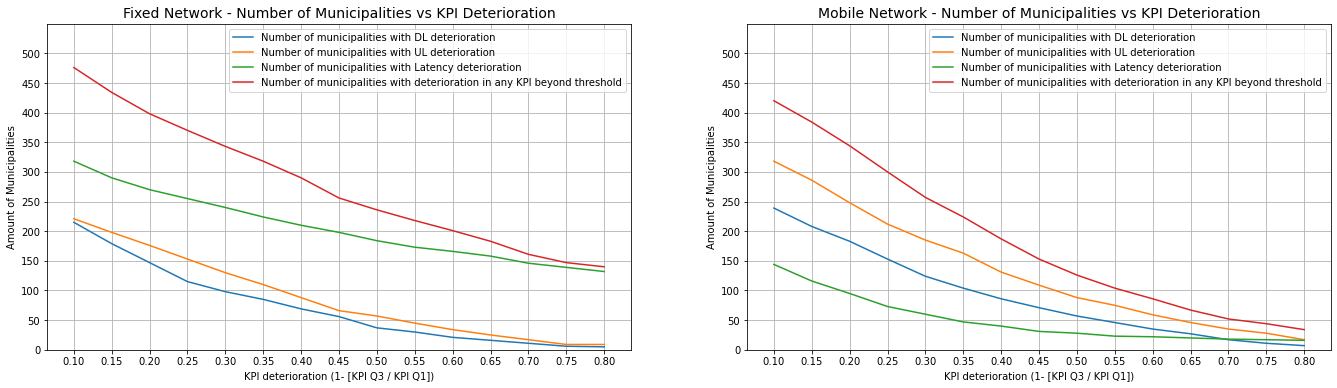

In [31]:
fig, ax1 = plt.subplots(1,2 , figsize=(23,6))

ax1[0].plot(deterioration_fixed['Deterioriation_Threshold'],deterioration_fixed['Municipalities with DL deterioration'], label= 'Number of municipalities with DL deterioration')
ax1[0].plot(deterioration_fixed['Deterioriation_Threshold'],deterioration_fixed['Municipalities with UL deterioration'], label= 'Number of municipalities with UL deterioration')
ax1[0].plot(deterioration_fixed['Deterioriation_Threshold'],deterioration_fixed['Municipalities with Latency deterioration'], label= 'Number of municipalities with Latency deterioration')
ax1[0].plot(deterioration_fixed['Deterioriation_Threshold'],deterioration_fixed['Municipalities with deterioration in any KPI beyond threshold'], label= 'Number of municipalities with deterioration in any KPI beyond threshold')
ax1[0].set_xticks(np.arange(0.1, 0.85, step=0.05))
ax1[0].set_yticks(np.arange(0, 550, step=50))
ax1[0].set_ylim(0, 550)
ax1[0].legend(loc='upper right')
ax1[0].grid()
ax1[0].set_xlabel('KPI deterioration (1- [KPI Q3 / KPI Q1])')
ax1[0].set_ylabel('Amount of Municipalities')
ax1[0].set_title("Fixed Network - Number of Municipalities vs KPI Deterioration", fontsize = 14)

ax1[1].plot(deterioration_mobile['Deterioriation_Threshold'],deterioration_mobile['Municipalities with DL deterioration'], label= 'Number of municipalities with DL deterioration')
ax1[1].plot(deterioration_mobile['Deterioriation_Threshold'],deterioration_mobile['Municipalities with UL deterioration'], label= 'Number of municipalities with UL deterioration')
ax1[1].plot(deterioration_mobile['Deterioriation_Threshold'],deterioration_mobile['Municipalities with Latency deterioration'], label= 'Number of municipalities with Latency deterioration')
ax1[1].plot(deterioration_mobile['Deterioriation_Threshold'],deterioration_mobile['Municipalities with deterioration in any KPI beyond threshold'], label= 'Number of municipalities with deterioration in any KPI beyond threshold')
ax1[1].set_xticks(np.arange(0.1 , 0.85, step=0.05))
ax1[1].set_yticks(np.arange(0, 550, step=50))
ax1[1].set_ylim(0, 550)
ax1[1].legend(loc='upper right')
ax1[1].grid()
ax1[1].set_xlabel('KPI deterioration (1- [KPI Q3 / KPI Q1])')
ax1[1].set_ylabel('Amount of Municipalities')
ax1[1].set_title("Mobile Network - Number of Municipalities vs KPI Deterioration", fontsize = 14)

#### Include a "Significant Deterioration" flag in the datasets

In [13]:
kpi_thr = 0.30
fixed_analysis_no_geo_thr['Significant_deterioration'] = np.where((fixed_analysis_no_geo_thr['%_dif_avg_d_q3_q1'] < -kpi_thr)|(fixed_analysis_no_geo_thr['%_dif_avg_u_q3_q1'] < -kpi_thr)|(fixed_analysis_no_geo_thr['%_dif_avg_lat_q3_q1'] > kpi_thr), #Identifies the case to apply to
                        1,      #This is the value that is inserted
                        0)

mobile_analysis_no_geo_thr['Significant_deterioration'] = np.where((mobile_analysis_no_geo_thr['%_dif_avg_d_q3_q1'] < -kpi_thr)|(mobile_analysis_no_geo_thr['%_dif_avg_u_q3_q1'] < -kpi_thr)|(mobile_analysis_no_geo_thr['%_dif_avg_lat_q3_q1'] > kpi_thr), #Identifies the case to apply to
                        1,      #This is the value that is inserted
                        0)

display(mobile_analysis_no_geo_thr.head(2))
display(fixed_analysis_no_geo_thr.head(2))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


DPTO_MPIO  MPIO_CCDGO MPIO_CNMBR  MPIO_NAREA DPTO_CNMBR  avg_d_kbps_q1  \
0    05_001           1   MEDELLÍN  374.830625  ANTIOQUIA   18925.263158   
4    05_030          30      AMAGÁ   84.132477  ANTIOQUIA    8352.047059   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0   11907.988506      41.853358    6996.414538    4042.425224       9.854608   
4    5657.623529      74.976471    4032.743498    3660.754297      37.262255   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0      8265        4446   22532.977340   11665.852601      40.929711   
4        85          21    5536.615385    1500.153846      79.717949   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7880.161894    4350.276010      11.957120    9091.0      4059.0   
4    2961.030666    2076.642921      28.961191      78.0        14.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   22247.250795   11106.472447      37.006362    7593.550656    3921.154562   
4    8383.700730    3606.313869      58.817518    4070.031484    3089.392642   

   std_lat_ms_q3  tests_q3  devices_q3  NUM_INTERNET_ACCESS  POPULATION  \
0      10.488321      9745        4371               631918     2533424   
4      15.645061       137          36                 3088       31283   

   FIX_INT_PENETRATION  NUM_INTERNET_ACCESS_Q3  POPULATION_Q3  \
0               0.2494                  654343        2533424   
4               0.0987                    2987          31283   

   FIX_INT_PENETRATION_Q3  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  \
0                  0.2583           631918  178167  440800         1  160   
4                  0.0955             3088      14       3         0    2   

   EMCALI  DIRECTV  EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  \
0       0     4777      23      943         0         0     190       3   
4       0        0    2890        0         0         0      32       3   

   FIX_TECH_FTTH  FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  \
0           5045          20288          553861            41338   
4             10             24             133             2788   

   FIX_TECH_FWA  AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  \
0         11386             32.684440             17.088139    0.01    0.03   
4           133             11.876404              3.932584    0.00    0.01   

   %_CABLE  %_FWA  %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  \
0     0.88   0.02      0.07     0.28     0.7         0.0    0.0       0.0   
4     0.04   0.04      0.90     0.00     0.0         0.0    0.0       0.0   

   %_DIRECTV  %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  \
0       0.01      0.00        0.0         0.0         0.0      0.00       0.0   
4       0.00      0.94        0.0         0.0         0.0      0.01       0.0   

   %_OTHERS  NBR_TECH_ACCESS_Q3  CLARO_Q3  TIGO_Q3  MOVISTAR_Q3  ETB_Q3  \
0      0.01              654343    182779   458218            1     149   
4      0.05                2987        20        3            0       2   

   EMCALI_Q3  DIRECTV_Q3  EDATEL_Q3  HV_MULT_Q3  TELEBMGA_Q3  METROTEL_Q3  \
0          0        4643         22        1015            0            0   
4          0           0       2827           0            0            0   

   HUGHES_Q3  AZTECA_Q3  FIX_TECH_FTTH_Q3  FIX_TECH_FTTX_Q3  \
0        220          3              5142             21039   
4         35          2                 6                23   

   FIX_TECH_CABLE_Q3  FIX_TECH_COPPER_Q3  FIX_TECH_FWA_Q3  \
0             580920               35561            11681   
4                 90                2730              138   

   AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  %_FTTH_Q3  %_FTTX_Q3  \
0                34.505297                17.296610       0.01       0.03   
4                11.919540                 4.448276       0.00       0.0

DPTO_MPIO  MPIO_CCDGO MPIO_CNMBR  MPIO_NAREA DPTO_CNMBR  avg_d_kbps_q1  \
0    05_001           1   MEDELLÍN  374.830625  ANTIOQUIA   27366.971500   
1    05_002           2  ABEJORRAL  507.134114  ANTIOQUIA    7466.516129   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0    6392.569013      23.226306    5755.474174    3046.553467      11.352968   
1    3816.580645     169.806452    8098.952792    9658.545953     307.429712   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0    163650       39609   31241.572078    6058.845494      22.732657   
1        31          20    6288.040816    5210.102041      45.551020   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7067.175954    2447.382468      13.781428  205979.0     40229.0   
1    5306.922499    7603.788536      95.712038      49.0        17.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   33464.136025    6810.795259      18.992538    8372.543638    3370.721331   
1    7177.055556    2026.402778     191.527778    5762.580425    3151.386521   

   std_lat_ms_q3  tests_q3  devices_q3  NUM_INTERNET_ACCESS  POPULATION  \
0       6.593583    180526       38905               631918     2533424   
1     273.174658        72          18                 1075       20287   

   FIX_INT_PENETRATION  NUM_INTERNET_ACCESS_Q3  POPULATION_Q3  \
0               0.2494                  654343        2533424   
1               0.0530                   16148          20287   

   FIX_INT_PENETRATION_Q3  NBR_TECH_ACCESS   CLARO    TIGO  MOVISTAR  ETB  \
0                  0.2583           631918  178167  440800         1  160   
1                  0.7960             1075       0       3         0    0   

   EMCALI  DIRECTV  EDATEL  HV_MULT  TELEBMGA  METROTEL  HUGHES  AZTECA  \
0       0     4777      23      943         0         0     190       3   
1       0        0    1034        0         0         0      26       7   

   FIX_TECH_FTTH  FIX_TECH_FTTX  FIX_TECH_CABLE  FIX_TECH_COPPER  \
0           5045          20288          553861            41338   
1              7              7               1              958   

   FIX_TECH_FWA  AVG_OFFER_DL_FIX_ACC  AVG_OFFER_UL_FIX_ACC  %_FTTH  %_FTTX  \
0         11386             32.684440             17.088139    0.01    0.03   
1           102             11.383333              5.066667    0.01    0.01   

   %_CABLE  %_FWA  %_COPPER  %_CLARO  %_TIGO  %_MOVISTAR  %_ETB  %_EMCALI  \
0     0.88   0.02      0.07     0.28     0.7         0.0    0.0       0.0   
1     0.00   0.09      0.89     0.00     0.0         0.0    0.0       0.0   

   %_DIRECTV  %_EDATEL  %_HV_MULT  %_TELEBMGA  %_METROTEL  %_HUGHES  %_AZTECA  \
0       0.01      0.00        0.0         0.0         0.0      0.00      0.00   
1       0.00      0.96        0.0         0.0         0.0      0.02      0.01   

   %_OTHERS  NBR_TECH_ACCESS_Q3  CLARO_Q3  TIGO_Q3  MOVISTAR_Q3  ETB_Q3  \
0      0.01              654343    182779   458218            1     149   
1      0.01               16148         0        3            0       0   

   EMCALI_Q3  DIRECTV_Q3  EDATEL_Q3  HV_MULT_Q3  TELEBMGA_Q3  METROTEL_Q3  \
0          0        4643         22        1015            0            0   
1          0           0       1102           0            0            0   

   HUGHES_Q3  AZTECA_Q3  FIX_TECH_FTTH_Q3  FIX_TECH_FTTX_Q3  \
0        220          3              5142             21039   
1         37          6                 7                 7   

   FIX_TECH_CABLE_Q3  FIX_TECH_COPPER_Q3  FIX_TECH_FWA_Q3  \
0             580920               35561            11681   
1                199                1029            14906   

   AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  %_FTTH_Q3  %_FTTX_Q3  \
0                34.505297                17.296610       0.01       0.03   
1                30.975309                26.333333       0.00       0.0

In [14]:
fixed_consolidated_geo_thr = fixed_consolidated_geo.merge(fixed_analysis_no_geo_thr[['DPTO_MPIO','Significant_deterioration']], how = 'inner', on = 'DPTO_MPIO')
print(fixed_consolidated_geo_thr.shape)
display(fixed_consolidated_geo_thr.head(1))

mobile_consolidated_geo_thr = mobile_consolidated_geo.merge(mobile_analysis_no_geo_thr[['DPTO_MPIO','Significant_deterioration']], how = 'inner', on = 'DPTO_MPIO')
print(mobile_consolidated_geo_thr.shape)
display(mobile_consolidated_geo_thr.head(1))

(902, 38)


DPTO_MPIO DPTO_CCDGO  MPIO_CCDGO MPIO_CNMBR MPIO_CRSLC  MPIO_NAREA  \
0    05_001         05           1   MEDELLÍN       1965  374.830625   

  MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  ORIG_FID  \
0      05001       2020  ANTIOQUIA    0.030607   1.032922        83   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...     27366.9715   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0    6392.569013      23.226306    5755.474174    3046.553467      11.352968   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0    163650       39609   31241.572078    6058.845494      22.732657   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7067.175954    2447.382468      13.781428  205979.0     40229.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   33464.136025    6810.795259      18.992538    8372.543638    3370.721331   

   std_lat_ms_q3  tests_q3  devices_q3  Significant_deterioration  
0       6.593583    180526       38905                          0

(667, 38)


DPTO_MPIO DPTO_CCDGO  MPIO_CCDGO MPIO_CNMBR MPIO_CRSLC  MPIO_NAREA  \
0    05_001         05           1   MEDELLÍN       1965  374.830625   

  MPIO_CCNCT  MPIO_NANO DPTO_CNMBR  SHAPE_AREA  SHAPE_LEN  ORIG_FID  \
0      05001       2020  ANTIOQUIA    0.030607   1.032922        83   

                                            geometry  avg_d_kbps_q1  \
0  POLYGON ((-75.66974 6.37360, -75.66965 6.37360...   18925.263158   

   avg_u_kbps_q1  avg_lat_ms_q1  std_d_kbps_q1  std_u_kbps_q1  std_lat_ms_q1  \
0   11907.988506      41.853358    6996.414538    4042.425224       9.854608   

   tests_q1  devices_q1  avg_d_kbps_q2  avg_u_kbps_q2  avg_lat_ms_q2  \
0      8265        4446    22532.97734   11665.852601      40.929711   

   std_d_kbps_q2  std_u_kbps_q2  std_lat_ms_q2  tests_q2  devices_q2  \
0    7880.161894     4350.27601       11.95712    9091.0      4059.0   

   avg_d_kbps_q3  avg_u_kbps_q3  avg_lat_ms_q3  std_d_kbps_q3  std_u_kbps_q3  \
0   22247.250795   11106.472447      37.006362    7593.550656    3921.154562   

   std_lat_ms_q3  tests_q3  devices_q3  Significant_deterioration  
0      10.488321      9745        4371                          0

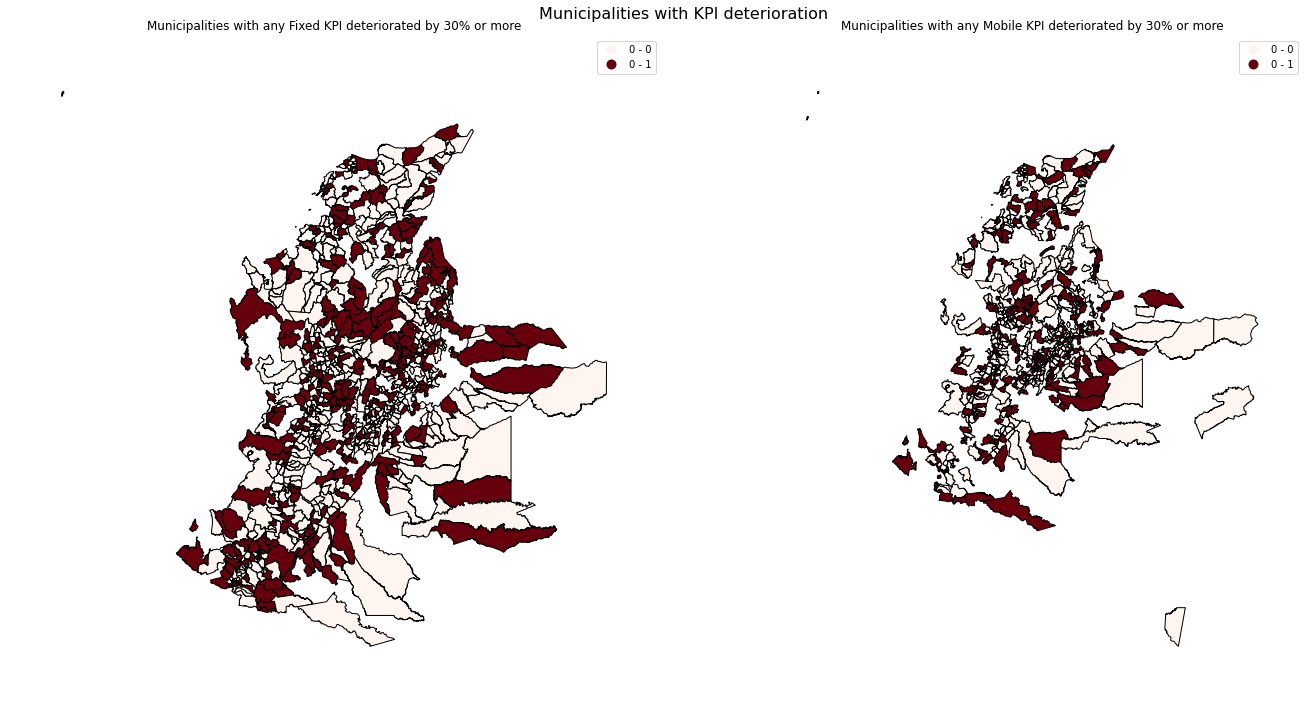

In [15]:
fig_dims = (20, 10)
fig, ax = plt.subplots(1,2, figsize=fig_dims)
df_plot1 = fixed_consolidated_geo_thr.copy()
df_plot2 = mobile_consolidated_geo_thr.copy()
variable1 = 'Significant_deterioration'
scheme_1 = mpclas.Quantiles(df_plot1[variable1], k=2)
scheme_2 = mpclas.Quantiles(df_plot2[variable1], k=2)

gpl.choropleth(df_plot1, cmap="Reds", hue=df_plot1[variable1], scheme=scheme_1, legend = True, ax = ax[0])
gpl.choropleth(df_plot2, cmap="Reds", hue=df_plot2[variable1], scheme=scheme_2, legend = True, ax = ax[1])


fig.suptitle("Municipalities with KPI deterioration", fontsize=16)
ax[0].set_title("Municipalities with any Fixed KPI deteriorated by 30% or more")
ax[1].set_title("Municipalities with any Mobile KPI deteriorated by 30% or more")

fig.tight_layout()
fig.subplots_adjust(top=0.94)

### 3.8 Select most relevant features, generate correlation matrices and pair plots

In [3]:
features_general = ['MPIO_CCDGO', 'POPULATION_Q3', 'POP_DENSITY', 'GDP_CAPITA',  '%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
features_vendor = ['%_CLARO_Q3', '%_TIGO_Q3', '%_MOVISTAR_Q3', '%_ETB_Q3', '%_EMCALI_Q3', '%_DIRECTV_Q3', '%_EDATEL_Q3', '%_HV_MULT_Q3', '%_HUGHES_Q3', '%_AZTECA_Q3', '%_OTHERS', '%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
features_tech = ['FIX_INT_PENETRATION_Q3', '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3', 'avg_d_kbps_q1', 'avg_u_kbps_q1', 'avg_lat_ms_q1','%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
features_tech_dif = ['dif_q3_q1_fix_access', 'dif_q3_q1_FTTH', 'dif_q3_q1_FTTX', 'dif_q3_q1_CABLE', 'dif_q3_q1_FWA', 'dif_q3_q1_COPPER','%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
print("Total count for municipalities with (1) and without (0) significant deterioration:", fixed_analysis_no_geo_thr['Significant_deterioration'].value_counts())
print("Average values per feature for municipalities with (1) and without (0) significant deterioration:")
display(fixed_analysis_no_geo_thr[features_general].pivot_table(index = 'Significant_deterioration', values=features_general, aggfunc='mean'))
display(fixed_analysis_no_geo_thr[features_vendor].pivot_table(index = 'Significant_deterioration', values=features_vendor, aggfunc='mean'))
display(fixed_analysis_no_geo_thr[features_tech].pivot_table(index = 'Significant_deterioration', values=features_tech, aggfunc='mean'))
display(fixed_analysis_no_geo_thr[features_tech_dif].pivot_table(index = 'Significant_deterioration', values=features_tech_dif, aggfunc='mean'))
#fixed_analysis_no_geo_thr[features_tech_dif].head()

Total count for municipalities with (1) and without (0) significant deterioration: 0    502
1    343
Name: Significant_deterioration, dtype: int64
Average values per feature for municipalities with (1) and without (0) significant deterioration:


%_dif_avg_d_q3_q1  %_dif_avg_lat_q3_q1  \
Significant_deterioration                                           
0                                   0.512793            -0.223378   
1                                   0.155279             0.997317   

                           %_dif_avg_u_q3_q1  GDP_CAPITA  MPIO_CCDGO  \
Significant_deterioration                                              
0                                   1.054754    0.016568  405.438247   
1                                   0.184061    0.012487  456.180758   

                           POPULATION_Q3  POP_DENSITY  
Significant_deterioration                              
0                           80632.517928   314.318080  
1                           20162.169096    63.510407

%_AZTECA_Q3  %_CLARO_Q3  %_DIRECTV_Q3  %_EDATEL_Q3  \
Significant_deterioration                                                       
0                             0.150637    0.094701      0.063008     0.112769   
1                             0.219621    0.036122      0.063936     0.128805   

                           %_EMCALI_Q3  %_ETB_Q3  %_HUGHES_Q3  %_HV_MULT_Q3  \
Significant_deterioration                                                     
0                             0.002331  0.010339     0.089382      0.007131   
1                             0.000000  0.001749     0.151603      0.001137   

                           %_MOVISTAR_Q3  %_OTHERS  %_TIGO_Q3  \
Significant_deterioration                                       
0                               0.115618  0.289960   0.058526   
1                               0.049242  0.340875   0.006618   

                           %_dif_avg_d_q3_q1  %_dif_avg_lat_q3_q1  \
Significant_deterioration                                           
0                                   0.512793            -0.223378   
1                                   0.155279             0.997317   

                           %_dif_avg_u_q3_q1  
Significant_deterioration                     
0                                   1.054754  
1                                   0.184061

%_CABLE_Q3  %_COPPER_Q3  %_FTTH_Q3  %_FTTX_Q3  \
Significant_deterioration                                                  
0                            0.176514     0.234442   0.214641   0.014542   
1                            0.081254     0.185860   0.270350   0.009038   

                           %_FWA_Q3  %_dif_avg_d_q3_q1  %_dif_avg_lat_q3_q1  \
Significant_deterioration                                                     
0                          0.359024           0.512793            -0.223378   
1                          0.453353           0.155279             0.997317   

                           %_dif_avg_u_q3_q1  FIX_INT_PENETRATION_Q3  \
Significant_deterioration                                              
0                                   1.054754                0.065044   
1                                   0.184061                0.029695   

                           avg_d_kbps_q1  avg_lat_ms_q1  avg_u_kbps_q1  
Significant_deterioration                                               
0                            9038.136520      84.443515    4541.256884  
1                            7421.432253      80.398505    5330.979069

%_dif_avg_d_q3_q1  %_dif_avg_lat_q3_q1  \
Significant_deterioration                                           
0                                   0.512793            -0.223378   
1                                   0.155279             0.997317   

                           %_dif_avg_u_q3_q1  dif_q3_q1_CABLE  \
Significant_deterioration                                       
0                                   1.054754       413.932271   
1                                   0.184061        15.177843   

                           dif_q3_q1_COPPER  dif_q3_q1_FTTH  dif_q3_q1_FTTX  \
Significant_deterioration                                                     
0                                 333.49004      165.067729       26.380478   
1                                   7.12828       10.075802       -3.822157   

                           dif_q3_q1_FWA  dif_q3_q1_fix_access  
Significant_deterioration                                       
0                              29.239044            968.109562  
1                              66.728863             95.288630

[]

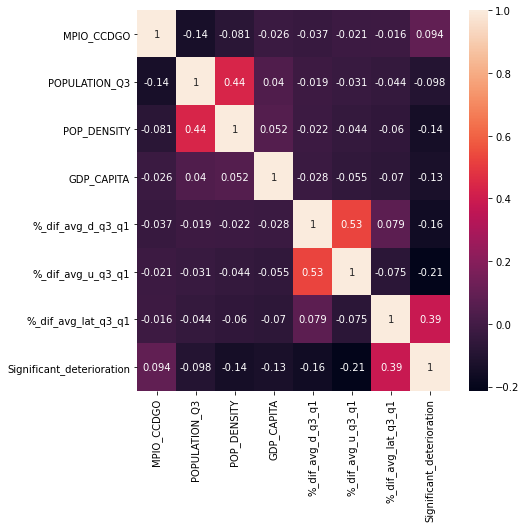

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(fixed_analysis_no_geo_thr[features_general].corr(),annot=True)
plt.plot()

[]

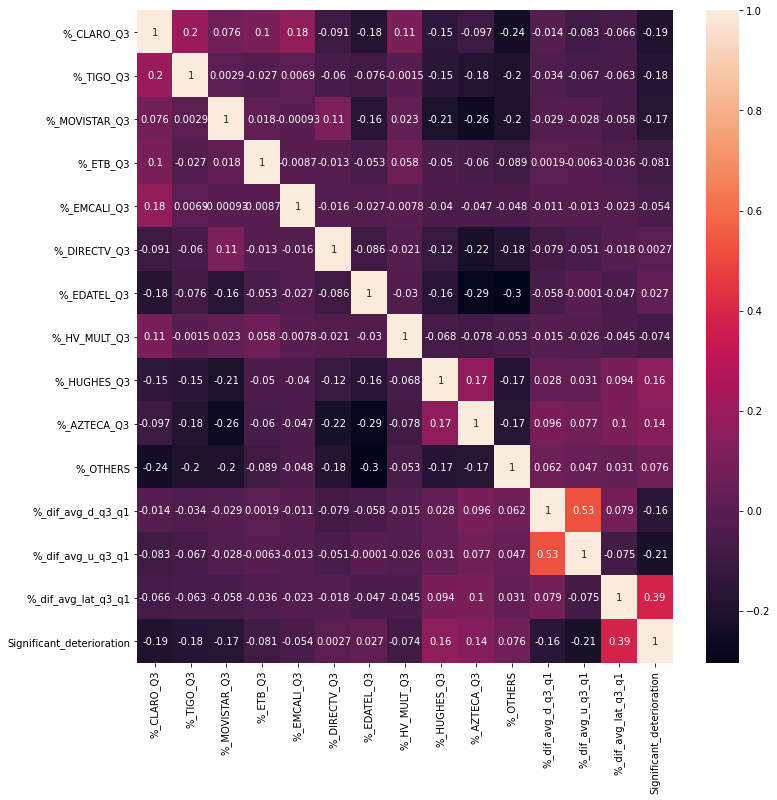

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(fixed_analysis_no_geo_thr[features_vendor].corr(),annot=True)
plt.plot()

[]

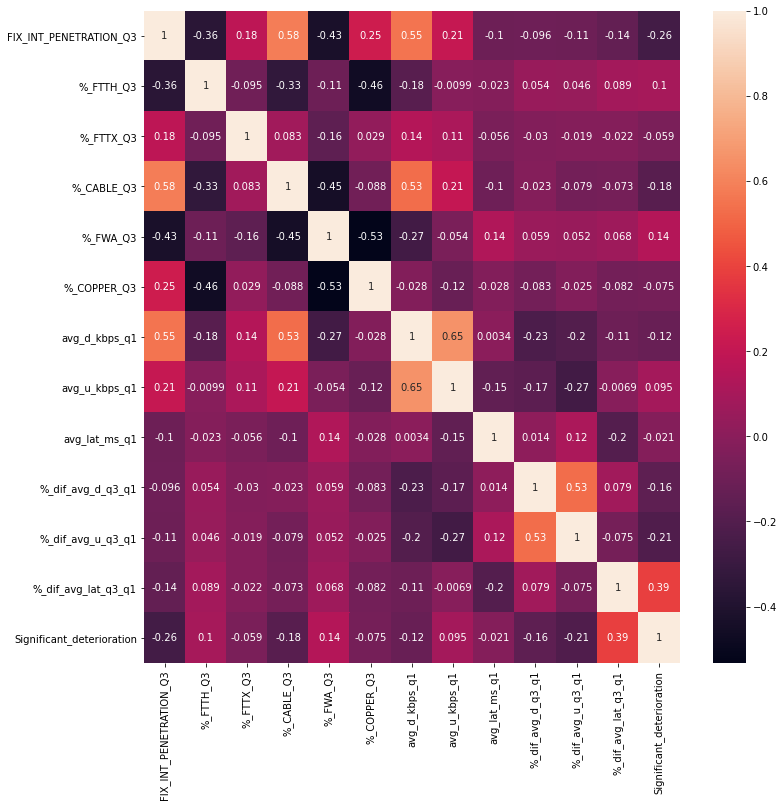

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(fixed_analysis_no_geo_thr[features_tech].corr(),annot=True)
plt.plot()

[]

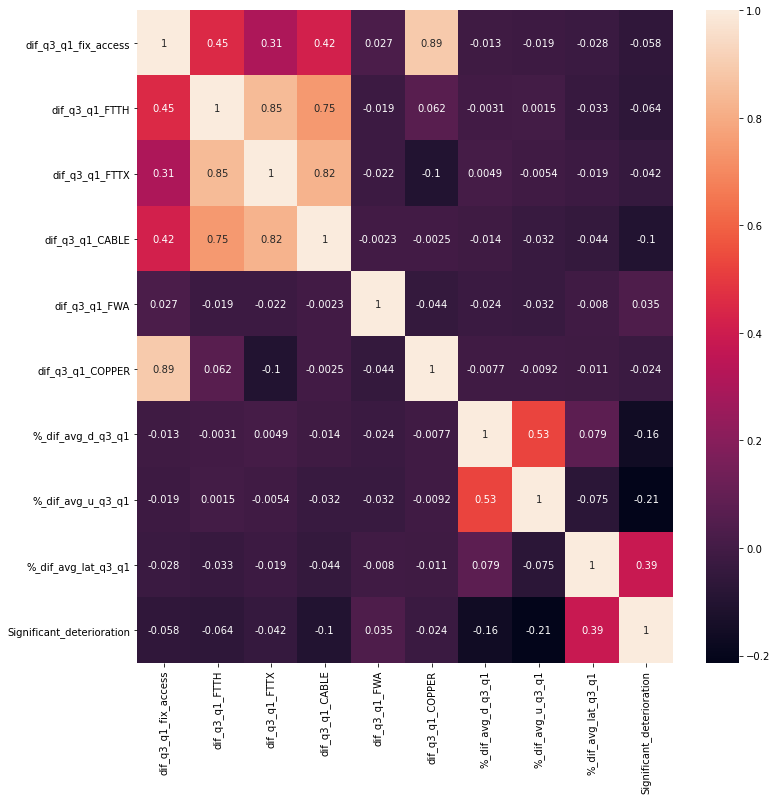

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(fixed_analysis_no_geo_thr[features_tech_dif].corr(),annot=True)
plt.plot()

[]

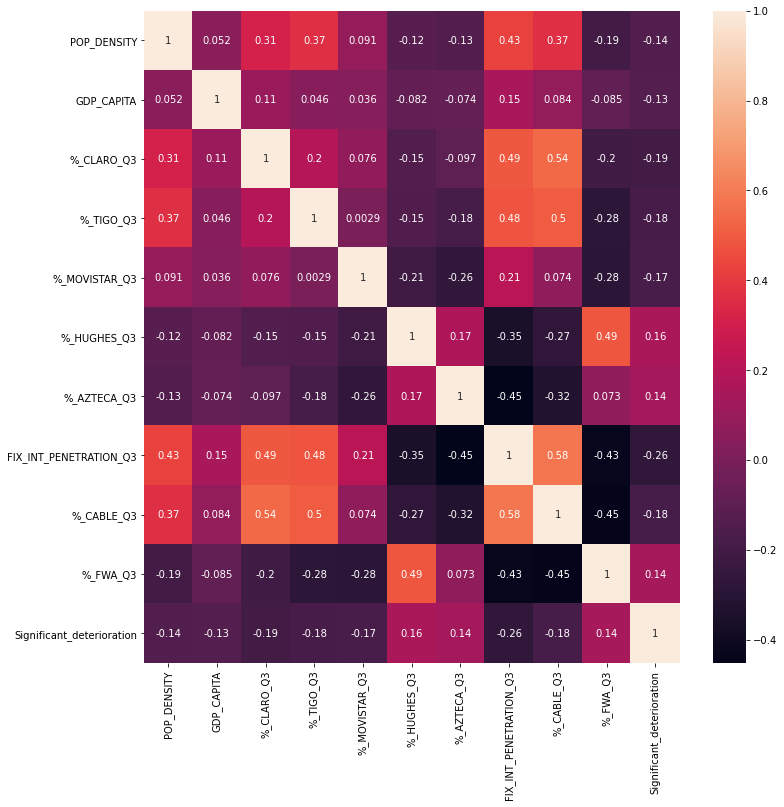

In [38]:
# Plot correlation matriz with most relevant features:
features_sum_fixed = ['POP_DENSITY', 'GDP_CAPITA', '%_CLARO_Q3' , '%_TIGO_Q3', '%_MOVISTAR_Q3' , '%_HUGHES_Q3', '%_AZTECA_Q3','FIX_INT_PENETRATION_Q3', '%_CABLE_Q3', '%_FWA_Q3', 'Significant_deterioration']
plt.figure(figsize=(12,12))
sns.heatmap(fixed_analysis_no_geo_thr[features_sum_fixed].corr(),annot=True)
plt.plot()

In [ ]:
features_general_vendor1 = ['MPIO_CCDGO', 'POP_DENSITY', 'GDP_CAPITA', '%_CLARO_Q3', '%_TIGO_Q3', '%_MOVISTAR_Q3', '%_ETB_Q3', 'Significant_deterioration']
features_general_vendor2 = ['MPIO_CCDGO', 'POP_DENSITY', 'GDP_CAPITA', '%_EMCALI_Q3', '%_DIRECTV_Q3','%_EDATEL_Q3', '%_HV_MULT_Q3', 'Significant_deterioration']
features_general_vendor3 = ['MPIO_CCDGO', 'POP_DENSITY', 'GDP_CAPITA', '%_HUGHES_Q3', '%_AZTECA_Q3', '%_OTHERS','Significant_deterioration']
sns.pairplot(fixed_analysis_no_geo_thr[features_general_vendor1], hue = 'Significant_deterioration')

In [ ]:
sns.pairplot(fixed_analysis_no_geo_thr[features_general_vendor2], hue = 'Significant_deterioration')

In [ ]:
sns.pairplot(fixed_analysis_no_geo_thr[features_general_vendor3], hue = 'Significant_deterioration')

In [ ]:
features_tech_vendor1 = ['FIX_INT_PENETRATION_Q3', '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3','%_CLARO_Q3', '%_TIGO_Q3', '%_MOVISTAR_Q3', '%_ETB_Q3', 'Significant_deterioration']
features_tech_vendor2 = ['FIX_INT_PENETRATION_Q3', '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3', '%_EDATEL_Q3', '%_HV_MULT_Q3', 'Significant_deterioration']
features_tech_vendor3 = ['FIX_INT_PENETRATION_Q3', '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3', '%_HUGHES_Q3', '%_AZTECA_Q3', '%_OTHERS','Significant_deterioration']
sns.pairplot(fixed_analysis_no_geo_thr[features_tech_vendor1], hue = 'Significant_deterioration')

In [ ]:
sns.pairplot(fixed_analysis_no_geo_thr[features_tech_vendor2], hue = 'Significant_deterioration')

In [ ]:
sns.pairplot(fixed_analysis_no_geo_thr[features_tech_vendor3], hue = 'Significant_deterioration')

In [ ]:
features_general_tech = ['POP_DENSITY', 'GDP_CAPITA', 'FIX_INT_PENETRATION_Q3',  '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3', 'Significant_deterioration']
sns.pairplot(fixed_analysis_no_geo_thr[features_general_tech], hue = 'Significant_deterioration')

In [ ]:
features_tech_dif = ['dif_q3_q1_fix_access', 'dif_q3_q1_FTTH', 'dif_q3_q1_FTTX', 'dif_q3_q1_CABLE', 'dif_q3_q1_FWA', 'dif_q3_q1_COPPER', 'Significant_deterioration']
sns.pairplot(fixed_analysis_no_geo_thr[features_tech_dif], hue = 'Significant_deterioration')

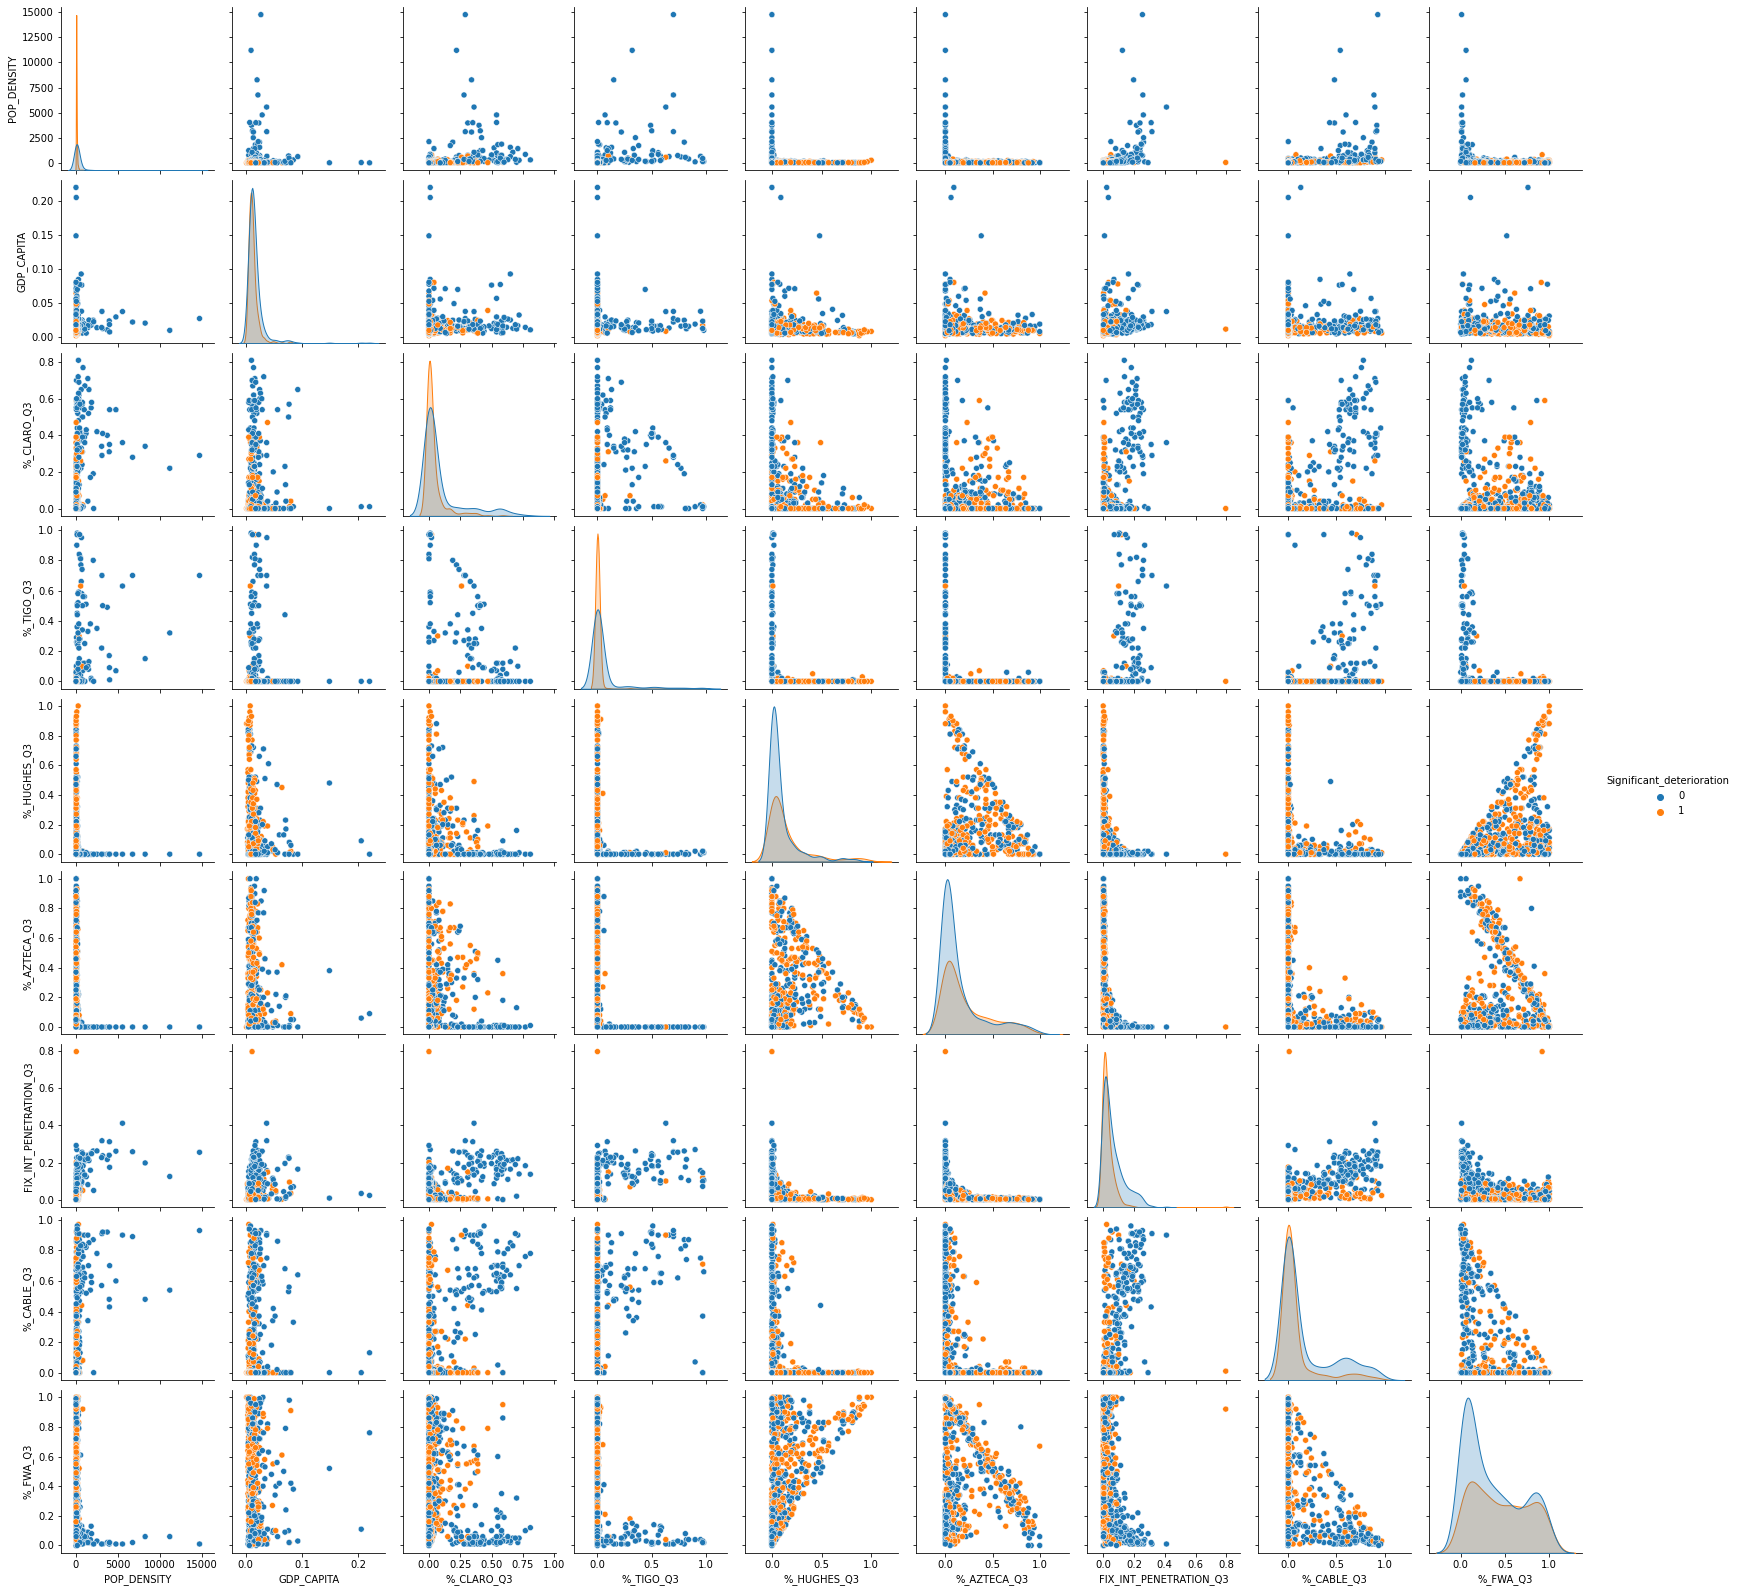

In [39]:
features_sum_fixed = ['POP_DENSITY', 'GDP_CAPITA', '%_CLARO_Q3' , '%_TIGO_Q3', '%_HUGHES_Q3', '%_AZTECA_Q3','FIX_INT_PENETRATION_Q3', '%_CABLE_Q3', '%_FWA_Q3', 'Significant_deterioration']
sns.pairplot(fixed_analysis_no_geo_thr[features_sum_fixed], hue = 'Significant_deterioration')

In [4]:
features_general_mob = ['MPIO_CCDGO', 'POPULATION_Q3', 'POP_DENSITY', 'GDP_CAPITA',  '%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
features_vendor_mob = ['%_M_CLARO_Q3', '%_M_TIGO_Q3', '%_M_MOVISTAR_Q3', '%_M_ETB_Q3', '%_M_AVANTEL_Q3', '%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
features_tech_mob = ['%_LTE_Q3','FIX_INT_PENETRATION_Q3', '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3', 'avg_d_kbps_q1', 'avg_u_kbps_q1', 'avg_lat_ms_q1','%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
features_tech_mob_dif = ['dif_q3_q1_%_LTE','dif_q3_q1_COBERTURA LTE', 'dif_q3_q1_COBERTURA 3G', 'dif_q3_q1_COBERTURA 2G','%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'Significant_deterioration']
print("Total count for municipalities with (1) and without (0) significant deterioration: \n", mobile_analysis_no_geo_thr['Significant_deterioration'].value_counts())
print("Average values per feature for municipalities with (1) and without (0) significant deterioration:")
display(mobile_analysis_no_geo_thr[features_general_mob].pivot_table(index = 'Significant_deterioration', values=features_general_mob, aggfunc='mean'))
display(mobile_analysis_no_geo_thr[features_vendor_mob].pivot_table(index = 'Significant_deterioration', values=features_vendor_mob, aggfunc='mean'))
display(mobile_analysis_no_geo_thr[features_tech_mob].pivot_table(index = 'Significant_deterioration', values=features_tech_mob, aggfunc='mean'))
display(mobile_analysis_no_geo_thr[features_tech_mob_dif].pivot_table(index = 'Significant_deterioration', values=features_tech_mob_dif, aggfunc='mean'))

Total count for municipalities with (1) and without (0) significant deterioration: 
 0    351
1    257
Name: Significant_deterioration, dtype: int64
Average values per feature for municipalities with (1) and without (0) significant deterioration:


%_dif_avg_d_q3_q1  %_dif_avg_lat_q3_q1  \
Significant_deterioration                                           
0                                   0.736764            -0.150495   
1                                  -0.105800             0.090942   

                           %_dif_avg_u_q3_q1  GDP_CAPITA  MPIO_CCDGO  \
Significant_deterioration                                              
0                                   0.801931    0.018081  416.398860   
1                                  -0.198194    0.015312  429.136187   

                           POPULATION_Q3  POP_DENSITY  
Significant_deterioration                              
0                          102281.760684    396.68599  
1                           28310.260700    110.20931

%_M_AVANTEL_Q3  %_M_CLARO_Q3  %_M_ETB_Q3  \
Significant_deterioration                                             
0                                0.052764      0.545556    0.065698   
1                                0.039572      0.547626    0.047549   

                           %_M_MOVISTAR_Q3  %_M_TIGO_Q3  %_dif_avg_d_q3_q1  \
Significant_deterioration                                                    
0                                 0.250627     0.160741           0.736764   
1                                 0.270467     0.156187          -0.105800   

                           %_dif_avg_lat_q3_q1  %_dif_avg_u_q3_q1  
Significant_deterioration                                          
0                                    -0.150495           0.801931  
1                                     0.090942          -0.198194

%_CABLE_Q3  %_COPPER_Q3  %_FTTH_Q3  %_FTTX_Q3  \
Significant_deterioration                                                  
0                            0.224416     0.239943   0.187635   0.016439   
1                            0.102646     0.212023   0.248638   0.010700   

                           %_FWA_Q3  %_LTE_Q3  %_dif_avg_d_q3_q1  \
Significant_deterioration                                          
0                          0.331111  0.643875           0.736764   
1                          0.425409  0.577237          -0.105800   

                           %_dif_avg_lat_q3_q1  %_dif_avg_u_q3_q1  \
Significant_deterioration                                           
0                                    -0.150495           0.801931   
1                                     0.090942          -0.198194   

                           FIX_INT_PENETRATION_Q3  avg_d_kbps_q1  \
Significant_deterioration                                          
0                                        0.075502   12823.665681   
1                                        0.040665   17090.789141   

                           avg_lat_ms_q1  avg_u_kbps_q1  
Significant_deterioration                                
0                              65.823842    6880.569799  
1                              60.064945    9085.908768

%_dif_avg_d_q3_q1  %_dif_avg_lat_q3_q1  \
Significant_deterioration                                           
0                                   0.736764            -0.150495   
1                                  -0.105800             0.090942   

                           %_dif_avg_u_q3_q1  dif_q3_q1_%_LTE  \
Significant_deterioration                                       
0                                   0.801931         -0.01735   
1                                  -0.198194         -0.02000   

                           dif_q3_q1_COBERTURA 2G  dif_q3_q1_COBERTURA 3G  \
Significant_deterioration                                                   
0                                        0.706553                0.586895   
1                                        0.525292                0.435798   

                           dif_q3_q1_COBERTURA LTE  
Significant_deterioration                           
0                                         0.381766  
1                                         0.221790

[]

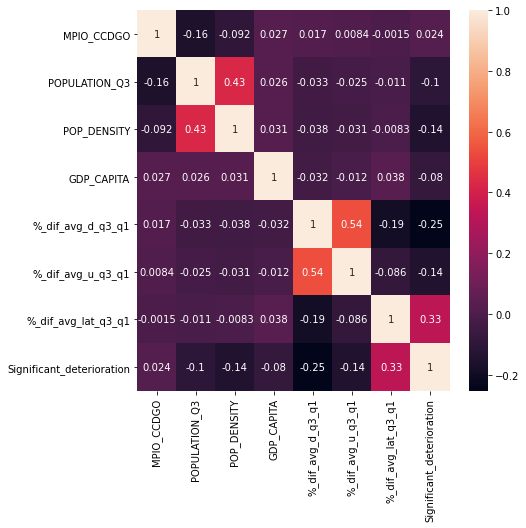

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(mobile_analysis_no_geo_thr[features_general_mob].corr(),annot=True)
plt.plot()

[]

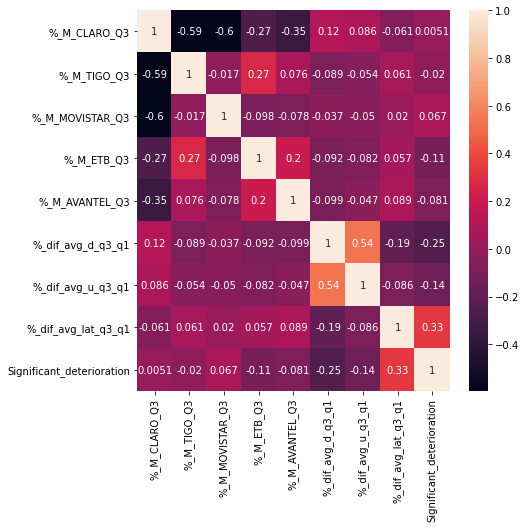

In [42]:
plt.figure(figsize=(7,7))
sns.heatmap(mobile_analysis_no_geo_thr[features_vendor_mob].corr(),annot=True)
plt.plot()

[]

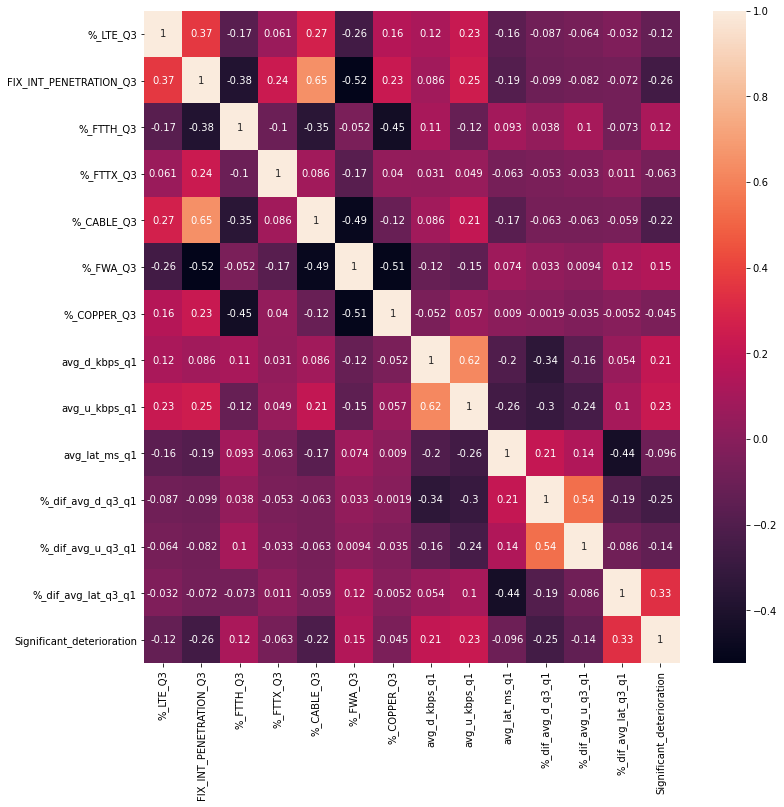

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(mobile_analysis_no_geo_thr[features_tech_mob].corr(),annot=True)
plt.plot()

[]

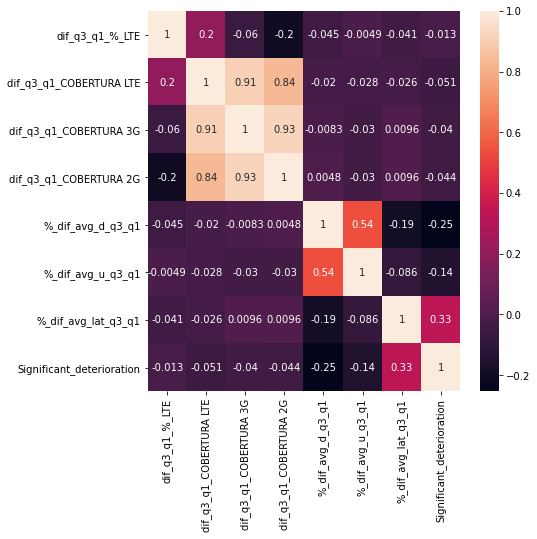

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(mobile_analysis_no_geo_thr[features_tech_mob_dif].corr(),annot=True)
plt.plot()

[]

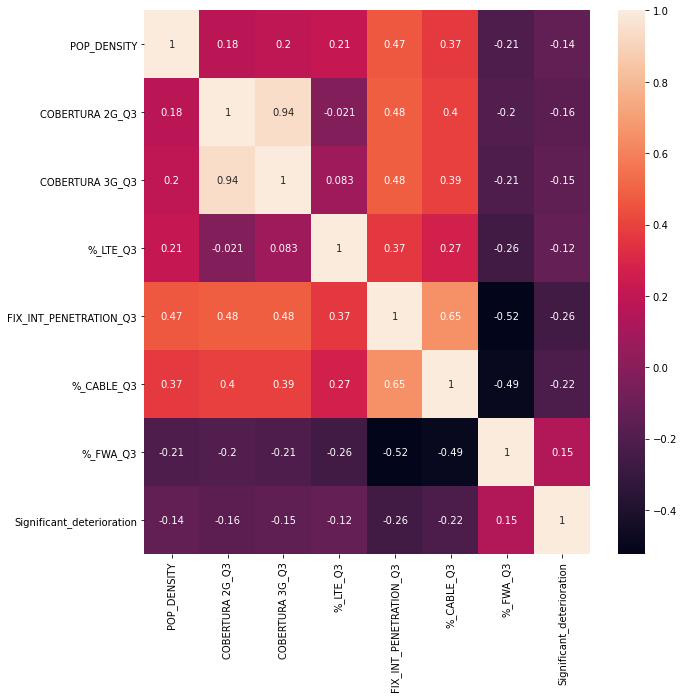

In [45]:
features_sum_mob = ['POP_DENSITY', 'COBERTURA 2G_Q3', 'COBERTURA 3G_Q3', '%_LTE_Q3','FIX_INT_PENETRATION_Q3', '%_CABLE_Q3', '%_FWA_Q3','Significant_deterioration' ]
plt.figure(figsize=(10,10))
sns.heatmap(mobile_analysis_no_geo_thr[features_sum_mob].corr(),annot=True)
plt.plot()

In [ ]:
features_general_vendor = ['MPIO_CCDGO', 'POP_DENSITY', 'GDP_CAPITA', '%_M_CLARO_Q3', '%_M_TIGO_Q3', '%_M_MOVISTAR_Q3', '%_M_ETB_Q3', '%_M_AVANTEL','Significant_deterioration']
sns.pairplot(mobile_analysis_no_geo_thr[features_general_vendor], hue = 'Significant_deterioration')

In [ ]:
features_tech_vendor_mob = ['%_LTE_Q3','FIX_INT_PENETRATION_Q3', '%_M_CLARO_Q3', '%_M_TIGO_Q3', '%_M_MOVISTAR_Q3', '%_M_ETB_Q3', '%_M_AVANTEL_Q3','Significant_deterioration']
sns.pairplot(mobile_analysis_no_geo_thr[features_tech_vendor_mob], hue = 'Significant_deterioration')

In [ ]:
features_general_tech_mob = ['MPIO_CCDGO', 'POP_DENSITY', 'GDP_CAPITA', 'FIX_INT_PENETRATION_Q3', '%_LTE_Q3', 'Significant_deterioration']
sns.pairplot(mobile_analysis_no_geo_thr[features_general_tech_mob], hue = 'Significant_deterioration')


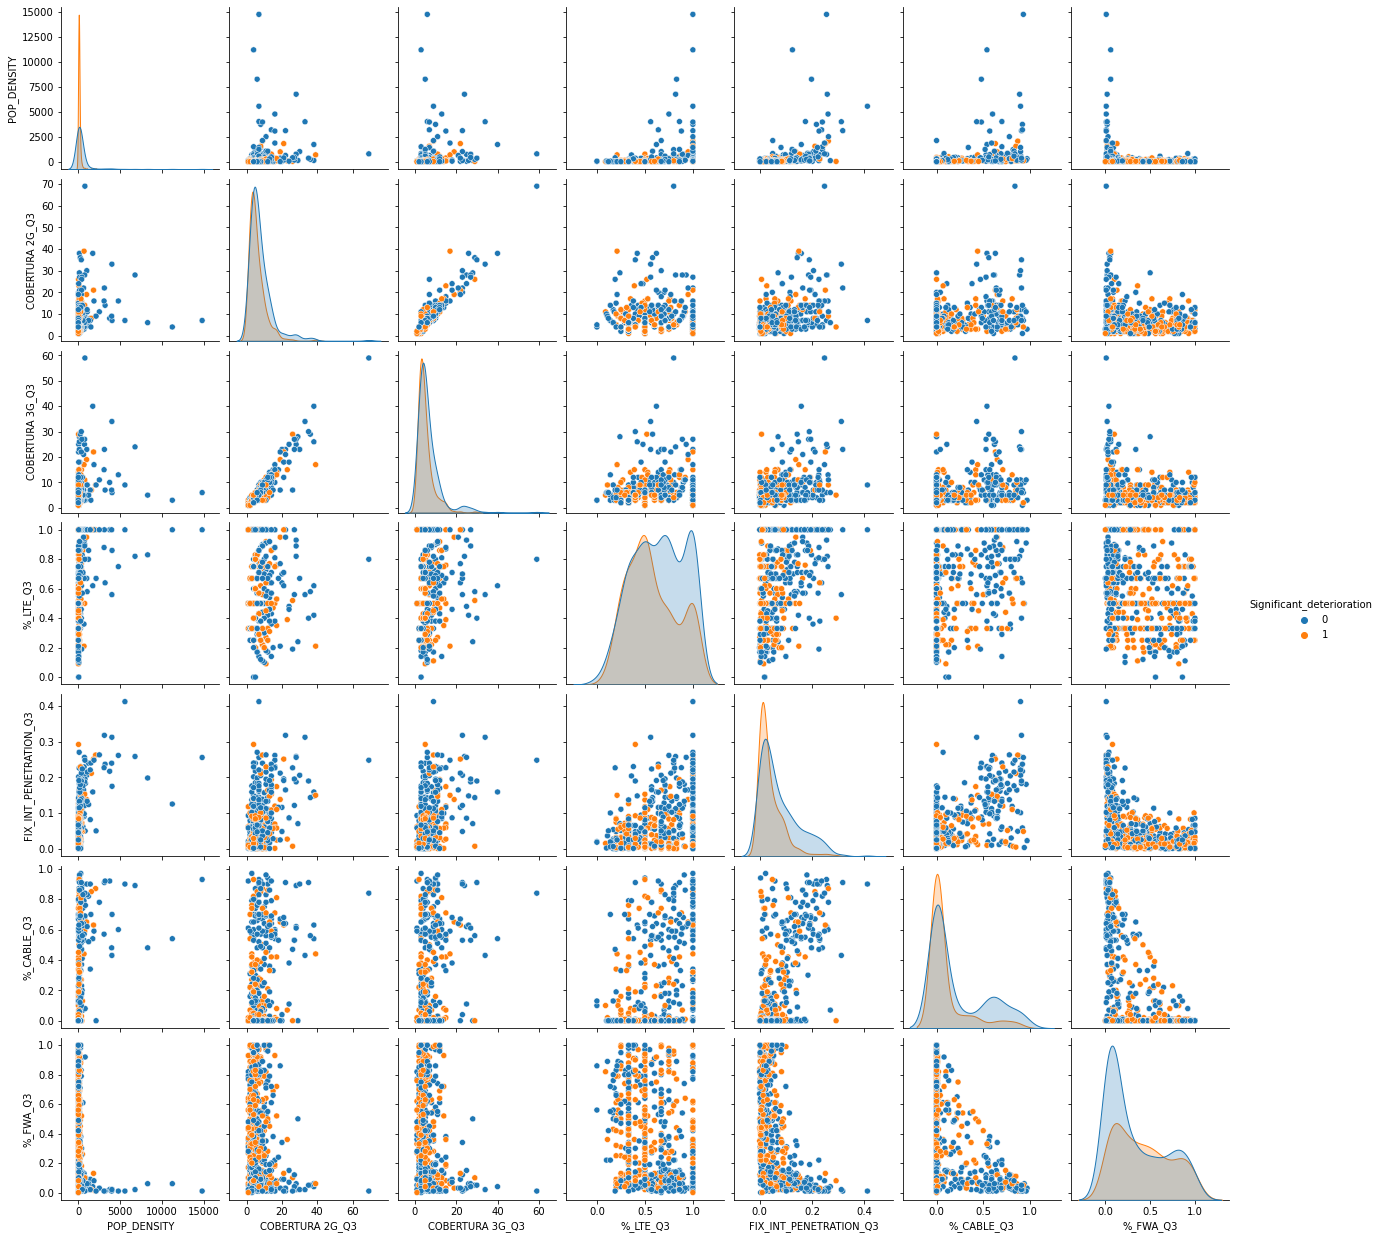

In [46]:
sns.pairplot(mobile_analysis_no_geo_thr[features_sum_mob], hue = 'Significant_deterioration')

## 4 Clustering and Classification Algorithms

### 4.1 Preprocessing Scaling

#### Fixed Data

In [108]:
fixed_class = fixed_analysis_no_geo_thr[['avg_d_kbps_q1',
            'avg_u_kbps_q1',
            'avg_lat_ms_q1',
            'POPULATION',
            'NBR_TECH_ACCESS_Q3',
            'AVG_OFFER_DL_FIX_ACC_Q3',
            'AVG_OFFER_UL_FIX_ACC_Q3',
            'dif_q3_q1_fix_access', 
            'dif_q3_q1_FTTH', 
            'dif_q3_q1_FTTX', 
            'dif_q3_q1_CABLE', 
            'dif_q3_q1_FWA', 
            'dif_q3_q1_COPPER',
            'POP_DENSITY',
            'GDP_CAPITA']].reset_index().drop('index', axis = 1)
print("Fixed Classification DataFrame created Shape:", fixed_class.shape)
fixed_class.describe()

Fixed Classification DataFrame created Shape: (845, 15)


avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1    POPULATION  \
count     845.000000     845.000000     845.000000  8.450000e+02   
mean     8381.888516    4861.818670      82.801576  5.608657e+04   
std      6443.455834    4090.950106      94.181941  3.044356e+05   
min       337.500000     324.000000       7.139535  1.407000e+03   
25%      4533.231544    2259.688822      40.734266  8.394000e+03   
50%      6127.413559    3780.954116      56.461111  1.647400e+04   
75%      9959.300469    5762.797590      85.652174  3.393100e+04   
max     52649.503268   28187.961538     992.142857  7.743955e+06   

       NBR_TECH_ACCESS_Q3  AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  \
count        8.450000e+02               845.000000               845.000000   
mean         9.029157e+03                17.047878                11.892549   
std          7.894297e+04                 8.522229                 8.920147   
min          3.000000e+00                 1.666667                 1.096774   
25%          5.900000e+01                11.055556                 6.043478   
50%          3.500000e+02                15.062500                 9.878788   
75%          1.642000e+03                20.833333                15.227273   
max          2.023726e+06                66.299065                62.084112   

       dif_q3_q1_fix_access  dif_q3_q1_FTTH  dif_q3_q1_FTTX  dif_q3_q1_CABLE  \
count            845.000000      845.000000      845.000000       845.000000   
mean             613.816568      102.153846       14.120710       252.071006   
std             7380.163286     1183.887420      355.659823      1952.064770   
min            -2517.000000    -1853.000000     -721.000000     -1975.000000   
25%                2.000000       -1.000000        0.000000         0.000000   
50%               20.000000        0.000000        0.000000         0.000000   
75%              113.000000        2.000000        0.000000         0.000000   
max           200349.000000    30710.000000     9852.000000     45239.000000   

       dif_q3_q1_FWA  dif_q3_q1_COPPER   POP_DENSITY  GDP_CAPITA  
count     845.000000        845.000000    845.000000  845.000000  
mean       44.456805        201.014201    212.510942    0.014911  
std       522.018391       6593.373543    861.503704    0.015413  
min     -1428.000000     -18193.000000      0.517412    0.001616  
25%         1.000000          0.000000     26.335599    0.008379  
50%         8.000000          0.000000     54.735995    0.011624  
75%        33.000000          0.000000    115.798341    0.015794  
max     14804.000000     190479.000000  14758.298417    0.219791

In [109]:
fixed_class_scale = pd.DataFrame()
#original_columns = fixed_class.columns
for column in fixed_class:
    log_column = str('log_')+str(column)
    if fixed_class[column].min()>0:
        fixed_class_scale[log_column] = np.log1p(fixed_class[column])
    else:
        fixed_class_scale[log_column] = np.log1p(fixed_class[column] - fixed_class[column].min())
fixed_class_scale = fixed_class_scale.join(fixed_analysis_no_geo_thr[['%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'FIX_INT_PENETRATION', '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3', '%_CLARO_Q3', '%_TIGO_Q3', '%_MOVISTAR_Q3', '%_ETB_Q3', '%_EMCALI_Q3', '%_DIRECTV_Q3', '%_EDATEL_Q3', '%_HV_MULT_Q3', '%_HUGHES_Q3', '%_AZTECA_Q3', '%_OTHERS_Q3']].reset_index().drop("index", axis = 1))
fixed_class_scale.describe()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  \
count         845.000000         845.000000         845.000000   
mean            8.813378           8.209745           4.145828   
std             0.646642           0.750880           0.669335   
min             5.824524           5.783825           2.096733   
25%             8.419411           7.723425           3.731323   
50%             8.720691           8.237996           4.051108   
75%             9.206363           8.659352           4.461902   
max            10.871431          10.246686           6.900875   

       log_POPULATION  log_NBR_TECH_ACCESS_Q3  log_AVG_OFFER_DL_FIX_ACC_Q3  \
count      845.000000              845.000000                   845.000000   
mean         9.825226                6.024142                     2.799104   
std          1.162185                2.230793                     0.426491   
min          7.249926                1.386294                     0.980829   
25%          9.035392                4.094345                     2.489526   
50%          9.709599                5.860786                     2.776487   
75%         10.432114                7.404279                     3.083438   
max         15.862423               14.520451                     4.209146   

       log_AVG_OFFER_UL_FIX_ACC_Q3  log_dif_q3_q1_fix_access  \
count                   845.000000                845.000000   
mean                      2.345360                  7.902652   
std                       0.665181                  0.403399   
min                       0.740400                  0.000000   
25%                       1.952102                  7.832014   
50%                       2.386815                  7.839132   
75%                       2.786693                  7.875119   
max                       4.144469                 12.220306   

       log_dif_q3_q1_FTTH  log_dif_q3_q1_FTTX  log_dif_q3_q1_CABLE  \
count          845.000000          845.000000           845.000000   
mean             7.542001            6.575681             7.637432   
std              0.309536            0.267375             0.375654   
min              0.000000            0.000000             0.000000   
25%              7.524561            6.582025             7.588830   
50%              7.525101            6.582025             7.588830   
75%              7.526179            6.582025             7.588830   
max             10.390963            9.266153            10.762467   

       log_dif_q3_q1_FWA  log_dif_q3_q1_COPPER  log_POP_DENSITY  \
count         845.000000            845.000000       845.000000   
mean            7.276350              9.799767         4.128595   
std             0.273087              0.348392         1.273773   
min             0.000000              0.000000         0.417006   
25%             7.265430              9.808847         3.308190   
50%             7.270313              9.808847         4.020626   
75%             7.287561              9.808847         4.760449   
max             9.694801             12.248524         9.599629   

       log_GDP_CAPITA  %_dif_avg_d_q3_q1  %_dif_avg_u_q3_q1  \
count      845.000000         845.000000         845.000000   
mean         0.014694           0.367672           0.701325   
std          0.014466           1.094549           2.003268   
min          0.001615          -0.866442          -0.969752   
25%          0.008344          -0.101273          -0.109373   
50%          0.011557           0.140449           0.176391   
75%          0.015670           0.444130           0.736514   
max          0.198680          15.730700          23.164957   

       %_dif_avg_lat_q3_q1  FIX_INT_PENETRATION   %_FTTH_Q3   %_FTTX_Q3  \
count           845.000000           845.000000  845.000000  845.000000   
mean              0.272123             0.046290    0.237254    0.012308   
std               1.548742             0.057231    0.271834    0.046096   
min              -0.959953   

In [110]:
#scaler = preprocessing.StandardScaler().fit(fixed_class_scale)
#scaler = preprocessing.QuantileTransformer().fit(fixed_class_scale)
scaler = preprocessing.MinMaxScaler().fit(fixed_class_scale)
fixed_class_scale = pd.DataFrame(data = scaler.transform(fixed_class_scale))
fixed_class_scale = fixed_class_scale.rename(columns={
                            0 : 'log_avg_d_kbps_q1',
                            1 : 'log_avg_u_kbps_q1',
                            2 : 'log_avg_lat_ms_q1',
                            3 : 'log_POPULATION',
                            4 : 'log_NBR_TECH_ACCESS_Q3',
                            5 : 'log_AVG_OFFER_DL_FIX_ACC_Q3',
                            6 : 'log_AVG_OFFER_UL_FIX_ACC_Q3',
                            7 : 'log_dif_q3_q1_fix_access',
                            8 : 'log_dif_q3_q1_FTTH',
                            9 : 'log_dif_q3_q1_FTTX',
                            10 : 'log_dif_q3_q1_CABLE',
                            11 : 'log_dif_q3_q1_FWA',
                            12 : 'log_dif_q3_q1_COPPER',
                            13 : 'log_POP_DENSITY',
                            14 : 'log_GDP_CAPITA',
                            15 : '%_dif_avg_d_q3_q1',
                            16 : '%_dif_avg_u_q3_q1',
                            17 : '%_dif_avg_lat_q3_q1',
                            18 : 'FIX_INT_PENETRATION',
                            19 : '%_FTTH_Q3',
                            20 : '%_FTTX_Q3',
                            21 : '%_CABLE_Q3',
                            22 : '%_FWA_Q3',
                            23 : '%_COPPER_Q3',
                            24 : '%_CLARO_Q3',
                            25 : '%_TIGO_Q3',
                            26 : '%_MOVISTAR_Q3',
                            27 : '%_ETB_Q3',
                            28 : '%_EMCALI_Q3',
                            29 : '%_DIRECTV_Q3',
                            30 : '%_EDATEL_Q3',
                            31 : '%_HV_MULT_Q3',
                            32 : '%_HUGHES_Q3',
                            33 : '%_AZTECA_Q3',
                            34 : '%_OTHERS_Q3'
                    })
fixed_class_scale.describe()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  \
count         845.000000         845.000000         845.000000   
mean            0.592215           0.543580           0.426527   
std             0.128126           0.168251           0.139325   
min             0.000000           0.000000           0.000000   
25%             0.514154           0.434609           0.340246   
50%             0.573850           0.549910           0.406811   
75%             0.670081           0.644324           0.492319   
max             1.000000           1.000000           1.000000   

       log_POPULATION  log_NBR_TECH_ACCESS_Q3  log_AVG_OFFER_DL_FIX_ACC_Q3  \
count      845.000000              845.000000                   845.000000   
mean         0.299019                0.353113                     0.563227   
std          0.134942                0.169847                     0.132109   
min          0.000000                0.000000                     0.000000   
25%          0.207311                0.206184                     0.467332   
50%          0.285594                0.340676                     0.556221   
75%          0.369485                0.458193                     0.651302   
max          1.000000                1.000000                     1.000000   

       log_AVG_OFFER_UL_FIX_ACC_Q3  log_dif_q3_q1_fix_access  \
count                   845.000000                845.000000   
mean                      0.471483                  0.646682   
std                       0.195408                  0.033011   
min                       0.000000                  0.000000   
25%                       0.355957                  0.640902   
50%                       0.483661                  0.641484   
75%                       0.601132                  0.644429   
max                       1.000000                  1.000000   

       log_dif_q3_q1_FTTH  log_dif_q3_q1_FTTX  log_dif_q3_q1_CABLE  \
count          845.000000          845.000000           845.000000   
mean             0.725823            0.709645             0.709636   
std              0.029789            0.028855             0.034904   
min              0.000000            0.000000             0.000000   
25%              0.724145            0.710330             0.705120   
50%              0.724197            0.710330             0.705120   
75%              0.724300            0.710330             0.705120   
max              1.000000            1.000000             1.000000   

       log_dif_q3_q1_FWA  log_dif_q3_q1_COPPER  log_POP_DENSITY  \
count         845.000000            845.000000       845.000000   
mean            0.750541              0.800077         0.404197   
std             0.028168              0.028444         0.138716   
min             0.000000              0.000000         0.000000   
25%             0.749415              0.800819         0.314854   
50%             0.749919              0.800819         0.392439   
75%             0.751698              0.800819         0.473007   
max             1.000000              1.000000         1.000000   

       log_GDP_CAPITA  %_dif_avg_d_q3_q1  %_dif_avg_u_q3_q1  \
count      845.000000         845.000000         845.000000   
mean         0.066366           0.074357           0.069240   
std          0.073405           0.065948           0.083004   
min          0.000000           0.000000           0.000000   
25%          0.034147           0.046102           0.035649   
50%          0.050449           0.060666           0.047489   
75%          0.071323           0.078964           0.070698   
max          1.000000           1.000000           1.000000   

       %_dif_avg_lat_q3_q1  FIX_INT_PENETRATION   %_FTTH_Q3   %_FTTX_Q3  \
count           845.000000           845.000000  845.000000  845.000000   
mean              0.050519             0.114425    0.237254    0.019536   
std               0.063503             0.142083    0.271834    0.073169   
min               0.000000   

#### Mobile Data

In [111]:
mobile_class = mobile_analysis_no_geo_thr[['avg_d_kbps_q1',
                'avg_u_kbps_q1',
                'avg_lat_ms_q1',
                'POPULATION',
                'FIX_INT_PENETRATION',
                'NBR_TECH_ACCESS_Q3',
                'COBERTURA 2G_Q3',
                'COBERTURA 3G_Q3',
                'COBERTURA HSPA+, HSPA+DC_Q3',
                'COBERTUTA LTE_Q3',
                'dif_q3_q1_COBERTURA LTE', 
                'dif_q3_q1_COBERTURA 3G', 
                'dif_q3_q1_COBERTURA 2G',
                'POP_DENSITY',
                'GDP_CAPITA']].reset_index().drop('index', axis = 1)
print("Mobile Classification DataFrame created Shape:", mobile_class.shape)
mobile_class.describe()

Mobile Classification DataFrame created Shape: (608, 15)


avg_d_kbps_q1  avg_u_kbps_q1  avg_lat_ms_q1    POPULATION  \
count     608.000000     608.000000     608.000000  6.080000e+02   
mean    14627.367538    7812.760777      63.389571  7.101420e+04   
std     10132.426605    4807.837657      29.705297  3.577491e+05   
min       630.461538     237.833333      29.611111  1.105000e+03   
25%      7759.077143    3964.888278      48.580065  8.810750e+03   
50%     13601.300314    7596.825000      57.119658  1.877950e+04   
75%     18694.898402   10926.417561      69.202083  3.858275e+04   
max     84470.000000   27584.272727     333.068182  7.743955e+06   

       FIX_INT_PENETRATION  NBR_TECH_ACCESS_Q3  COBERTURA 2G_Q3  \
count           608.000000        6.080000e+02       608.000000   
mean              0.056665        1.236637e+04         6.988487   
std               0.062748        9.287022e+04         6.305370   
min               0.000200        3.000000e+00         1.000000   
25%               0.009575        8.650000e+01         3.000000   
50%               0.033750        5.980000e+02         5.000000   
75%               0.084525        2.966750e+03         9.000000   
max               0.403000        2.023726e+06        69.000000   

       COBERTURA 3G_Q3  COBERTURA HSPA+, HSPA+DC_Q3  COBERTUTA LTE_Q3  \
count       608.000000                   608.000000        608.000000   
mean          5.949013                     3.904605          4.435855   
std           5.448791                     4.050437          4.642668   
min           1.000000                     1.000000          0.000000   
25%           3.000000                     2.000000          1.000000   
50%           4.000000                     3.000000          3.000000   
75%           7.000000                     4.000000          6.000000   
max          59.000000                    48.000000         55.000000   

       dif_q3_q1_COBERTURA LTE  dif_q3_q1_COBERTURA 3G  \
count               608.000000              608.000000   
mean                  0.314145                0.523026   
std                   1.552486                1.854545   
min                 -10.000000              -15.000000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max                  19.000000               19.000000   

       dif_q3_q1_COBERTURA 2G   POP_DENSITY  GDP_CAPITA  
count              608.000000    608.000000  608.000000  
mean                 0.629934    275.593051    0.016910  
std                  2.030953   1007.984916    0.017105  
min                -14.000000      0.517412    0.003113  
25%                  0.000000     32.936265    0.009505  
50%                  0.000000     67.334783    0.012664  
75%                  1.000000    143.890481    0.017636  
max                 21.000000  14758.298417    0.219791

In [112]:
mobile_class_scale = pd.DataFrame()
for column in mobile_class:
    log_column = str('log_')+str(column)
    if mobile_class[column].min()>0:
        mobile_class_scale[log_column] = np.log1p(mobile_class[column])
    else:
        mobile_class_scale[log_column] = np.log1p(mobile_class[column] - mobile_class[column].min())
mobile_class_scale = mobile_class_scale.join(mobile_analysis_no_geo_thr[['%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', '%_LTE_Q3', '%_M_AVANTEL_Q3', '%_M_TIGO_Q3', '%_M_MOVISTAR_Q3', '%_M_CLARO_Q3', '%_M_ETB_Q3', 'dif_q3_q1_%_LTE']].reset_index().drop("index", axis = 1))
mobile_class_scale.describe()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  \
count         608.000000         608.000000         608.000000   
mean            9.356375           8.710715           4.101393   
std             0.739901           0.809684           0.327212   
min             6.448037           5.475766           3.421363   
25%             8.956747           8.285483           3.903589   
50%             9.517980           8.935594           4.062504   
75%             9.836059           9.299030           4.251378   
max            11.344164          10.225037           5.811345   

       log_POPULATION  log_FIX_INT_PENETRATION  log_NBR_TECH_ACCESS_Q3  \
count      608.000000               608.000000              608.000000   
mean         9.949843                 0.053455                6.440424   
std          1.271328                 0.056918                2.322116   
min          7.008505                 0.000200                1.386294   
25%          9.083833                 0.009529                4.471589   
50%          9.840572                 0.033193                6.395260   
75%         10.560584                 0.081142                7.995552   
max         15.862423                 0.338613               14.520451   

       log_COBERTURA 2G_Q3  log_COBERTURA 3G_Q3  \
count           608.000000           608.000000   
mean              1.872100             1.754258   
std               0.614149             0.564327   
min               0.693147             0.693147   
25%               1.386294             1.386294   
50%               1.791759             1.609438   
75%               2.302585             2.079442   
max               4.248495             4.094345   

       log_COBERTURA HSPA+, HSPA+DC_Q3  log_COBERTUTA LTE_Q3  \
count                       608.000000            608.000000   
mean                          1.408500              1.460984   
std                           0.546489              0.644950   
min                           0.693147              0.000000   
25%                           1.098612              0.693147   
50%                           1.386294              1.386294   
75%                           1.609438              1.945910   
max                           3.891820              4.025352   

       log_dif_q3_q1_COBERTURA LTE  log_dif_q3_q1_COBERTURA 3G  \
count                   608.000000                  608.000000   
mean                      2.417220                    2.797325   
std                       0.144115                    0.144108   
min                       0.000000                    0.000000   
25%                       2.397895                    2.772589   
50%                       2.397895                    2.772589   
75%                       2.397895                    2.772589   
max                       3.401197                    3.555348   

       log_dif_q3_q1_COBERTURA 2G  log_POP_DENSITY  log_GDP_CAPITA  \
count                  608.000000       608.000000      608.000000   
mean                     2.740216         4.350722        0.016636   
std                      0.152129         1.338655        0.016086   
min                      0.000000         0.417006        0.003108   
25%                      2.708050         3.524481        0.009460   
50%                      2.708050         4.224418        0.012584   
75%                      2.772589         4.975977        0.017482   
max                      3.583519         9.599629        0.198680   

       %_dif_avg_d_q3_q1  %_dif_avg_u_q3_q1  %_dif_avg_lat_q3_q1    %_LTE_Q3  \
count         608.000000         608.000000           608.000000  608.000000   
mean            0.380614           0.379181            -0.048441    0.615707   
std             1.646026           3.484778             0.357347    0.264061   
min            -0.934509          -0.977160            -0.893555    0.000000   
25%            -0.252814          -0.363756            -0.218232    0.400000   
50

In [113]:
#scaler = preprocessing.StandardScaler().fit(mobile_class)
#scaler = preprocessing.QuantileTransformer().fit(mobile_class)
scaler = preprocessing.MinMaxScaler().fit(mobile_class_scale)
mobile_class_scale = pd.DataFrame(data = scaler.transform(mobile_class_scale))
mobile_class_scale = mobile_class_scale.rename(columns={
                        0 : 'log_avg_d_kbps_q1',
                        1 : 'log_avg_u_kbps_q1',
                        2 : 'log_avg_lat_ms_q1',
                        3 : 'log_POPULATION',
                        4 : 'log_FIX_INT_PENETRATION',
                        5 : 'log_NBR_TECH_ACCESS_Q3',
                        6 : 'log_COBERTURA 2G_Q3',
                        7 : 'log_COBERTURA 3G_Q3',
                        8 : 'log_COBERTURA HSPA+, HSPA+DC_Q3',
                        9 : 'log_COBERTUTA LTE_Q3',
                        10 : 'log_dif_q3_q1_COBERTURA LTE',
                        11 : 'log_dif_q3_q1_COBERTURA 3G',
                        12 : 'log_dif_q3_q1_COBERTURA 2G',
                        13 : 'log_POP_DENSITY',
                        14 : 'log_GDP_CAPITA',
                        15 : '%_dif_avg_d_q3_q1',
                        16 : '%_dif_avg_u_q3_q1',
                        17 : '%_dif_avg_lat_q3_q1',
                        18 : '%_LTE_Q3',
                        19 : '%_M_AVANTEL_Q3',
                        20 : '%_M_TIGO_Q3',
                        21 : '%_M_MOVISTAR_Q3',
                        22 : '%_M_CLARO_Q3',
                        23 : '%_M_ETB_Q3',
                        24 : 'dif_q3_q1_%_LTE'
                            })
mobile_class_scale.describe()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  \
count         608.000000         608.000000         608.000000   
mean            0.594008           0.681146           0.284533   
std             0.151120           0.170486           0.136910   
min             0.000000           0.000000           0.000000   
25%             0.512387           0.591610           0.201770   
50%             0.627015           0.728497           0.268262   
75%             0.691980           0.805021           0.347289   
max             1.000000           1.000000           1.000000   

       log_POPULATION  log_FIX_INT_PENETRATION  log_NBR_TECH_ACCESS_Q3  \
count      608.000000               608.000000              608.000000   
mean         0.332207                 0.157368                0.384808   
std          0.143589                 0.168191                0.176800   
min          0.000000                 0.000000                0.000000   
25%          0.234397                 0.027568                0.234906   
50%          0.319866                 0.097493                0.381369   
75%          0.401187                 0.239182                0.503211   
max          1.000000                 1.000000                1.000000   

       log_COBERTURA 2G_Q3  log_COBERTURA 3G_Q3  \
count           608.000000           608.000000   
mean              0.331600             0.311982   
std               0.172740             0.165920   
min               0.000000             0.000000   
25%               0.194959             0.203795   
50%               0.309003             0.269402   
75%               0.452681             0.407590   
max               1.000000             1.000000   

       log_COBERTURA HSPA+, HSPA+DC_Q3  log_COBERTUTA LTE_Q3  \
count                       608.000000            608.000000   
mean                          0.223641              0.362946   
std                           0.170849              0.160222   
min                           0.000000              0.000000   
25%                           0.126760              0.172195   
50%                           0.216698              0.344391   
75%                           0.286460              0.483414   
max                           1.000000              1.000000   

       log_dif_q3_q1_COBERTURA LTE  log_dif_q3_q1_COBERTURA 3G  \
count                   608.000000                  608.000000   
mean                      0.710697                    0.786794   
std                       0.042372                    0.040533   
min                       0.000000                    0.000000   
25%                       0.705015                    0.779836   
50%                       0.705015                    0.779836   
75%                       0.705015                    0.779836   
max                       1.000000                    1.000000   

       log_dif_q3_q1_COBERTURA 2G  log_POP_DENSITY  log_GDP_CAPITA  \
count                  608.000000       608.000000      608.000000   
mean                     0.764672         0.428387        0.069169   
std                      0.042452         0.145781        0.082253   
min                      0.000000         0.000000        0.000000   
25%                      0.755696         0.338408        0.032477   
50%                      0.755696         0.414632        0.048454   
75%                      0.773706         0.496478        0.073498   
max                      1.000000         1.000000        1.000000   

       %_dif_avg_d_q3_q1  %_dif_avg_u_q3_q1  %_dif_avg_lat_q3_q1    %_LTE_Q3  \
count         608.000000         608.000000           608.000000  608.000000   
mean            0.072023           0.016999             0.236262    0.615707   
std             0.090145           0.043675             0.099901    0.264061   
min             0.000000           0.000000             0.000000    0.000000   
25%             0.037333           0.007688             0.188795    0.400000   
50

### 4.2 kMeans Clustering

#### Fixed Clustering

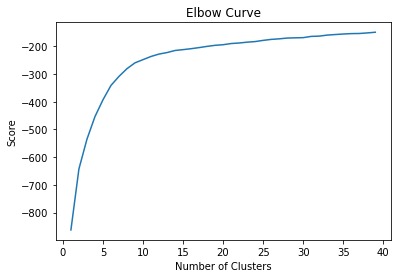

In [114]:
# Elbow Curve
x_fixed_class_scale = np.array(fixed_class_scale)
Nc = range(1, 40)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(fixed_class_scale).score(x_fixed_class_scale) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [115]:
kmeans = KMeans(n_clusters=7).fit(x_fixed_class_scale)
centroids = kmeans.cluster_centers_
#print(centroids)

In [116]:
labels_fixed = kmeans.predict(x_fixed_class_scale)
#print(labels_fixed)
print(labels_fixed.size)
df_labels_fixed = pd.DataFrame(labels_fixed).rename(columns={0 : 'CLUSTER'})
df_labels_fixed['CLUSTER'].value_counts()

845


0    168
3    139
5    124
6    111
4    111
2     98
1     94
Name: CLUSTER, dtype: int64

In [117]:
fixed_class_clust = fixed_analysis_no_geo_thr[['DPTO_MPIO', 'MPIO_CNMBR', 'DPTO_CNMBR', '%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1', 'FIX_INT_PENETRATION', '%_FTTH_Q3', '%_FTTX_Q3', '%_CABLE_Q3', '%_FWA_Q3', '%_COPPER_Q3', '%_CLARO_Q3', '%_TIGO_Q3', '%_MOVISTAR_Q3', '%_ETB_Q3', '%_EMCALI_Q3', '%_DIRECTV_Q3', '%_EDATEL_Q3', '%_HV_MULT_Q3', '%_HUGHES_Q3', '%_AZTECA_Q3', '%_OTHERS_Q3', 'Significant_deterioration']].reset_index().drop("index", axis = 1)
fixed_class_clust = fixed_class_clust.join(fixed_class).join(df_labels_fixed)
features_fixed = fixed_class_clust.columns.tolist()
features_fixed = [i for i in features_fixed if i not in ('DPTO_MPIO', 'MPIO_CNMBR', 'DPTO_CNMBR')]
#display(fixed_class_clust.loc[(fixed_class_clust['CLUSTER'] == 2)].head())
display(fixed_class_clust.head())
fixed_class_clust['CLUSTER'].value_counts()

DPTO_MPIO  MPIO_CNMBR DPTO_CNMBR  %_dif_avg_d_q3_q1  %_dif_avg_u_q3_q1  \
0    05_001    MEDELLÍN  ANTIOQUIA           0.222793           0.065424   
1    05_002   ABEJORRAL  ANTIOQUIA          -0.038768          -0.469053   
2    05_021  ALEJANDRÍA  ANTIOQUIA           0.083579           0.153254   
3    05_030       AMAGÁ  ANTIOQUIA           0.260436           0.155134   
4    05_031      AMALFI  ANTIOQUIA          -0.091106          -0.318406   

   %_dif_avg_lat_q3_q1  FIX_INT_PENETRATION  %_FTTH_Q3  %_FTTX_Q3  %_CABLE_Q3  \
0            -0.182283               0.2494       0.01       0.03        0.89   
1             0.127918               0.0530       0.00       0.00        0.01   
2             0.030845               0.0613       0.00       0.03        0.00   
3            -0.287621               0.0987       0.00       0.01        0.03   
4            -0.252380               0.0526       0.01       0.01        0.00   

   %_FWA_Q3  %_COPPER_Q3  %_CLARO_Q3  %_TIGO_Q3  %_MOVISTAR_Q3  %_ETB_Q3  \
0      0.02         0.05        0.28       0.70            0.0       0.0   
1      0.92         0.06        0.00       0.00            0.0       0.0   
2      0.04         0.93        0.00       0.01            0.0       0.0   
3      0.05         0.91        0.01       0.00            0.0       0.0   
4      0.12         0.85        0.00       0.00            0.0       0.0   

   %_EMCALI_Q3  %_DIRECTV_Q3  %_EDATEL_Q3  %_HV_MULT_Q3  %_HUGHES_Q3  \
0          0.0          0.01         0.00           0.0         0.00   
1          0.0          0.00         0.07           0.0         0.00   
2          0.0          0.00         0.96           0.0         0.03   
3          0.0          0.00         0.95           0.0         0.01   
4          0.0          0.00         0.86           0.0         0.12   

   %_AZTECA_Q3  %_OTHERS_Q3  Significant_deterioration  avg_d_kbps_q1  \
0          0.0         0.01                          0   27366.971500   
1          0.0         0.93                          1    7466.516129   
2          0.0         0.00                          0    7732.195652   
3          0.0         0.03                          0    6262.288817   
4          0.0         0.02                          1    5267.140704   

   avg_u_kbps_q1  avg_lat_ms_q1  POPULATION  NBR_TECH_ACCESS_Q3  \
0    6392.569013      23.226306     2533424              654343   
1    3816.580645     169.806452       20287               16148   
2    9050.717391      13.260870        4698                 275   
3    3969.153094      83.748100       31283                2987   
4    4107.618090      79.221106       27071                1310   

   AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  dif_q3_q1_fix_access  \
0                34.505297                17.296610                 22425   
1                30.975309                26.333333                 15073   
2                12.904762                 3.690476                   -13   
3                11.919540                 4.448276                  -101   
4                12.065574                 3.950820                  -114   

   dif_q3_q1_FTTH  dif_q3_q1_FTTX  dif_q3_q1_CABLE  dif_q3_q1_FWA  \
0              97             751            27059            295   
1               0               0              198          14804   
2               0               0                0              1   
3              -4              -1              -43              5   
4            -114               0                0             44   

   dif_q3_q1_COPPER  POP_DENSITY  GDP_CAPITA  CLUSTER  
0             -5777  6758.850085    0.021697        1  
1                71    40.003225    0.011288        3  
2               -14    36.437769    0.011069        4  
3               -58   371.830251    0.015759        4  
4               -44    22.388883    0.027446        4

0    168
3    139
5    124
6    111
4    111
2     98
1     94
Name: CLUSTER, dtype: int64

In [118]:
fixed_class_clust[features_fixed].pivot_table(index = 'CLUSTER', values=features_fixed, aggfunc='mean')

%_AZTECA_Q3  %_CABLE_Q3  %_CLARO_Q3  %_COPPER_Q3  %_DIRECTV_Q3  \
CLUSTER                                                                   
0           0.622143    0.004345    0.065119     0.004583      0.000000   
1           0.002872    0.670000    0.377021     0.184043      0.036915   
2           0.048571    0.072551    0.028571     0.575408      0.114184   
3           0.123885    0.018561    0.033165     0.011942      0.011439   
4           0.001351    0.040360    0.002703     0.810721      0.031622   
5           0.074194    0.285081    0.012419     0.095323      0.022661   
6           0.133604    0.029279    0.038739     0.031622      0.279189   

         %_EDATEL_Q3  %_EMCALI_Q3  %_ETB_Q3  %_FTTH_Q3  %_FTTX_Q3  %_FWA_Q3  \
CLUSTER                                                                       
0           0.000000     0.000000  0.001071   0.593929   0.005595  0.391369   
1           0.011277     0.011489  0.017021   0.042660   0.036489  0.066383   
2           0.012755     0.000918  0.038469   0.104184   0.022551  0.224898   
3           0.001295     0.000000  0.001151   0.137698   0.008345  0.822806   
4           0.856667     0.000000  0.000000   0.028108   0.010450  0.109369   
5           0.018226     0.000000  0.000484   0.403226   0.009677  0.205887   
6           0.008559     0.000000  0.000180   0.128108   0.002703  0.807748   

         %_HUGHES_Q3  %_HV_MULT_Q3  %_MOVISTAR_Q3  %_OTHERS_Q3  %_TIGO_Q3  \
CLUSTER                                                                     
0           0.158274      0.000000       0.003631     0.148512   0.001250   
1           0.005000      0.019681       0.159894     0.067447   0.291383   
2           0.033367      0.007041       0.510102     0.178571   0.027449   
3           0.091942      0.000000       0.009209     0.727266   0.000647   
4           0.038198      0.000000       0.009640     0.049369   0.010450   
5           0.040645      0.011532       0.027984     0.791855   0.000000   
6           0.400721      0.000000       0.031351     0.106667   0.000991   

         %_dif_avg_d_q3_q1  %_dif_avg_lat_q3_q1  %_dif_avg_u_q3_q1  \
CLUSTER                                                              
0                 0.473870             0.577236           0.908193   
1                 0.222934            -0.177666           0.173161   
2                 0.332326             0.072746           0.707721   
3                 0.533308             0.261126           0.871404   
4                 0.199387             0.094673           0.696580   
5                 0.371802             0.375680           0.605539   
6                 0.316968             0.442792           0.728619   

         AVG_OFFER_DL_FIX_ACC_Q3  AVG_OFFER_UL_FIX_ACC_Q3  \
CLUSTER                                                     
0                      17.639504                17.477887   
1                      25.829299                 9.266303   
2                      13.106753                 8.718442   
3                      16.590553                13.610476   
4                      10.757707                 3.278237   
5                      19.285266                16.326185   
6                      16.558909                 9.975602   

         FIX_INT_PENETRATION  GDP_CAPITA  NBR_TECH_ACCESS_Q3     POPULATION  \
CLUSTER                                                                       
0                   0.005166    0.013438           37.190476    8765.416667   
1                   0.169710    0.019583        72793.010638  329837.585106   
2                   0.058828    0.018462         3455.377551   48184.102041   
3                   0.025027    0.013737          524.633094   14641.546763   
4                   0.065079    0.013924         1737.207207   25977.378378   
5                   0.035100    0.014917         1054.733871   19914.870968   
6                   0.013286    0.012503          411.522523   25276.351351   

         POP_DENSITY  Significant_

#### Mobile Clustering

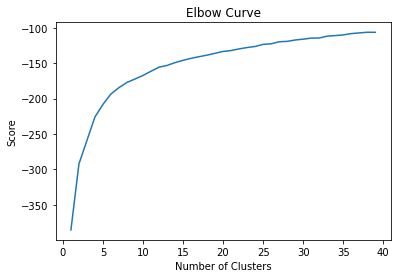

In [119]:
# Elbow Curve
x_mobile_class_scale = np.array(mobile_class_scale)
Nc = range(1, 40)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(mobile_class_scale).score(x_mobile_class_scale) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [120]:
kmeans = KMeans(n_clusters=6).fit(x_mobile_class_scale)
centroids = kmeans.cluster_centers_
#print(centroids)

In [121]:
labels_mobile = kmeans.predict(x_mobile_class_scale)
#print(labels_fixed)
labels_mobile.size
df_labels_mobile = pd.DataFrame(labels_mobile).rename(columns={0 : 'CLUSTER'})
df_labels_mobile['CLUSTER'].value_counts()

5    141
0    135
1    122
2     91
3     79
4     40
Name: CLUSTER, dtype: int64

In [122]:
mobile_class_clust = mobile_analysis_no_geo_thr[['DPTO_MPIO', 'MPIO_CNMBR', 'DPTO_CNMBR', 'Significant_deterioration', 'avg_d_kbps_q3', 'avg_lat_ms_q3', 'avg_u_kbps_q3']].reset_index().drop('index', axis = 1)
mobile_class_clust = mobile_class_clust.join(mobile_class).join(df_labels_mobile)
features_mobile = mobile_class_clust.columns.tolist()
features_mobile = [i for i in features_mobile if i not in ('DPTO_MPIO', 'MPIO_CNMBR', 'DPTO_CNMBR')]
#display(mobile_class_clust.loc[(mobile_class_clust['CLUSTER'] == 1)].head())
display(mobile_class_clust.head())
mobile_class_clust['CLUSTER'].value_counts()

DPTO_MPIO             MPIO_CNMBR DPTO_CNMBR  Significant_deterioration  \
0    05_001               MEDELLÍN  ANTIOQUIA                          0   
1    05_030                  AMAGÁ  ANTIOQUIA                          1   
2    05_031                 AMALFI  ANTIOQUIA                          0   
3    05_040                  ANORÍ  ANTIOQUIA                          1   
4    05_042  SANTA FÉ DE ANTIOQUIA  ANTIOQUIA                          1   

   avg_d_kbps_q3  avg_lat_ms_q3  avg_u_kbps_q3  avg_d_kbps_q1  avg_u_kbps_q1  \
0   22247.250795      37.006362   11106.472447   18925.263158   11907.988506   
1    8383.700730      58.817518    3606.313869    8352.047059    5657.623529   
2   18638.238095      44.642857    9535.404762   21200.680000   11334.640000   
3   30621.611111      54.111111    8950.055556   24664.538462   14010.615385   
4   14164.306250      64.125000    4673.425000   12851.581395    7986.790698   

   avg_lat_ms_q1  POPULATION  FIX_INT_PENETRATION  NBR_TECH_ACCESS_Q3  \
0      41.853358     2533424               0.2494              654343   
1      74.976471       31283               0.0987                2987   
2      52.760000       27071               0.0526                1310   
3      62.269231       19104               0.0592                1187   
4      70.000000       27002               0.1063                2960   

   COBERTURA 2G_Q3  COBERTURA 3G_Q3  COBERTURA HSPA+, HSPA+DC_Q3  \
0               28               24                           20   
1               10               11                           11   
2                3                3                            2   
3                1                2                            1   
4                6                4                            4   

   COBERTUTA LTE_Q3  dif_q3_q1_COBERTURA LTE  dif_q3_q1_COBERTURA 3G  \
0                23                      -10                     -15   
1                 8                        5                       5   
2                 2                        0                       0   
3                 2                        0                       0   
4                 5                        1                       1   

   dif_q3_q1_COBERTURA 2G  POP_DENSITY  GDP_CAPITA  CLUSTER  
0                     -14  6758.850085    0.021697        2  
1                       5   371.830251    0.015759        2  
2                       0    22.388883    0.027446        5  
3                       0    13.512769    0.008323        3  
4                       2    51.373534    0.011407        0

5    141
0    135
1    122
2     91
3     79
4     40
Name: CLUSTER, dtype: int64

In [123]:
mobile_class_clust[features_mobile].pivot_table(index = 'CLUSTER', values=features_mobile, aggfunc='mean')

COBERTURA 2G_Q3  COBERTURA 3G_Q3  COBERTURA HSPA+, HSPA+DC_Q3  \
CLUSTER                                                                  
0               5.770370         5.022222                     3.518519   
1               8.139344         6.245902                     3.868852   
2              17.208791        14.901099                     9.791209   
3               2.607595         2.379747                     1.316456   
4               2.075000         2.025000                     1.375000   
5               4.411348         3.914894                     2.673759   

         COBERTUTA LTE_Q3  FIX_INT_PENETRATION  GDP_CAPITA  \
CLUSTER                                                      
0                5.081481             0.079019    0.015944   
1                3.426230             0.029880    0.016975   
2               12.362637             0.152070    0.020613   
3                1.227848             0.015409    0.015861   
4                1.650000             0.018545    0.012928   
5                2.163121             0.030795    0.017107   

         NBR_TECH_ACCESS_Q3     POPULATION  POP_DENSITY  \
CLUSTER                                                   
0               7688.985185   61540.259259   370.483881   
1                895.483607   23536.811475    65.421488   
2              68955.538462  318619.604396   998.800174   
3                122.962025    7689.455696    51.521963   
4                153.450000    6094.375000    31.452094   
5                572.234043   15259.453901    94.643227   

         Significant_deterioration  avg_d_kbps_q1  avg_d_kbps_q3  \
CLUSTER                                                            
0                         0.355556   16039.908366   15634.758310   
1                         0.418033   11689.942948   13779.799068   
2                         0.230769   16796.548393   16818.418042   
3                         0.620253   15223.116043   13422.135787   
4                         0.350000   14099.254444   12977.139102   
5                         0.524823   14232.599613   13525.569500   

         avg_lat_ms_q1  avg_lat_ms_q3  avg_u_kbps_q1  avg_u_kbps_q3  \
CLUSTER                                                               
0            55.937818      53.855288    9415.474350    8159.161658   
1            68.410400      57.617624    6690.825609    6401.477337   
2            51.825792      48.497832   10275.615021    8883.677214   
3            72.758101      58.308709    6505.564035    5156.531839   
4            71.652484      56.084194    5337.141747    4587.891402   
5            66.049991      58.802670    7094.202806    5915.937073   

         dif_q3_q1_COBERTURA 2G  dif_q3_q1_COBERTURA 3G  \
CLUSTER                                                   
0                      0.192593                0.118519   
1                      0.745902                0.483607   
2                      2.780220                2.571429   
3                      0.000000                0.000000   
4                      0.175000                0.100000   
5                      0.042553                0.035461   

         dif_q3_q1_COBERTURA LTE  
CLUSTER                           
0                       0.125926  
1                       0.131148  
2                       1.879121  
3                       0.012658  
4                       0.075000  
5                      -0.120567

### 4.3 Logistic regression

#### Fixed regression

In [124]:
fixed_scale_no_diff = fixed_class_scale.drop(['%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1'], axis = 1)
display(fixed_scale_no_diff.head())
fixed_scale_no_diff.shape

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.870356           0.667559           0.227035        0.870265   
1           0.613008           0.552011           0.633578        0.309766   
2           0.619935           0.745460           0.116730        0.139934   
3           0.578163           0.560792           0.487694        0.360051   
4           0.543879           0.568473           0.476267        0.343260   

   log_NBR_TECH_ACCESS_Q3  log_AVG_OFFER_DL_FIX_ACC_Q3  \
0                0.914036                     0.801920   
1                0.632193                     0.769483   
2                0.322374                     0.511537   
3                0.503730                     0.488772   
4                0.441007                     0.492254   

   log_AVG_OFFER_UL_FIX_ACC_Q3  log_dif_q3_q1_fix_access  log_dif_q3_q1_FTTH  \
0                     0.636390                  0.828486            0.729104   
1                     0.754305                  0.799910            0.724197   
2                     0.236521                  0.640413            0.724197   
3                     0.280517                  0.637487            0.723989   
4                     0.252390                  0.637045            0.718089   

   log_dif_q3_q1_FTTX  log_dif_q3_q1_CABLE  log_dif_q3_q1_FWA  \
0             0.78728             0.954824           0.768701   
1             0.71033             0.713993           1.000000   
2             0.71033             0.705120           0.749415   
3             0.71018             0.703076           0.749703   
4             0.71033             0.705120           0.752471   

   log_dif_q3_q1_COPPER  log_POP_DENSITY  log_GDP_CAPITA  FIX_INT_PENETRATION  \
0              0.769629         0.914962        0.100728             0.618669   
1              0.801137         0.359009        0.048764             0.131082   
2              0.800756         0.349102        0.047663             0.151688   
3              0.800558         0.599406        0.071151             0.244538   
4              0.800621         0.297873        0.129203             0.130089   

   %_FTTH_Q3  %_FTTX_Q3  %_CABLE_Q3  %_FWA_Q3  %_COPPER_Q3  %_CLARO_Q3  \
0       0.01   0.047619    0.917526      0.02     0.051020    0.345679   
1       0.00   0.000000    0.010309      0.92     0.061224    0.000000   
2       0.00   0.047619    0.000000      0.04     0.948980    0.000000   
3       0.00   0.015873    0.030928      0.05     0.928571    0.012346   
4       0.01   0.015873    0.000000      0.12     0.867347    0.000000   

   %_TIGO_Q3  %_MOVISTAR_Q3  %_ETB_Q3  %_EMCALI_Q3  %_DIRECTV_Q3  %_EDATEL_Q3  \
0   0.714286            0.0       0.0          0.0      0.010417     0.000000   
1   0.000000            0.0       0.0          0.0      0.000000     0.070707   
2   0.010204            0.0       0.0          0.0      0.000000     0.969697   
3   0.000000            0.0       0.0          0.0      0.000000     0.959596   
4   0.000000            0.0       0.0          0.0      0.000000     0.868687   

   %_HV_MULT_Q3  %_HUGHES_Q3  %_AZTECA_Q3  %_OTHERS_Q3  
0           0.0         0.00          0.0     0.019802  
1           0.0         0.00          0.0     0.930693  
2           0.0         0.03          0.0     0.009901  
3           0.0         0.01          0.0     0.039604  
4           0.0         0.12          0.0     0.029703

(845, 32)

In [125]:
# Recursive feature elimination
lr_fixed = LogisticRegression(max_iter=1000)
rfe_f = RFE(lr_fixed, round(fixed_scale_no_diff.shape[1]*0.70,0))
rfe_f = rfe_f.fit(fixed_scale_no_diff, np.array(fixed_analysis_no_geo_thr['Significant_deterioration']))
print(rfe_f.support_)
#print(rfe_f.ranking_)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=22.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True False False  True False  True
 False  True  True  True  True False False  True False  True  True  True
  True False  True  True False  True False  True]


In [126]:
# Filter features according to RFE result
rfe_features = np.array(fixed_scale_no_diff.columns.tolist())[rfe_f.support_].tolist()
onehot_cluster_fixed = pd.get_dummies(df_labels_fixed['CLUSTER'], prefix = "CLUSTER", prefix_sep="_")
X_fixed = fixed_scale_no_diff[rfe_features].join(onehot_cluster_fixed)
y_fixed = np.array(fixed_analysis_no_geo_thr['Significant_deterioration'])
X_fixed.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.870356           0.667559           0.227035        0.870265   
1           0.613008           0.552011           0.633578        0.309766   
2           0.619935           0.745460           0.116730        0.139934   
3           0.578163           0.560792           0.487694        0.360051   
4           0.543879           0.568473           0.476267        0.343260   

   log_NBR_TECH_ACCESS_Q3  log_AVG_OFFER_DL_FIX_ACC_Q3  \
0                0.914036                     0.801920   
1                0.632193                     0.769483   
2                0.322374                     0.511537   
3                0.503730                     0.488772   
4                0.441007                     0.492254   

   log_AVG_OFFER_UL_FIX_ACC_Q3  log_dif_q3_q1_FTTX  log_dif_q3_q1_FWA  \
0                     0.636390             0.78728           0.768701   
1                     0.754305             0.71033           1.000000   
2                     0.236521             0.71033           0.749415   
3                     0.280517             0.71018           0.749703   
4                     0.252390             0.71033           0.752471   

   log_POP_DENSITY  log_GDP_CAPITA  FIX_INT_PENETRATION  %_FTTH_Q3  %_FWA_Q3  \
0         0.914962        0.100728             0.618669       0.01      0.02   
1         0.359009        0.048764             0.131082       0.00      0.92   
2         0.349102        0.047663             0.151688       0.00      0.04   
3         0.599406        0.071151             0.244538       0.00      0.05   
4         0.297873        0.129203             0.130089       0.01      0.12   

   %_CLARO_Q3  %_TIGO_Q3  %_MOVISTAR_Q3  %_ETB_Q3  %_DIRECTV_Q3  %_EDATEL_Q3  \
0    0.345679   0.714286            0.0       0.0      0.010417     0.000000   
1    0.000000   0.000000            0.0       0.0      0.000000     0.070707   
2    0.000000   0.010204            0.0       0.0      0.000000     0.969697   
3    0.012346   0.000000            0.0       0.0      0.000000     0.959596   
4    0.000000   0.000000            0.0       0.0      0.000000     0.868687   

   %_HUGHES_Q3  %_OTHERS_Q3  CLUSTER_0  CLUSTER_1  CLUSTER_2  CLUSTER_3  \
0         0.00     0.019802          0          1          0          0   
1         0.00     0.930693          0          0          0          1   
2         0.03     0.009901          0          0          0          0   
3         0.01     0.039604          0          0          0          0   
4         0.12     0.029703          0          0          0          0   

   CLUSTER_4  CLUSTER_5  CLUSTER_6  
0          0          0          0  
1          0          0          0  
2          1          0          0  
3          1          0          0  
4          1          0          0

In [127]:
# Separate between train and test and fit model
X_train, X_test, y_train, y_test = train_test_split(X_fixed, y_fixed, random_state=10)
logr_fixed = LogisticRegression(max_iter=1000, solver= 'liblinear', warm_start = True)
logr_fixed.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (633, 29)
y_train size = (633,)
X_test size = (212, 29)
y_test size = (212,)


In [128]:
y_pred = logr_fixed.predict(X_test)
print('Accuracy of logistic regression classifier on test set is:', round(logr_fixed.score(X_test, y_test),2))

Accuracy of logistic regression classifier on test set is: 0.71


In [129]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100  25]
 [ 37  50]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       125
           1       0.67      0.57      0.62        87

    accuracy                           0.71       212
   macro avg       0.70      0.69      0.69       212
weighted avg       0.70      0.71      0.70       212



In [130]:
df_coef = pd.DataFrame(logr_fixed.coef_).T.rename(columns = {0: 'coeficient'})
pd.set_option('display.max_rows', 34)
fixed_logreg_coeficient_matrix = pd.DataFrame(X_fixed.columns).rename(columns = {0: 'features'}).join(df_coef)
fixed_logreg_coeficient_matrix['abs_coef'] = fixed_logreg_coeficient_matrix['coeficient'].abs()
fixed_logreg_coeficient_matrix.sort_values(by= ['abs_coef'], ascending = False).head(10)

features  coeficient  abs_coef
2        log_avg_lat_ms_q1   -1.872230  1.872230
4   log_NBR_TECH_ACCESS_Q3   -1.397775  1.397775
11     FIX_INT_PENETRATION   -1.373721  1.373721
1        log_avg_u_kbps_q1    1.311149  1.311149
9          log_POP_DENSITY   -1.307007  1.307007
3           log_POPULATION   -1.108366  1.108366
23               CLUSTER_1   -1.089763  1.089763
10          log_GDP_CAPITA   -1.070581  1.070581
19             %_EDATEL_Q3    0.730226  0.730226
27               CLUSTER_5    0.644829  0.644829

#### Mobile Logistic Regression

In [131]:
mobile_scale_no_diff = mobile_class_scale.drop(['%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1'], axis = 1)
display(mobile_scale_no_diff.head())
mobile_scale_no_diff.shape

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.694481           0.823133           0.140763        0.873803   
1           0.527426           0.666454           0.380363        0.377500   
2           0.717669           0.812744           0.235636        0.361168   
3           0.748577           0.857369           0.303783        0.321801   
4           0.615438           0.739040           0.352018        0.360880   

   log_FIX_INT_PENETRATION  log_NBR_TECH_ACCESS_Q3  log_COBERTURA 2G_Q3  \
0                 0.657373                0.914036             0.752148   
1                 0.277554                0.503730             0.479488   
2                 0.150891                0.441007             0.194959   
3                 0.169361                0.433506             0.000000   
4                 0.297924                0.503039             0.352360   

   log_COBERTURA 3G_Q3  log_COBERTURA HSPA+, HSPA+DC_Q3  log_COBERTUTA LTE_Q3  \
0             0.742600                         0.735110              0.789510   
1             0.526803                         0.560157              0.545847   
2             0.203795                         0.126760              0.272923   
3             0.119212                         0.000000              0.272923   
4             0.269402                         0.286460              0.445119   

   log_dif_q3_q1_COBERTURA LTE  log_dif_q3_q1_COBERTURA 3G  \
0                     0.000000                    0.000000   
1                     0.815180                    0.856322   
2                     0.705015                    0.779836   
3                     0.705015                    0.779836   
4                     0.730598                    0.796888   

   log_dif_q3_q1_COBERTURA 2G  log_POP_DENSITY  log_GDP_CAPITA  %_LTE_Q3  \
0                    0.000000         0.914962        0.093862      0.82   
1                    0.835975         0.599406        0.064059      0.73   
2                    0.755696         0.297873        0.122554      0.67   
3                    0.755696         0.245902        0.026487      1.00   
4                    0.790623         0.385663        0.042101      0.83   

   %_M_AVANTEL_Q3  %_M_TIGO_Q3  %_M_MOVISTAR_Q3  %_M_CLARO_Q3  %_M_ETB_Q3  \
0            0.08         0.22         0.280000      0.650602    0.212121   
1            0.00         0.18         0.120000      0.783133    0.000000   
2            0.00         0.66         0.440000      0.192771    0.000000   
3            0.00         0.00         0.666667      0.397590    0.000000   
4            0.00         0.34         0.440000      0.397590    0.515152   

   dif_q3_q1_%_LTE  
0             0.63  
1             0.83  
2             0.60  
3             0.60  
4             0.43

(608, 22)

In [132]:
# Recursive feature elimination
lr_mobile = LogisticRegression(max_iter = 1000)
rfe_m = RFE(lr_mobile, round(mobile_scale_no_diff.shape[1]*0.70,0))
rfe_m = rfe_m.fit(mobile_scale_no_diff, mobile_analysis_no_geo_thr['Significant_deterioration'])
print(rfe_m.support_)
#print(rfe_m.ranking_)

[ True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True False False False False False]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [133]:
# Filter features according to RFE result
rfe_features = np.array(mobile_scale_no_diff.columns.tolist())[rfe_m.support_].tolist()
onehot_cluster_mobile = pd.get_dummies(df_labels_mobile['CLUSTER'], prefix = "CLUSTER", prefix_sep="_")
X_mobile = mobile_scale_no_diff[rfe_features].join(onehot_cluster_mobile)
y_mobile = mobile_analysis_no_geo_thr['Significant_deterioration']
X_mobile.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.694481           0.823133           0.140763        0.873803   
1           0.527426           0.666454           0.380363        0.377500   
2           0.717669           0.812744           0.235636        0.361168   
3           0.748577           0.857369           0.303783        0.321801   
4           0.615438           0.739040           0.352018        0.360880   

   log_FIX_INT_PENETRATION  log_NBR_TECH_ACCESS_Q3  log_COBERTURA 2G_Q3  \
0                 0.657373                0.914036             0.752148   
1                 0.277554                0.503730             0.479488   
2                 0.150891                0.441007             0.194959   
3                 0.169361                0.433506             0.000000   
4                 0.297924                0.503039             0.352360   

   log_COBERTUTA LTE_Q3  log_dif_q3_q1_COBERTURA LTE  \
0              0.789510                     0.000000   
1              0.545847                     0.815180   
2              0.272923                     0.705015   
3              0.272923                     0.705015   
4              0.445119                     0.730598   

   log_dif_q3_q1_COBERTURA 3G  log_dif_q3_q1_COBERTURA 2G  log_POP_DENSITY  \
0                    0.000000                    0.000000         0.914962   
1                    0.856322                    0.835975         0.599406   
2                    0.779836                    0.755696         0.297873   
3                    0.779836                    0.755696         0.245902   
4                    0.796888                    0.790623         0.385663   

   log_GDP_CAPITA  %_LTE_Q3  %_M_AVANTEL_Q3  CLUSTER_0  CLUSTER_1  CLUSTER_2  \
0        0.093862      0.82            0.08          0          0          1   
1        0.064059      0.73            0.00          0          0          1   
2        0.122554      0.67            0.00          0          0          0   
3        0.026487      1.00            0.00          0          0          0   
4        0.042101      0.83            0.00          1          0          0   

   CLUSTER_3  CLUSTER_4  CLUSTER_5  
0          0          0          0  
1          0          0          0  
2          0          0          1  
3          1          0          0  
4          0          0          0

In [134]:
# Separate between train and test and fit model
X_train, X_test, y_train, y_test = train_test_split(X_mobile, y_mobile, random_state=0)
logr_mobile = LogisticRegression(max_iter = 1000,  warm_start = True)
logr_mobile.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (456, 21)
y_train size = (456,)
X_test size = (152, 21)
y_test size = (152,)


In [135]:
y_pred = logr_mobile.predict(X_test)
print('Accuracy of logistic regression classifier on test set is:', round(logr_mobile.score(X_test, y_test),2))

Accuracy of logistic regression classifier on test set is: 0.68


In [136]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66 22]
 [27 37]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        88
           1       0.63      0.58      0.60        64

    accuracy                           0.68       152
   macro avg       0.67      0.66      0.67       152
weighted avg       0.67      0.68      0.68       152



In [137]:
df_coef = pd.DataFrame(logr_mobile.coef_).T.rename(columns = {0: 'coeficient'})
pd.set_option('display.max_rows', 34)
mobile_logreg_coeficient_matrix = pd.DataFrame(X_mobile.columns).rename(columns = {0: 'features'}).join(df_coef)
mobile_logreg_coeficient_matrix['abs_coef'] = mobile_logreg_coeficient_matrix['coeficient'].abs()
mobile_logreg_coeficient_matrix.sort_values(by= ['abs_coef'], ascending = False).head(10)

features  coeficient  abs_coef
1         log_avg_u_kbps_q1    2.613134  2.613134
2         log_avg_lat_ms_q1   -1.487973  1.487973
4   log_FIX_INT_PENETRATION   -1.072066  1.072066
3            log_POPULATION   -0.978558  0.978558
12           log_GDP_CAPITA   -0.943480  0.943480
0         log_avg_d_kbps_q1    0.939577  0.939577
5    log_NBR_TECH_ACCESS_Q3   -0.915974  0.915974
13                 %_LTE_Q3   -0.873133  0.873133
11          log_POP_DENSITY   -0.829770  0.829770
14           %_M_AVANTEL_Q3   -0.670712  0.670712

### 4.3 Decision Tree and Random Forest

#### Fixed Decision Tree

In [138]:
# Recursive feature elimination
fixed_scale_no_diff = fixed_class_scale.drop(['%_dif_avg_d_q3_q1', '%_dif_avg_u_q3_q1', '%_dif_avg_lat_q3_q1'], axis = 1)
dt_fixed = DecisionTreeClassifier()
rfe_f = RFE(dt_fixed,  round(fixed_scale_no_diff.shape[1]*0.7,0))
rfe_f = rfe_f.fit(fixed_scale_no_diff, fixed_analysis_no_geo_thr['Significant_deterioration'])
print(rfe_f.support_)
#print(rfe_m.ranking_)

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True False  True False False  True False
 False False  True False False  True False  True]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=22.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [139]:
# Filter features according to RFE result
rfe_features = np.array(fixed_scale_no_diff.columns.tolist())[rfe_f.support_].tolist()
X_fixed = fixed_scale_no_diff[rfe_features].join(onehot_cluster_fixed)
y_fixed = fixed_analysis_no_geo_thr['Significant_deterioration']
X_fixed.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.870356           0.667559           0.227035        0.870265   
1           0.613008           0.552011           0.633578        0.309766   
2           0.619935           0.745460           0.116730        0.139934   
3           0.578163           0.560792           0.487694        0.360051   
4           0.543879           0.568473           0.476267        0.343260   

   log_NBR_TECH_ACCESS_Q3  log_AVG_OFFER_DL_FIX_ACC_Q3  \
0                0.914036                     0.801920   
1                0.632193                     0.769483   
2                0.322374                     0.511537   
3                0.503730                     0.488772   
4                0.441007                     0.492254   

   log_AVG_OFFER_UL_FIX_ACC_Q3  log_dif_q3_q1_fix_access  log_dif_q3_q1_FTTH  \
0                     0.636390                  0.828486            0.729104   
1                     0.754305                  0.799910            0.724197   
2                     0.236521                  0.640413            0.724197   
3                     0.280517                  0.637487            0.723989   
4                     0.252390                  0.637045            0.718089   

   log_dif_q3_q1_CABLE  log_dif_q3_q1_FWA  log_dif_q3_q1_COPPER  \
0             0.954824           0.768701              0.769629   
1             0.713993           1.000000              0.801137   
2             0.705120           0.749415              0.800756   
3             0.703076           0.749703              0.800558   
4             0.705120           0.752471              0.800621   

   log_POP_DENSITY  log_GDP_CAPITA  FIX_INT_PENETRATION  %_FTTH_Q3  %_FTTX_Q3  \
0         0.914962        0.100728             0.618669       0.01   0.047619   
1         0.359009        0.048764             0.131082       0.00   0.000000   
2         0.349102        0.047663             0.151688       0.00   0.047619   
3         0.599406        0.071151             0.244538       0.00   0.015873   
4         0.297873        0.129203             0.130089       0.01   0.015873   

   %_FWA_Q3  %_TIGO_Q3  %_DIRECTV_Q3  %_HUGHES_Q3  %_OTHERS_Q3  CLUSTER_0  \
0      0.02   0.714286      0.010417         0.00     0.019802          0   
1      0.92   0.000000      0.000000         0.00     0.930693          0   
2      0.04   0.010204      0.000000         0.03     0.009901          0   
3      0.05   0.000000      0.000000         0.01     0.039604          0   
4      0.12   0.000000      0.000000         0.12     0.029703          0   

   CLUSTER_1  CLUSTER_2  CLUSTER_3  CLUSTER_4  CLUSTER_5  CLUSTER_6  
0          1          0          0          0          0          0  
1          0          0          1          0          0          0  
2          0          0          0          1          0          0  
3          0          0          0          1          0          0  
4          0          0          0          1          0          0

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_fixed, y_fixed, random_state=10)
dtc_fixed = DecisionTreeClassifier()
dtc_fixed.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (633, 29)
y_train size = (633,)
X_test size = (212, 29)
y_test size = (212,)


In [141]:
y_pred = dtc_fixed.predict(X_test)
print('Accuracy of decision tree classifier on test set is:', round(dtc_fixed.score(X_test, y_test),2))

Accuracy of decision tree classifier on test set is: 0.68


In [142]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[86 39]
 [28 59]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       125
           1       0.60      0.68      0.64        87

    accuracy                           0.68       212
   macro avg       0.68      0.68      0.68       212
weighted avg       0.69      0.68      0.69       212



In [143]:
# Now let's look at how important each input predictor or feature is in classifying the Iris classes
features = X_fixed.columns.tolist()
prediction_importance = list(dtc_fixed.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
pd.DataFrame(input_importance).rename(columns={0: 'Feature', 1: 'Feature Importance'}).sort_values(by=['Feature Importance'], ascending = False).head(10)

Feature  Feature Importance
4        log_NBR_TECH_ACCESS_Q3            0.168225
2             log_avg_lat_ms_q1            0.148489
0             log_avg_d_kbps_q1            0.086749
12              log_POP_DENSITY            0.069707
7      log_dif_q3_q1_fix_access            0.063395
6   log_AVG_OFFER_UL_FIX_ACC_Q3            0.061387
5   log_AVG_OFFER_DL_FIX_ACC_Q3            0.060616
15                    %_FTTH_Q3            0.039657
20                  %_HUGHES_Q3            0.038496
1             log_avg_u_kbps_q1            0.037859

In [ ]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dtc_fixed, 
                   feature_names=features,  
                   #class_names=iris.target_names,
                   filled=True)

#### Fixed Random Forest

In [144]:
rf_fixed = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'auto')
rfe_f = RFE(rf_fixed, round(fixed_scale_no_diff.shape[1]*1,0))
rfe_f = rfe_f.fit(fixed_scale_no_diff, fixed_analysis_no_geo_thr['Significant_deterioration'])
print(rfe_f.support_)
#print(rfe_m.ranking_)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


In [145]:
# Filter features according to RFE result
rfe_features = np.array(fixed_scale_no_diff.columns.tolist())[rfe_f.support_].tolist()
X_fixed = fixed_scale_no_diff[rfe_features].join(onehot_cluster_fixed)
y_fixed = fixed_analysis_no_geo_thr['Significant_deterioration']
X_fixed.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.870356           0.667559           0.227035        0.870265   
1           0.613008           0.552011           0.633578        0.309766   
2           0.619935           0.745460           0.116730        0.139934   
3           0.578163           0.560792           0.487694        0.360051   
4           0.543879           0.568473           0.476267        0.343260   

   log_NBR_TECH_ACCESS_Q3  log_AVG_OFFER_DL_FIX_ACC_Q3  \
0                0.914036                     0.801920   
1                0.632193                     0.769483   
2                0.322374                     0.511537   
3                0.503730                     0.488772   
4                0.441007                     0.492254   

   log_AVG_OFFER_UL_FIX_ACC_Q3  log_dif_q3_q1_fix_access  log_dif_q3_q1_FTTH  \
0                     0.636390                  0.828486            0.729104   
1                     0.754305                  0.799910            0.724197   
2                     0.236521                  0.640413            0.724197   
3                     0.280517                  0.637487            0.723989   
4                     0.252390                  0.637045            0.718089   

   log_dif_q3_q1_FTTX  log_dif_q3_q1_CABLE  log_dif_q3_q1_FWA  \
0             0.78728             0.954824           0.768701   
1             0.71033             0.713993           1.000000   
2             0.71033             0.705120           0.749415   
3             0.71018             0.703076           0.749703   
4             0.71033             0.705120           0.752471   

   log_dif_q3_q1_COPPER  log_POP_DENSITY  log_GDP_CAPITA  FIX_INT_PENETRATION  \
0              0.769629         0.914962        0.100728             0.618669   
1              0.801137         0.359009        0.048764             0.131082   
2              0.800756         0.349102        0.047663             0.151688   
3              0.800558         0.599406        0.071151             0.244538   
4              0.800621         0.297873        0.129203             0.130089   

   %_FTTH_Q3  %_FTTX_Q3  %_CABLE_Q3  %_FWA_Q3  %_COPPER_Q3  %_CLARO_Q3  \
0       0.01   0.047619    0.917526      0.02     0.051020    0.345679   
1       0.00   0.000000    0.010309      0.92     0.061224    0.000000   
2       0.00   0.047619    0.000000      0.04     0.948980    0.000000   
3       0.00   0.015873    0.030928      0.05     0.928571    0.012346   
4       0.01   0.015873    0.000000      0.12     0.867347    0.000000   

   %_TIGO_Q3  %_MOVISTAR_Q3  %_ETB_Q3  %_EMCALI_Q3  %_DIRECTV_Q3  %_EDATEL_Q3  \
0   0.714286            0.0       0.0          0.0      0.010417     0.000000   
1   0.000000            0.0       0.0          0.0      0.000000     0.070707   
2   0.010204            0.0       0.0          0.0      0.000000     0.969697   
3   0.000000            0.0       0.0          0.0      0.000000     0.959596   
4   0.000000            0.0       0.0          0.0      0.000000     0.868687   

   %_HV_MULT_Q3  %_HUGHES_Q3  %_AZTECA_Q3  %_OTHERS_Q3  CLUSTER_0  CLUSTER_1  \
0           0.0         0.00          0.0     0.019802          0          1   
1           0.0         0.00          0.0     0.930693          0          0   
2           0.0         0.03          0.0     0.009901          0          0   
3           0.0         0.01          0.0     0.039604          0          0   
4           0.0         0.12          0.0     0.029703          0          0   

   CLUSTER_2  CLUSTER_3  CLUSTER_4  CLUSTER_5  CLUSTER_6  
0          0          0          0          0          0  
1          0          1          0          0          0  
2          0          0          1          0          0  
3          0          0          1          0          0  
4          0          0          1          0          0

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_fixed, y_fixed, random_state=10)
rfc_fixed = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'auto')
rfc_fixed.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (633, 39)
y_train size = (633,)
X_test size = (212, 39)
y_test size = (212,)


In [154]:
y_pred = rfc_fixed.predict(X_test)
print('Accuracy of random forest classifier on test set is:', round(rfc_fixed.score(X_test, y_test),2))

Accuracy of random forest classifier on test set is: 0.74


In [155]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[95 30]
 [26 61]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       125
           1       0.67      0.70      0.69        87

    accuracy                           0.74       212
   macro avg       0.73      0.73      0.73       212
weighted avg       0.74      0.74      0.74       212



In [156]:
features = X_fixed.columns.tolist()
prediction_importance = list(rfc_fixed.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
pd.DataFrame(input_importance).rename(columns={0: 'Feature', 1: 'Feature Importance'}).sort_values(by=['Feature Importance'], ascending = False).head(10)

Feature  Feature Importance
2             log_avg_lat_ms_q1            0.100205
4        log_NBR_TECH_ACCESS_Q3            0.058356
15          FIX_INT_PENETRATION            0.055492
3                log_POPULATION            0.055187
14               log_GDP_CAPITA            0.050446
1             log_avg_u_kbps_q1            0.050309
13              log_POP_DENSITY            0.050175
0             log_avg_d_kbps_q1            0.048794
7      log_dif_q3_q1_fix_access            0.048620
6   log_AVG_OFFER_UL_FIX_ACC_Q3            0.041776

### Mobile Decision Tree

In [157]:
# Recursive feature elimination
dt_mobile = DecisionTreeClassifier()
rfe_m = RFE(dt_mobile, round(mobile_scale_no_diff.shape[1]*0.7,0))
rfe_m = rfe_m.fit(mobile_scale_no_diff, mobile_analysis_no_geo_thr['Significant_deterioration'])
print(rfe_m.support_)
#print(rfe_m.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
 False  True  True  True False  True  True  True False False]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [158]:
# Filter features according to RFE result
rfe_features = np.array(mobile_scale_no_diff.columns.tolist())[rfe_m.support_].tolist()
X_mobile = mobile_scale_no_diff[rfe_features].join(onehot_cluster_mobile)
y_mobile = mobile_analysis_no_geo_thr['Significant_deterioration']
X_mobile.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.694481           0.823133           0.140763        0.873803   
1           0.527426           0.666454           0.380363        0.377500   
2           0.717669           0.812744           0.235636        0.361168   
3           0.748577           0.857369           0.303783        0.321801   
4           0.615438           0.739040           0.352018        0.360880   

   log_FIX_INT_PENETRATION  log_NBR_TECH_ACCESS_Q3  log_COBERTURA 2G_Q3  \
0                 0.657373                0.914036             0.752148   
1                 0.277554                0.503730             0.479488   
2                 0.150891                0.441007             0.194959   
3                 0.169361                0.433506             0.000000   
4                 0.297924                0.503039             0.352360   

   log_COBERTURA 3G_Q3  log_COBERTURA HSPA+, HSPA+DC_Q3  log_POP_DENSITY  \
0             0.742600                         0.735110         0.914962   
1             0.526803                         0.560157         0.599406   
2             0.203795                         0.126760         0.297873   
3             0.119212                         0.000000         0.245902   
4             0.269402                         0.286460         0.385663   

   log_GDP_CAPITA  %_LTE_Q3  %_M_TIGO_Q3  %_M_MOVISTAR_Q3  %_M_CLARO_Q3  \
0        0.093862      0.82         0.22         0.280000      0.650602   
1        0.064059      0.73         0.18         0.120000      0.783133   
2        0.122554      0.67         0.66         0.440000      0.192771   
3        0.026487      1.00         0.00         0.666667      0.397590   
4        0.042101      0.83         0.34         0.440000      0.397590   

   CLUSTER_0  CLUSTER_1  CLUSTER_2  CLUSTER_3  CLUSTER_4  CLUSTER_5  
0          0          0          1          0          0          0  
1          0          0          1          0          0          0  
2          0          0          0          0          0          1  
3          0          0          0          1          0          0  
4          1          0          0          0          0          0

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_mobile, y_mobile, random_state=0)
dtc_mobile = DecisionTreeClassifier()
dtc_mobile.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (456, 21)
y_train size = (456,)
X_test size = (152, 21)
y_test size = (152,)


In [171]:
y_pred = dtc_mobile.predict(X_test)
print('Accuracy of decision tree classifier on test set is:', round(dtc_mobile.score(X_test, y_test),2))

Accuracy of decision tree classifier on test set is: 0.61


In [172]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[58 30]
 [30 34]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        88
           1       0.53      0.53      0.53        64

    accuracy                           0.61       152
   macro avg       0.60      0.60      0.60       152
weighted avg       0.61      0.61      0.61       152



In [173]:
features = X_mobile.columns.tolist()
prediction_importance = list(dtc_mobile.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
pd.DataFrame(input_importance).rename(columns={0: 'Feature', 1: 'Feature Importance'}).sort_values(by=['Feature Importance'], ascending = False).head(10)

Feature  Feature Importance
1         log_avg_u_kbps_q1            0.172691
4   log_FIX_INT_PENETRATION            0.123637
3            log_POPULATION            0.120609
2         log_avg_lat_ms_q1            0.117522
0         log_avg_d_kbps_q1            0.114982
9           log_POP_DENSITY            0.101487
11                 %_LTE_Q3            0.058609
10           log_GDP_CAPITA            0.049651
14             %_M_CLARO_Q3            0.046420
13          %_M_MOVISTAR_Q3            0.033405

#### Mobile Random Forest

In [174]:
rf_mobile = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'auto')
rfe_m = RFE(rf_mobile, round(mobile_scale_no_diff.shape[1]*1,0))
rfe_m = rfe_m.fit(mobile_scale_no_diff, mobile_analysis_no_geo_thr['Significant_deterioration'])
print(rfe_m.support_)
#print(rfe_m.ranking_)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=22 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [175]:
# Filter features according to RFE result
rfe_features = np.array(mobile_scale_no_diff.columns.tolist())[rfe_m.support_].tolist()
X_mobile = mobile_scale_no_diff[rfe_features].join(onehot_cluster_mobile)
y_mobile = mobile_analysis_no_geo_thr['Significant_deterioration']
X_mobile.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.694481           0.823133           0.140763        0.873803   
1           0.527426           0.666454           0.380363        0.377500   
2           0.717669           0.812744           0.235636        0.361168   
3           0.748577           0.857369           0.303783        0.321801   
4           0.615438           0.739040           0.352018        0.360880   

   log_FIX_INT_PENETRATION  log_NBR_TECH_ACCESS_Q3  log_COBERTURA 2G_Q3  \
0                 0.657373                0.914036             0.752148   
1                 0.277554                0.503730             0.479488   
2                 0.150891                0.441007             0.194959   
3                 0.169361                0.433506             0.000000   
4                 0.297924                0.503039             0.352360   

   log_COBERTURA 3G_Q3  log_COBERTURA HSPA+, HSPA+DC_Q3  log_COBERTUTA LTE_Q3  \
0             0.742600                         0.735110              0.789510   
1             0.526803                         0.560157              0.545847   
2             0.203795                         0.126760              0.272923   
3             0.119212                         0.000000              0.272923   
4             0.269402                         0.286460              0.445119   

   log_dif_q3_q1_COBERTURA LTE  log_dif_q3_q1_COBERTURA 3G  \
0                     0.000000                    0.000000   
1                     0.815180                    0.856322   
2                     0.705015                    0.779836   
3                     0.705015                    0.779836   
4                     0.730598                    0.796888   

   log_dif_q3_q1_COBERTURA 2G  log_POP_DENSITY  log_GDP_CAPITA  %_LTE_Q3  \
0                    0.000000         0.914962        0.093862      0.82   
1                    0.835975         0.599406        0.064059      0.73   
2                    0.755696         0.297873        0.122554      0.67   
3                    0.755696         0.245902        0.026487      1.00   
4                    0.790623         0.385663        0.042101      0.83   

   %_M_AVANTEL_Q3  %_M_TIGO_Q3  %_M_MOVISTAR_Q3  %_M_CLARO_Q3  %_M_ETB_Q3  \
0            0.08         0.22         0.280000      0.650602    0.212121   
1            0.00         0.18         0.120000      0.783133    0.000000   
2            0.00         0.66         0.440000      0.192771    0.000000   
3            0.00         0.00         0.666667      0.397590    0.000000   
4            0.00         0.34         0.440000      0.397590    0.515152   

   dif_q3_q1_%_LTE  CLUSTER_0  CLUSTER_1  CLUSTER_2  CLUSTER_3  CLUSTER_4  \
0             0.63          0          0          1          0          0   
1             0.83          0          0          1          0          0   
2             0.60          0          0          0          0          0   
3             0.60          0          0          0          1          0   
4             0.43          1          0          0          0          0   

   CLUSTER_5  
0          0  
1          0  
2          1  
3          0  
4          0

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_mobile, y_mobile, random_state=0)
rfc_mobile = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'auto')
rfc_mobile.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (456, 28)
y_train size = (456,)
X_test size = (152, 28)
y_test size = (152,)


In [189]:
y_pred = rfc_mobile.predict(X_test)
print('Accuracy of random forest classifier on test set is:', round(rfc_mobile.score(X_test, y_test),2))

Accuracy of random forest classifier on test set is: 0.69


In [190]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65 23]
 [24 40]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        88
           1       0.63      0.62      0.63        64

    accuracy                           0.69       152
   macro avg       0.68      0.68      0.68       152
weighted avg       0.69      0.69      0.69       152



In [191]:
features = X_mobile.columns.tolist()
prediction_importance = list(rfc_mobile.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
pd.DataFrame(input_importance).rename(columns={0: 'Feature', 1: 'Feature Importance'}).sort_values(by=['Feature Importance'], ascending = False).head(10)

Feature  Feature Importance
1         log_avg_u_kbps_q1            0.115990
2         log_avg_lat_ms_q1            0.081514
5    log_NBR_TECH_ACCESS_Q3            0.079253
4   log_FIX_INT_PENETRATION            0.078226
0         log_avg_d_kbps_q1            0.072736
3            log_POPULATION            0.072491
13          log_POP_DENSITY            0.071390
14           log_GDP_CAPITA            0.064780
15                 %_LTE_Q3            0.044452
19             %_M_CLARO_Q3            0.040028

### 4.4 Support Vector Machine

#### Fixed SVM

In [192]:
# Recursive feature elimination
#svm_fixed = svm.LinearSVC(max_iter=10000)
svm_fixed = svm.SVC(kernel = 'linear')
rfe_f = RFE(svm_fixed, round(fixed_scale_no_diff.shape[1]*0.70,0))
rfe_f = rfe_f.fit(fixed_scale_no_diff, fixed_analysis_no_geo_thr['Significant_deterioration'])
print(rfe_f.support_)
#print(rfe_m.ranking_)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=22.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True False False  True  True  True
 False  True  True  True  True False  True  True False  True  True  True
  True False  True False False  True False False]


In [193]:
# Filter features according to RFE result
rfe_features = np.array(fixed_scale_no_diff.columns.tolist())[rfe_f.support_].tolist()
X_fixed = fixed_scale_no_diff[rfe_features].join(onehot_cluster_fixed)
y_fixed = fixed_analysis_no_geo_thr['Significant_deterioration']
X_fixed.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.870356           0.667559           0.227035        0.870265   
1           0.613008           0.552011           0.633578        0.309766   
2           0.619935           0.745460           0.116730        0.139934   
3           0.578163           0.560792           0.487694        0.360051   
4           0.543879           0.568473           0.476267        0.343260   

   log_NBR_TECH_ACCESS_Q3  log_AVG_OFFER_DL_FIX_ACC_Q3  \
0                0.914036                     0.801920   
1                0.632193                     0.769483   
2                0.322374                     0.511537   
3                0.503730                     0.488772   
4                0.441007                     0.492254   

   log_AVG_OFFER_UL_FIX_ACC_Q3  log_dif_q3_q1_FTTX  log_dif_q3_q1_CABLE  \
0                     0.636390             0.78728             0.954824   
1                     0.754305             0.71033             0.713993   
2                     0.236521             0.71033             0.705120   
3                     0.280517             0.71018             0.703076   
4                     0.252390             0.71033             0.705120   

   log_dif_q3_q1_FWA  log_POP_DENSITY  log_GDP_CAPITA  FIX_INT_PENETRATION  \
0           0.768701         0.914962        0.100728             0.618669   
1           1.000000         0.359009        0.048764             0.131082   
2           0.749415         0.349102        0.047663             0.151688   
3           0.749703         0.599406        0.071151             0.244538   
4           0.752471         0.297873        0.129203             0.130089   

   %_FTTH_Q3  %_CABLE_Q3  %_FWA_Q3  %_CLARO_Q3  %_TIGO_Q3  %_MOVISTAR_Q3  \
0       0.01    0.917526      0.02    0.345679   0.714286            0.0   
1       0.00    0.010309      0.92    0.000000   0.000000            0.0   
2       0.00    0.000000      0.04    0.000000   0.010204            0.0   
3       0.00    0.030928      0.05    0.012346   0.000000            0.0   
4       0.01    0.000000      0.12    0.000000   0.000000            0.0   

   %_ETB_Q3  %_DIRECTV_Q3  %_HUGHES_Q3  CLUSTER_0  CLUSTER_1  CLUSTER_2  \
0       0.0      0.010417         0.00          0          1          0   
1       0.0      0.000000         0.00          0          0          0   
2       0.0      0.000000         0.03          0          0          0   
3       0.0      0.000000         0.01          0          0          0   
4       0.0      0.000000         0.12          0          0          0   

   CLUSTER_3  CLUSTER_4  CLUSTER_5  CLUSTER_6  
0          0          0          0          0  
1          1          0          0          0  
2          0          1          0          0  
3          0          1          0          0  
4          0          1          0          0

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_fixed, y_fixed, random_state=3)
#svmc_fixed = svm.LinearSVC(max_iter=10000)
svmc_fixed = svm.SVC(kernel = 'linear')
svmc_fixed.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (633, 29)
y_train size = (633,)
X_test size = (212, 29)
y_test size = (212,)


In [195]:
y_pred = svmc_fixed.predict(X_test)
print('Accuracy of support vector machine classifier on test set is:', round(svmc_fixed.score(X_test, y_test),2))

Accuracy of support vector machine classifier on test set is: 0.66


In [196]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  25]
 [ 47  38]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       127
           1       0.60      0.45      0.51        85

    accuracy                           0.66       212
   macro avg       0.64      0.63      0.63       212
weighted avg       0.65      0.66      0.65       212



In [197]:
df_coef = pd.DataFrame(svmc_fixed.coef_).T.rename(columns = {0: 'coeficient'})
pd.set_option('display.max_rows', 34)
svmc_fixed_coeficient_matrix = pd.DataFrame(X_fixed.columns).rename(columns = {0: 'features'}).join(df_coef)
svmc_fixed_coeficient_matrix['abs_coef'] = svmc_fixed_coeficient_matrix['coeficient'].abs()
svmc_fixed_coeficient_matrix.sort_values(by=['abs_coef'], ascending = False).head(10)

features  coeficient  abs_coef
2        log_avg_lat_ms_q1   -3.393552  3.393552
1        log_avg_u_kbps_q1    1.606070  1.606070
11          log_GDP_CAPITA   -1.421891  1.421891
10         log_POP_DENSITY   -1.306213  1.306213
19                %_ETB_Q3   -1.266871  1.266871
4   log_NBR_TECH_ACCESS_Q3   -1.224473  1.224473
12     FIX_INT_PENETRATION   -0.904494  0.904494
21             %_HUGHES_Q3    0.847327  0.847327
13               %_FTTH_Q3   -0.798377  0.798377
17               %_TIGO_Q3   -0.738607  0.738607

#### Mobile SVM

In [198]:
# Recursive feature elimination
svm_mobile = svm.LinearSVC(max_iter=100000)
rfe_m = RFE(svm_mobile, round(mobile_scale_no_diff.shape[1]*0.70,0))
rfe_m = rfe_m.fit(mobile_scale_no_diff, mobile_analysis_no_geo_thr['Significant_deterioration'])
print(rfe_m.support_)
#print(rfe_m.ranking_)

[ True  True  True  True  True  True  True  True False False  True  True
  True False  True  True  True False False False False  True]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [199]:
# Filter features according to RFE result
rfe_features = np.array(mobile_scale_no_diff.columns.tolist())[rfe_m.support_].tolist()
X_mobile = mobile_scale_no_diff[rfe_features].join(onehot_cluster_mobile)
y_mobile = mobile_analysis_no_geo_thr['Significant_deterioration']
X_mobile.head()

log_avg_d_kbps_q1  log_avg_u_kbps_q1  log_avg_lat_ms_q1  log_POPULATION  \
0           0.694481           0.823133           0.140763        0.873803   
1           0.527426           0.666454           0.380363        0.377500   
2           0.717669           0.812744           0.235636        0.361168   
3           0.748577           0.857369           0.303783        0.321801   
4           0.615438           0.739040           0.352018        0.360880   

   log_FIX_INT_PENETRATION  log_NBR_TECH_ACCESS_Q3  log_COBERTURA 2G_Q3  \
0                 0.657373                0.914036             0.752148   
1                 0.277554                0.503730             0.479488   
2                 0.150891                0.441007             0.194959   
3                 0.169361                0.433506             0.000000   
4                 0.297924                0.503039             0.352360   

   log_COBERTURA 3G_Q3  log_dif_q3_q1_COBERTURA LTE  \
0             0.742600                     0.000000   
1             0.526803                     0.815180   
2             0.203795                     0.705015   
3             0.119212                     0.705015   
4             0.269402                     0.730598   

   log_dif_q3_q1_COBERTURA 3G  log_dif_q3_q1_COBERTURA 2G  log_GDP_CAPITA  \
0                    0.000000                    0.000000        0.093862   
1                    0.856322                    0.835975        0.064059   
2                    0.779836                    0.755696        0.122554   
3                    0.779836                    0.755696        0.026487   
4                    0.796888                    0.790623        0.042101   

   %_LTE_Q3  %_M_AVANTEL_Q3  dif_q3_q1_%_LTE  CLUSTER_0  CLUSTER_1  CLUSTER_2  \
0      0.82            0.08             0.63          0          0          1   
1      0.73            0.00             0.83          0          0          1   
2      0.67            0.00             0.60          0          0          0   
3      1.00            0.00             0.60          0          0          0   
4      0.83            0.00             0.43          1          0          0   

   CLUSTER_3  CLUSTER_4  CLUSTER_5  
0          0          0          0  
1          0          0          0  
2          0          0          1  
3          1          0          0  
4          0          0          0

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_mobile, y_mobile, random_state=0)
svmc_mobile = svm.LinearSVC(max_iter=100000)
svmc_mobile.fit(X_train, y_train)
print("X_train size =", X_train.shape)
print("y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("y_test size =", y_test.shape)

X_train size = (456, 21)
y_train size = (456,)
X_test size = (152, 21)
y_test size = (152,)


In [201]:
y_pred = svmc_mobile.predict(X_test)
print('Accuracy of support vector machine classifier on test set is:', round(svmc_mobile.score(X_test, y_test),2))

Accuracy of support vector machine classifier on test set is: 0.66


In [202]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65 23]
 [28 36]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        88
           1       0.61      0.56      0.59        64

    accuracy                           0.66       152
   macro avg       0.65      0.65      0.65       152
weighted avg       0.66      0.66      0.66       152



In [203]:
df_coef = pd.DataFrame(svmc_mobile.coef_).T.rename(columns = {0: 'coeficient'})
pd.set_option('display.max_rows', 34)
svmc_mobile_coeficient_matrix = pd.DataFrame(X_mobile.columns).rename(columns = {0: 'features'}).join(df_coef)
svmc_mobile_coeficient_matrix['abs_coef'] = svmc_mobile_coeficient_matrix['coeficient'].abs()
svmc_mobile_coeficient_matrix.sort_values(by=['abs_coef'], ascending = False).head(10)

features  coeficient  abs_coef
1             log_avg_u_kbps_q1    1.721410  1.721410
3                log_POPULATION   -1.123728  1.123728
2             log_avg_lat_ms_q1   -0.927775  0.927775
11               log_GDP_CAPITA   -0.887783  0.887783
4       log_FIX_INT_PENETRATION   -0.659372  0.659372
12                     %_LTE_Q3   -0.645749  0.645749
8   log_dif_q3_q1_COBERTURA LTE    0.531555  0.531555
13               %_M_AVANTEL_Q3   -0.421256  0.421256
6           log_COBERTURA 2G_Q3   -0.411631  0.411631
10   log_dif_q3_q1_COBERTURA 2G    0.390143  0.390143

## Copyright
This document was prepared by Juan David Rodriguez for academic purposes. Sources of information were public for without use limitation or licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0). 

The contents of this document are proprietary by Juan David Rodriguez. Contents are licensed under the terms of the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0).

The contents of this document are provided "as is". No warranties of any kind, either express or implied. OWNER SHALL NOT BE RESPONSIBLE IN ANY EVENT FOR ERRORS IN THIS DOCUMENT or for any loss of data or income or any special, incidental, consequential, indirect or direct damages howsoever caused, that might arise from the use of this document or any contents of this document. 